In [11]:
# Importing all modules required

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [12]:
# To read column name. Note: Do not change file name below
with open('power data set 1.1.txt') as f:
    data = f.readlines()


In [13]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
positive_value = ['ON','TRUE','OVER','UNLOCK','SEL','ANT-1','ENABLE','OPEN','YET2']

rows = []
c = 0
for i in data:
    if len(i.strip()) == 0:
        pass
    if '|' not in i:
        columns.append(i.strip())
    

In [14]:
if 'Date' not in columns:
    columns = ['Date']+columns[6:-1]
    print(columns)

['Date', 'unknown', 'TCR-B PWM R DUTY CYC', 'TCR-B PWM M DUTY CYC', 'TCR-B CNTCUR M', 'TCR-B CNTVLT M', 'TCR-B CURREF M', 'TCR-B VLTREF M', 'BAT-20 PLT FAR TEMP', 'BAT-20 TCR TEMP', 'BAT-B TMP AUTOCHNGL', 'BAT-B TEMP SEN TCR R', 'BAT-B TEMP SEN TCR M', 'BAT-B FINECUR R DUMM', 'BAT-B FINECUR M DUMM', 'BAT-B CORSCUR R DUMM', 'BAT-B CORSCUR M DUMM', 'BAT-B DOD % ORB4', 'BAT-B K FACTOR ORB4', 'BAT-B AH OUT ORB4', 'BAT-B AH IN ORB4', 'BAT-B DOD % ORB3', 'BAT-B K FACTOR ORB3', 'BAT-B AH OUT ORB3', 'BAT-B AH IN ORB3', 'BAT-B DOD % ORB2', 'BAT-B K FACTOR ORB2', 'BAT-B AH OUT ORB2', 'BAT-B AH IN ORB2', 'BAT-B DOD % ORB1', 'BAT-B K FACTOR ORB1', 'BAT-B AH OUT ORB1', 'BAT-B AH IN ORB1', 'BAT-B DOD % CURR', 'BAT-B K FACTOR CURR', 'BAT-B AH OUT CURR', 'BAT-B AH IN CURR', 'BAT-B CELL28 V', 'BAT-B CELL27 V', 'BAT-B CELL26 V', 'BAT-B CELL25 V', 'BAT-B CELL24 V', 'BAT-B CELL23 V', 'BAT-B CELL22 V', 'BAT-B CELL21 V', 'BAT-B CELL20 V', 'BAT-B CELL19 V', 'BAT-B CELL18 V', 'BAT-B CELL17 V', 'BAT-B CELL16 V

In [18]:
with open('power data set 1.4.txt') as f:
    data = f.readlines()


In [19]:
rows = []
c = 0
for i in data:
    if len(i.strip()) == 0:
        pass
    if '|' not in i:
        columns.append(i.strip())
    elif len(i.split("|"))>5:
        new_list = [j.strip() for j in i.split("|") if j not in ['',0,'\n']]
        date = new_list[0].split(' ')
        date_string = str(date[1]) + " " +  str(date[0]) + " " +  str(date[2]) + " " +  str(date[3]) + " " +  str(date[4]) + " " +  str(date[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[1:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date[-1])
        new_list.insert(0, date_object)
        
        for j in range(4,len(new_list),1):
            if new_list[j] in positive_value:
                new_list[j] = '1'
            else: 
                new_list[j] = '0'
            
        rows.append(new_list)

        
print(rows[0])
        

[datetime.datetime(2008, 7, 4, 9, 50, 25, 776000), '07', '102.217', '74.227', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1']


In [20]:
#Create the dataframe
df = pd.DataFrame()    
for j in range(len(columns)):
    col_data = []
    for i in rows:
        if type(i[j]) == str and i[j].strip() == '':
            i[j] = 0
        if j >= 1:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
#Set date as index for dataframe
df.set_index('Date', inplace=True)
original_df = df.copy()

/tmp/ipykernel_1784305/1036029634.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[columns[j]] = col_data
/tmp/ipykernel_1784305/1036029634.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[columns[j]] = col_data
/tmp/ipykernel_1784305/1036029634.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

In [21]:
# Display the df (Optional)
display(df)

,unknown,TCR-B PWM R DUTY CYC,TCR-B PWM M DUTY CYC,TCR-B CNTCUR M,TCR-B CNTVLT M,TCR-B CURREF M,TCR-B VLTREF M,BAT-20 PLT FAR TEMP,BAT-20 TCR TEMP,BAT-B TMP AUTOCHNGL,...,BAT-B ABS TMP,BAT-A EM RELAY,TCR-A AUTO C/O,TCR-A RLY STS,BAT-A EMLOGSEL,BAT-B VLT LMT,SA-AA STR 7-9,BAT-A DIFF TMP,BAT-B EMLOGSEL,BAT-B DIFF TMP
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-04 09:50:25.776,7.0,102.217,74.227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2008-07-04 09:50:26.032,8.0,102.217,74.227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2008-07-04 09:50:26.288,9.0,102.217,74.227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2008-07-04 09:50:26.544,10.0,102.217,74.227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2008-07-04 09:50:26.800,11.0,102.217,74.227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-07-05 09:57:54.602,52.0,102.263,27.124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2008-07-05 09:57:54.858,53.0,102.263,27.124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2008-07-05 09:57:55.114,54.0,102.263,27.124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


/home/iseserver/.local/lib/python3.8/site-packages/adtk/visualization/_visualization.py:247: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(


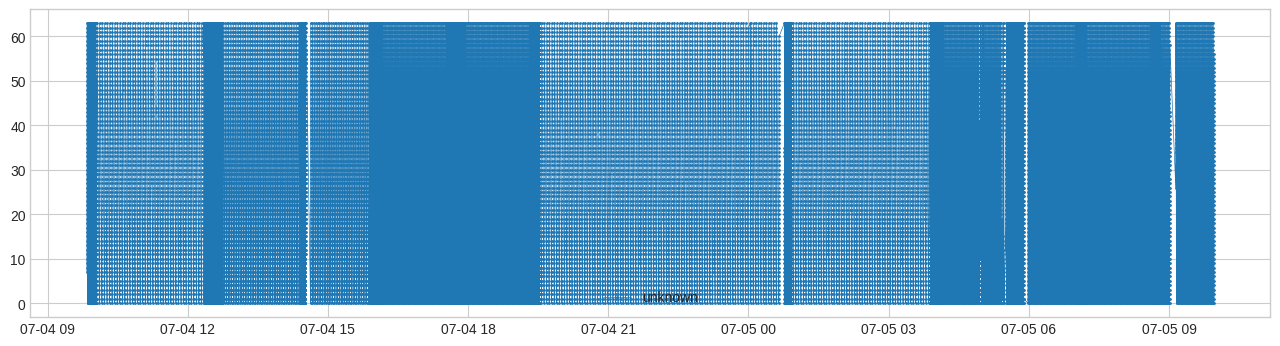

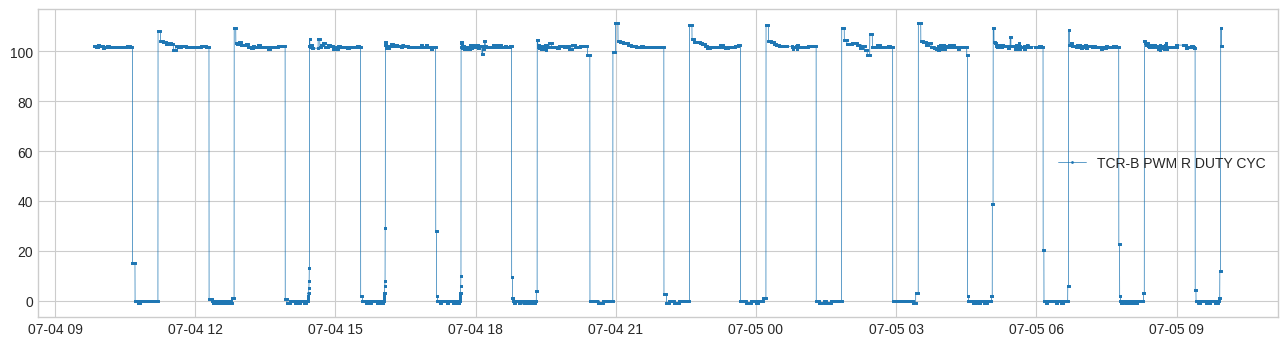

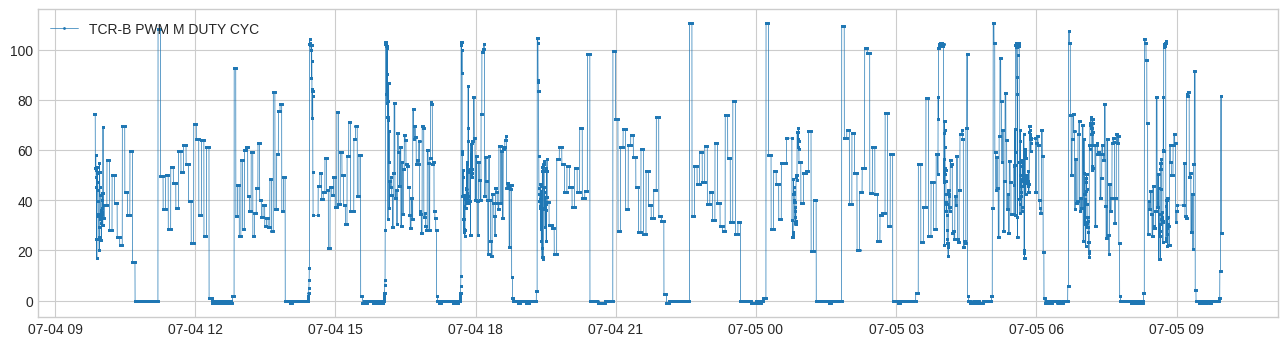

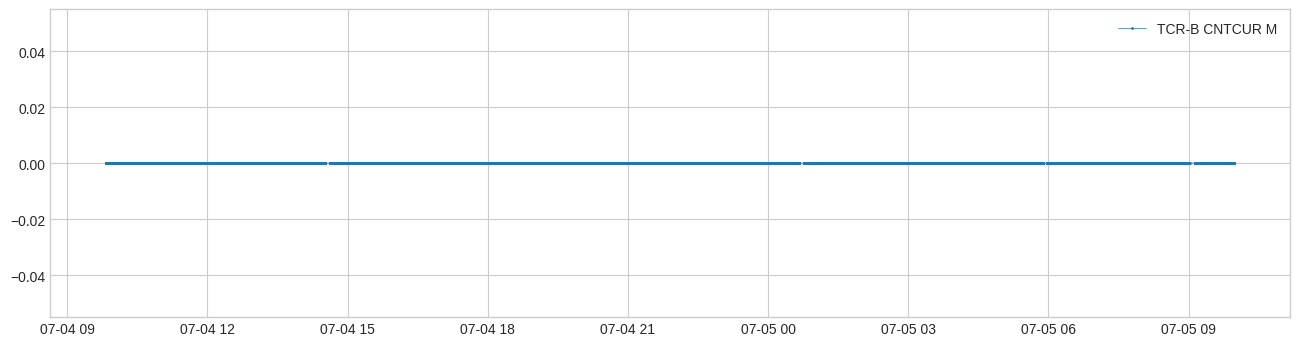

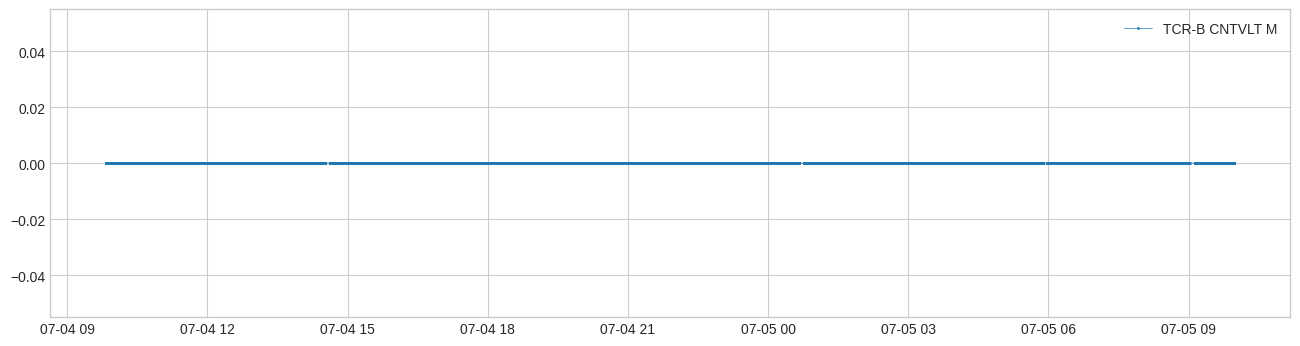

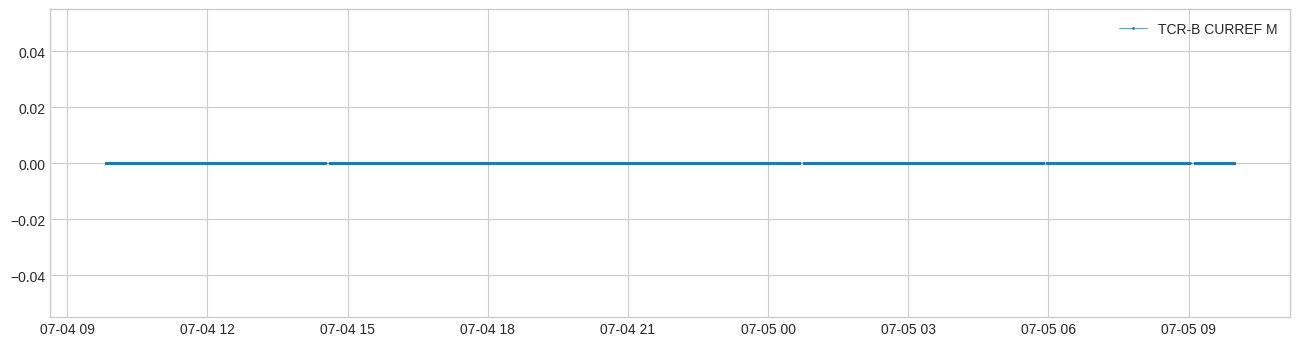

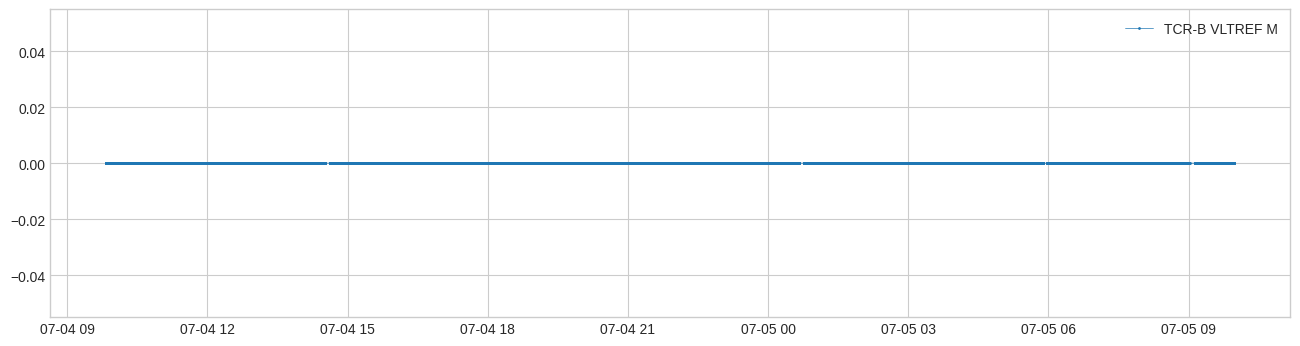

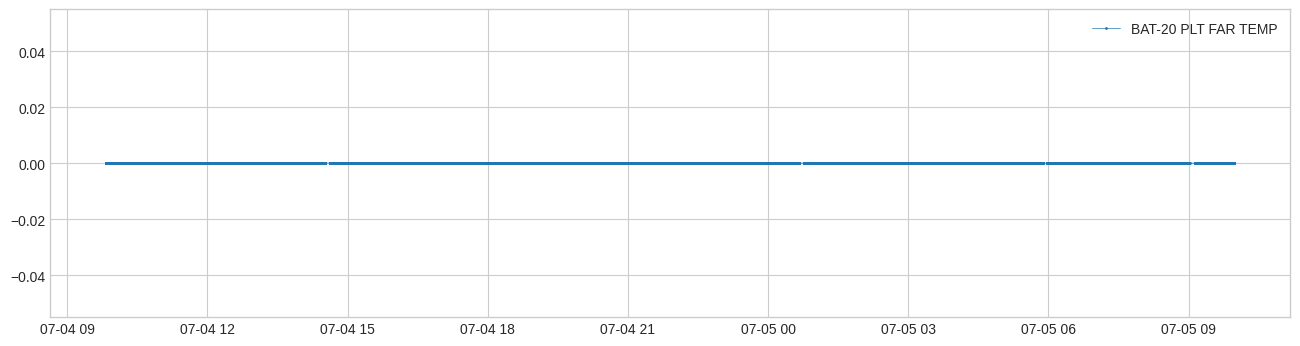

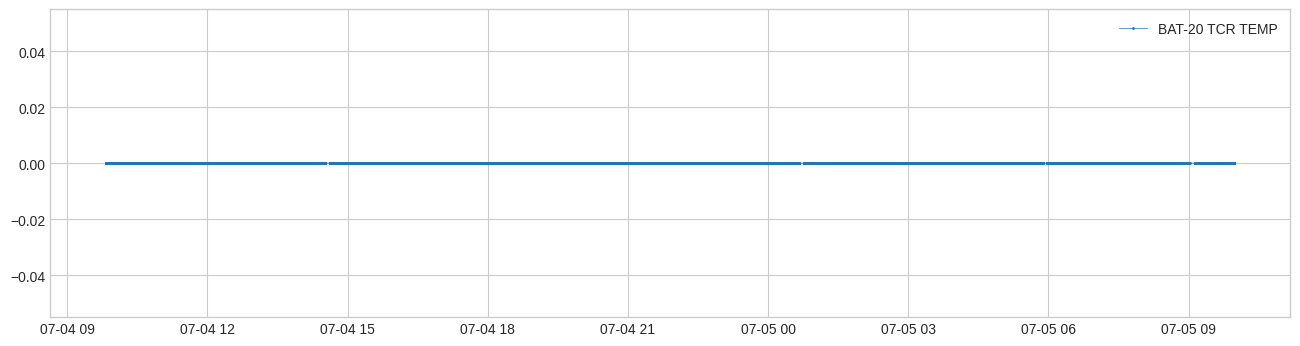

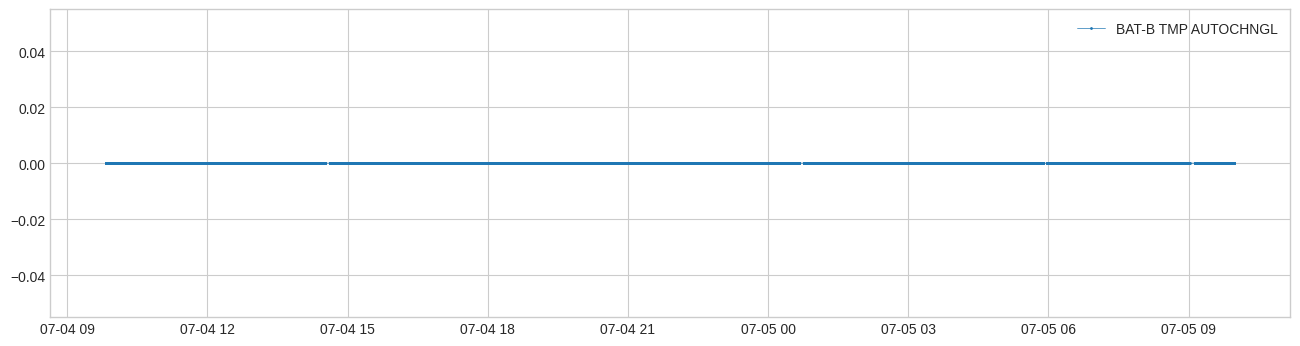

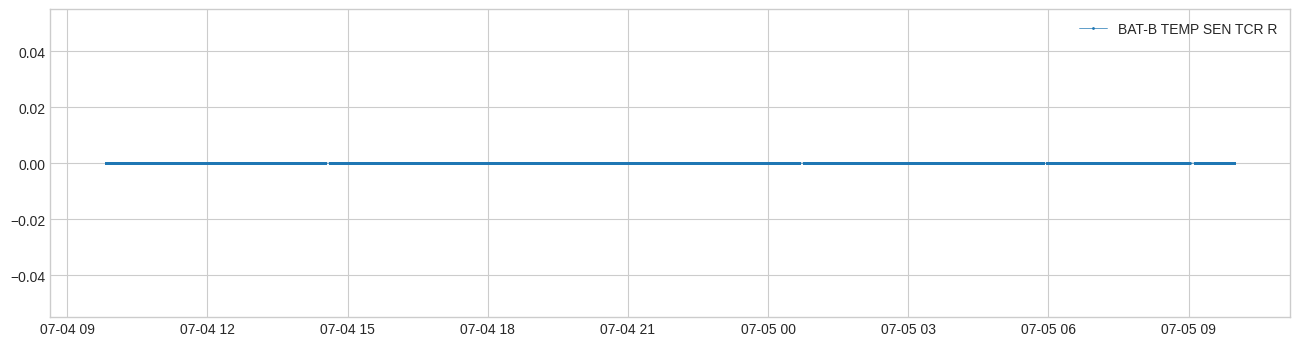

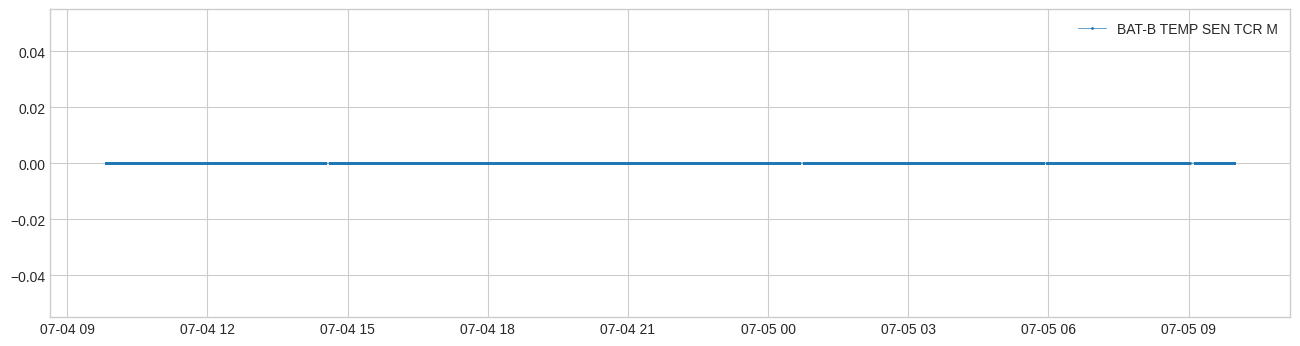

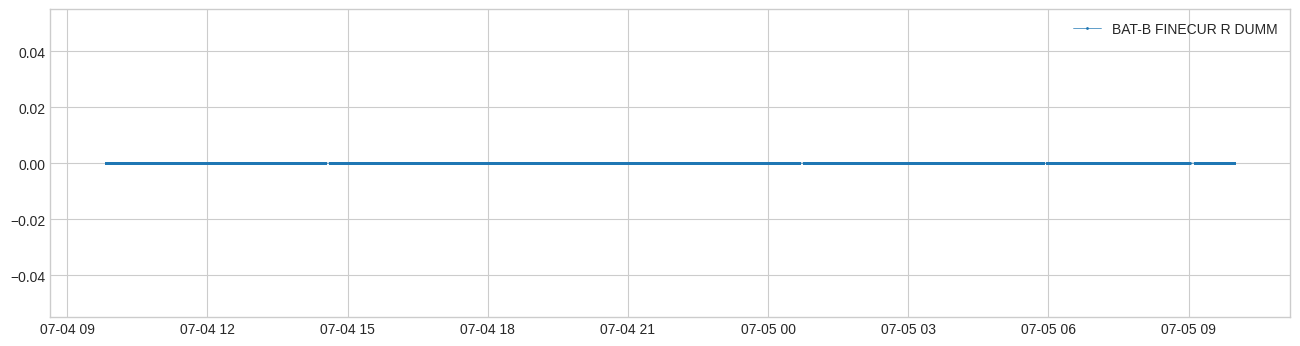

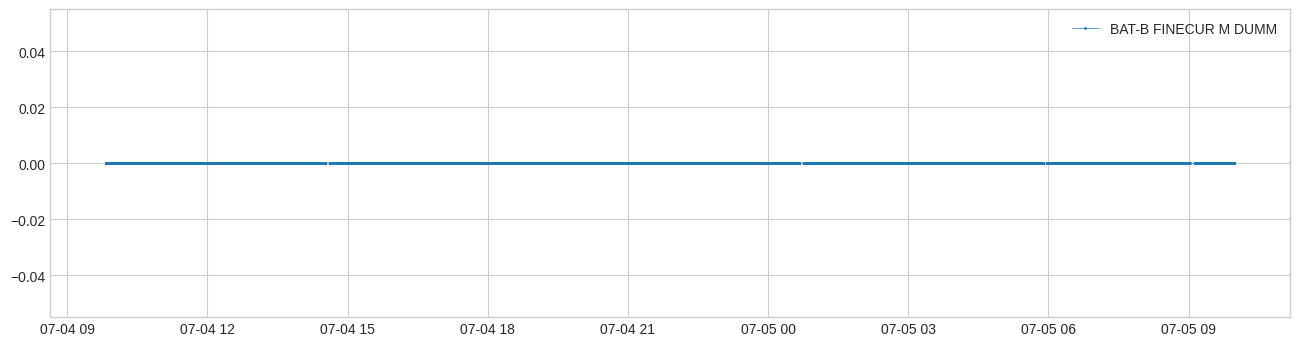

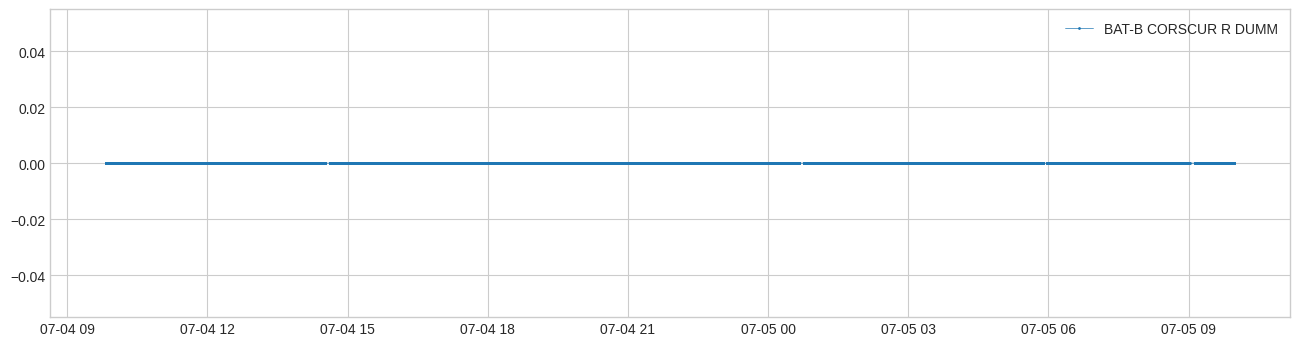

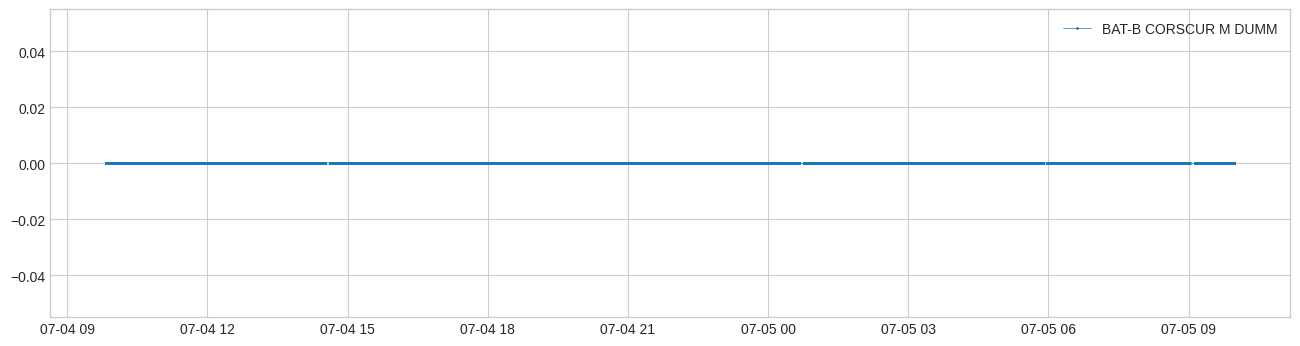

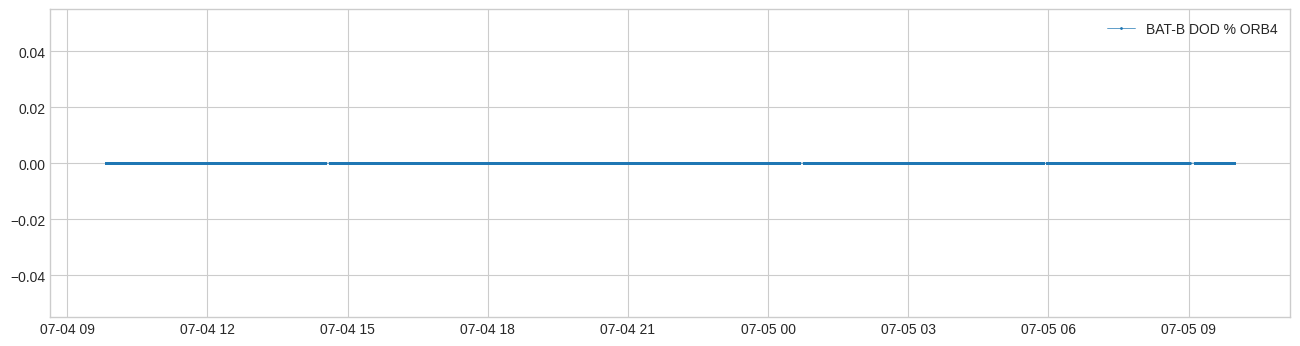

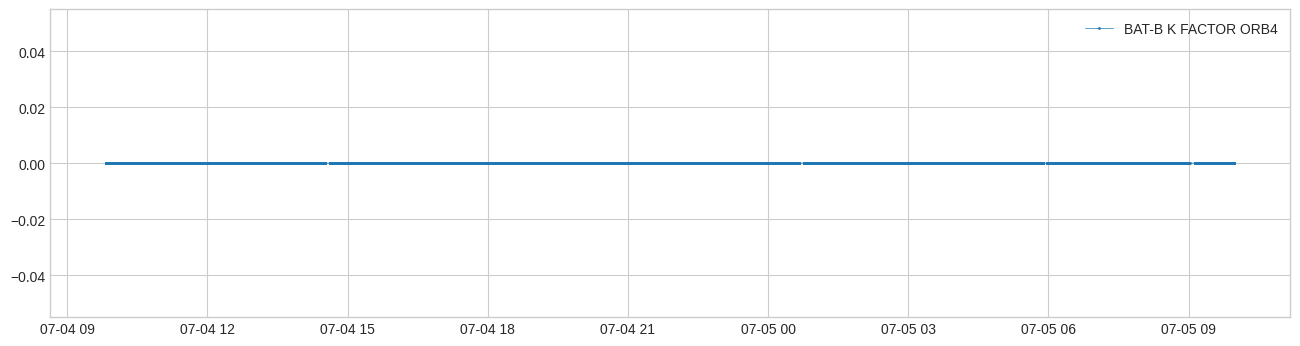

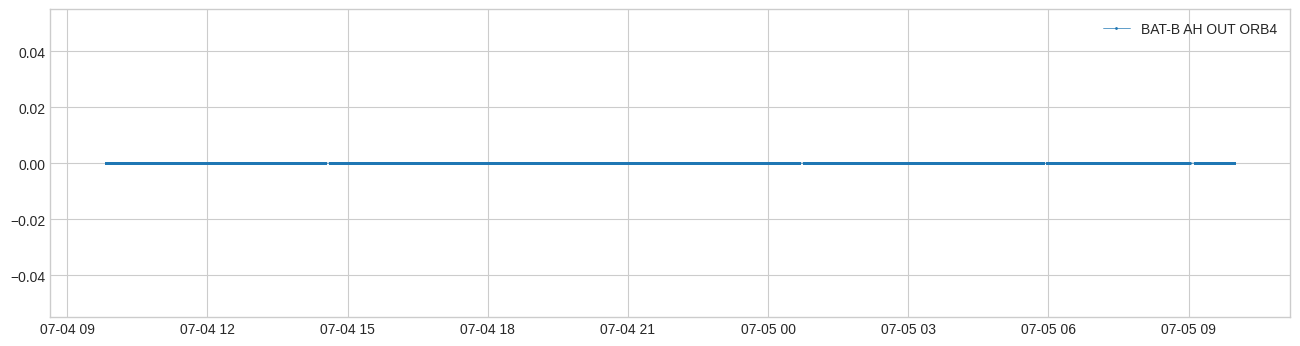

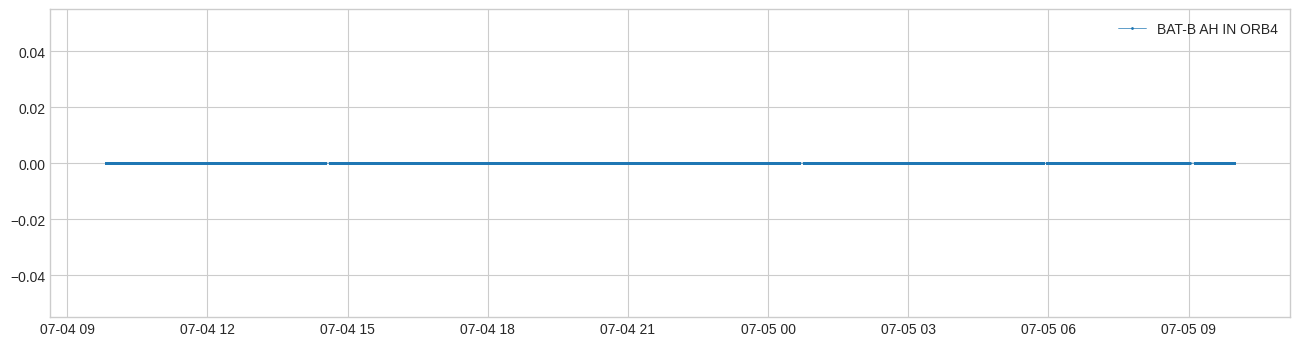

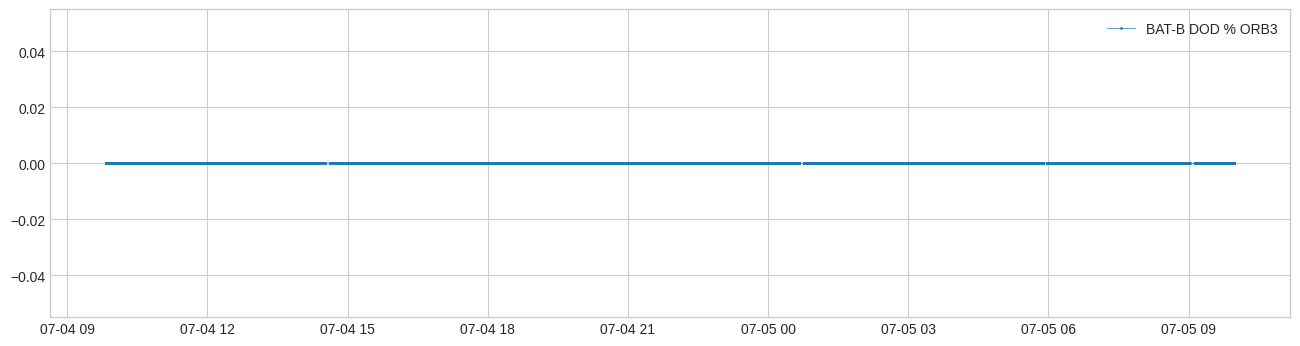

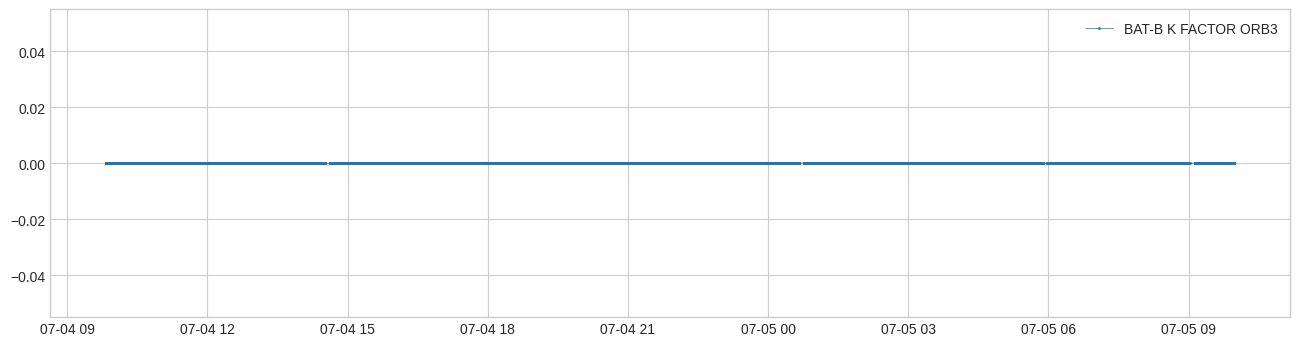

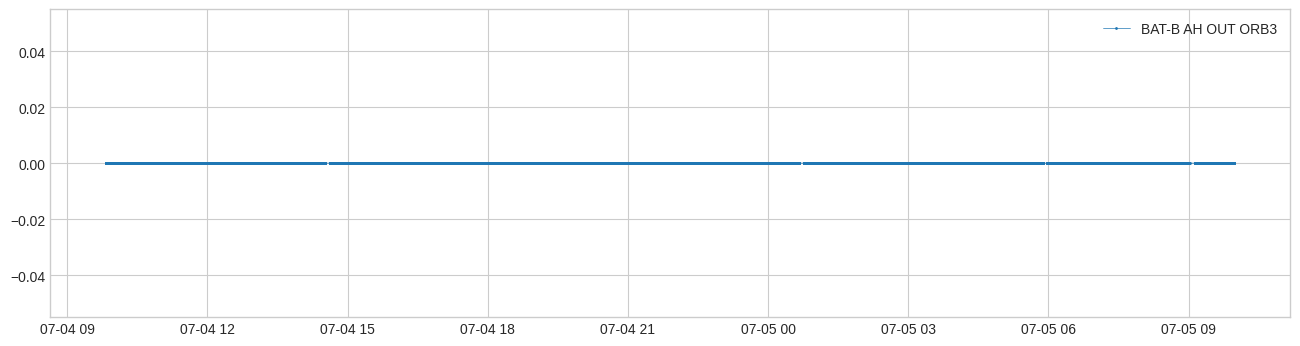

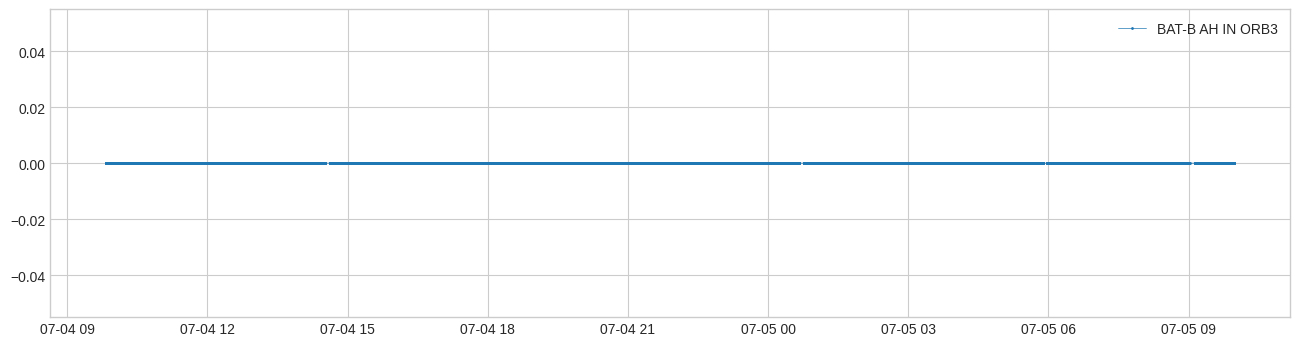

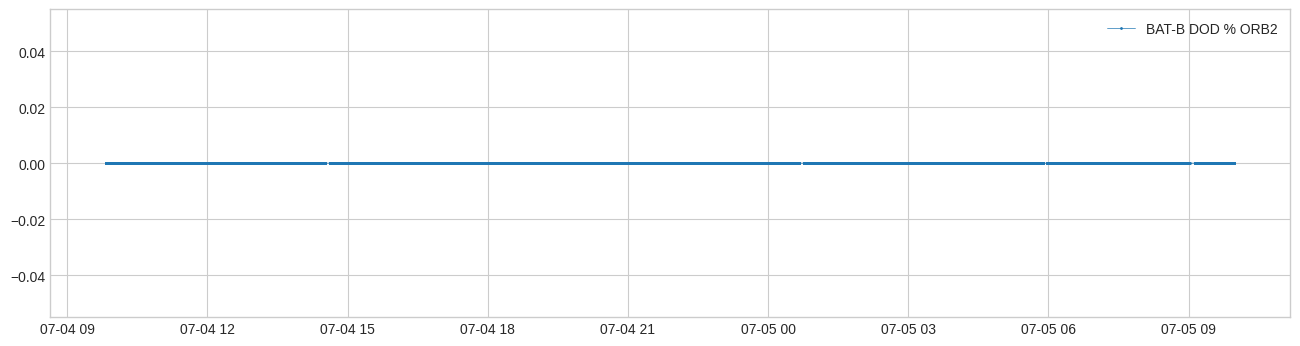

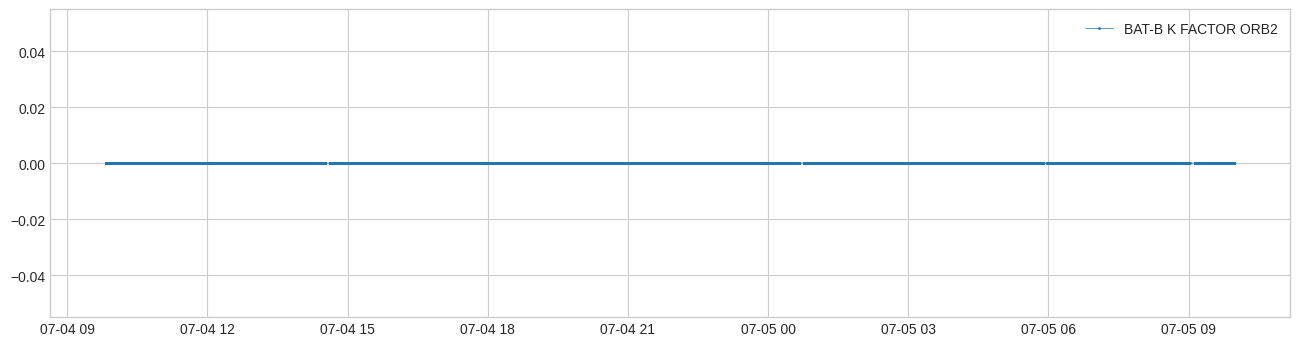

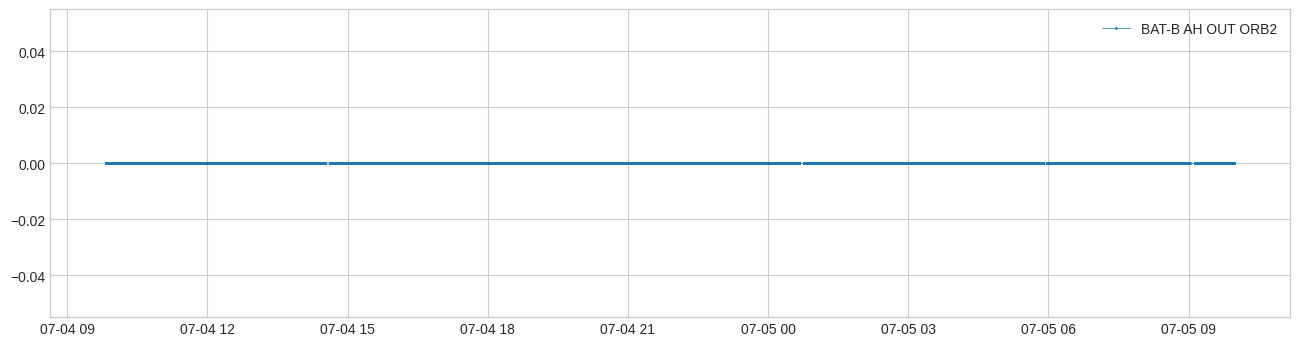

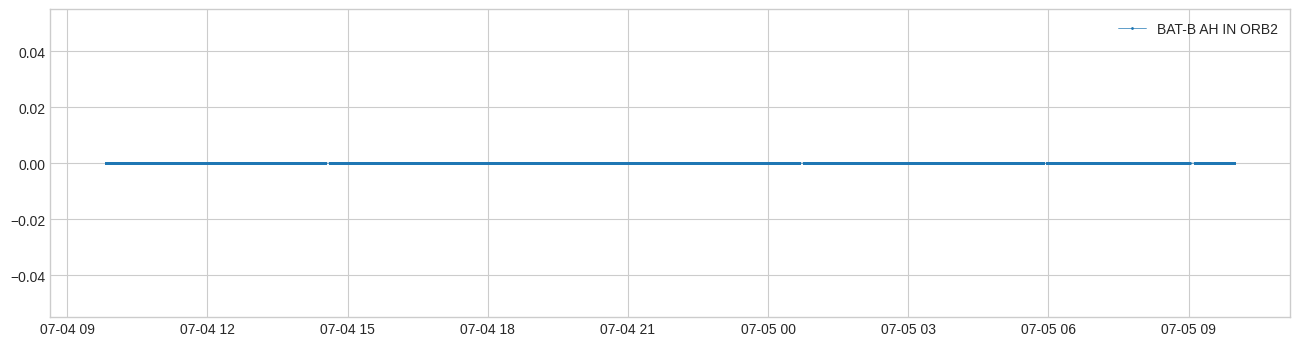

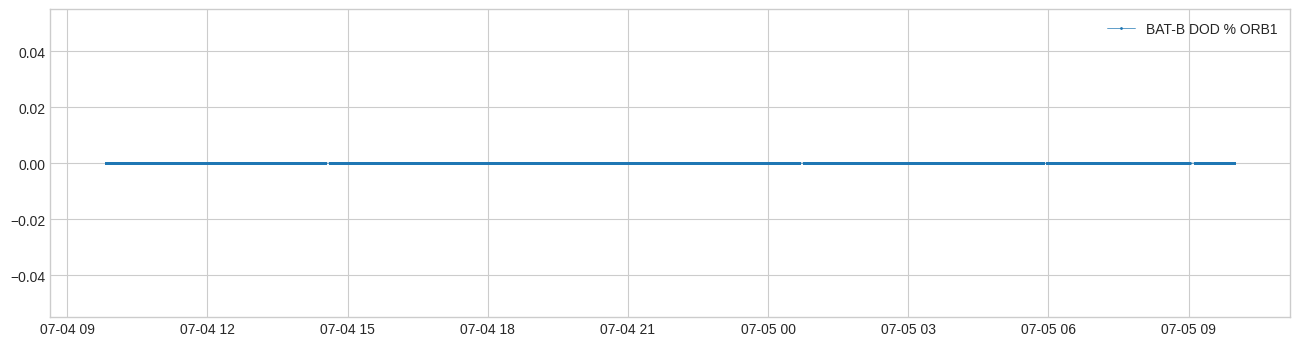

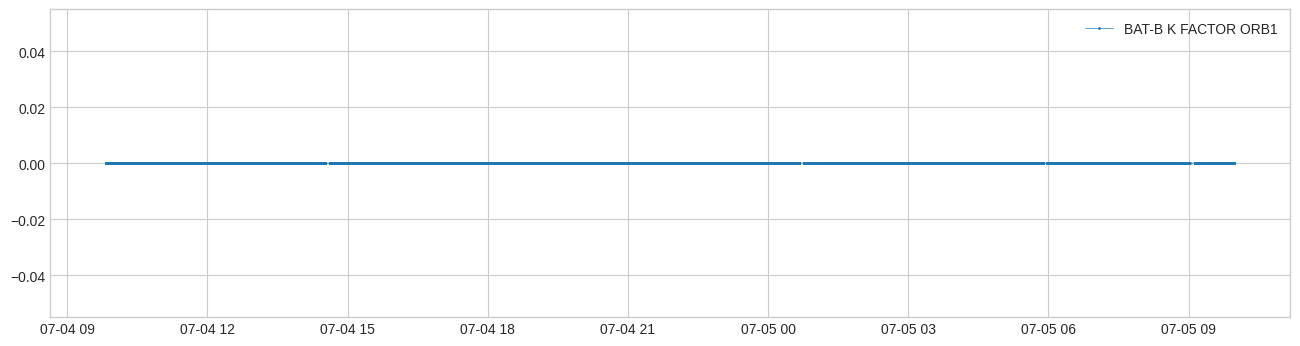

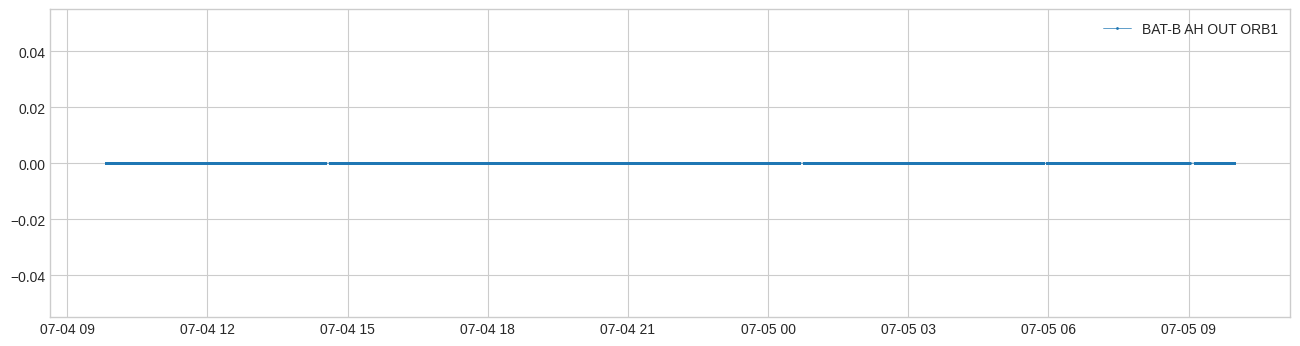

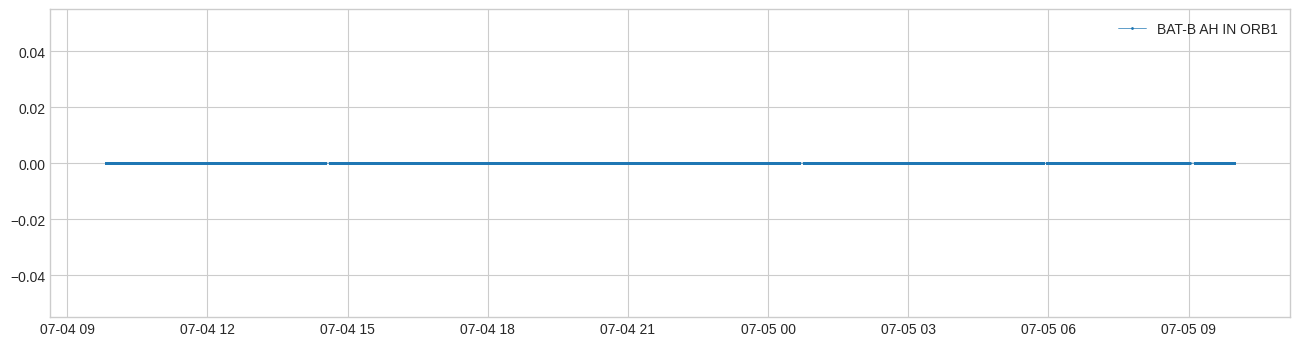

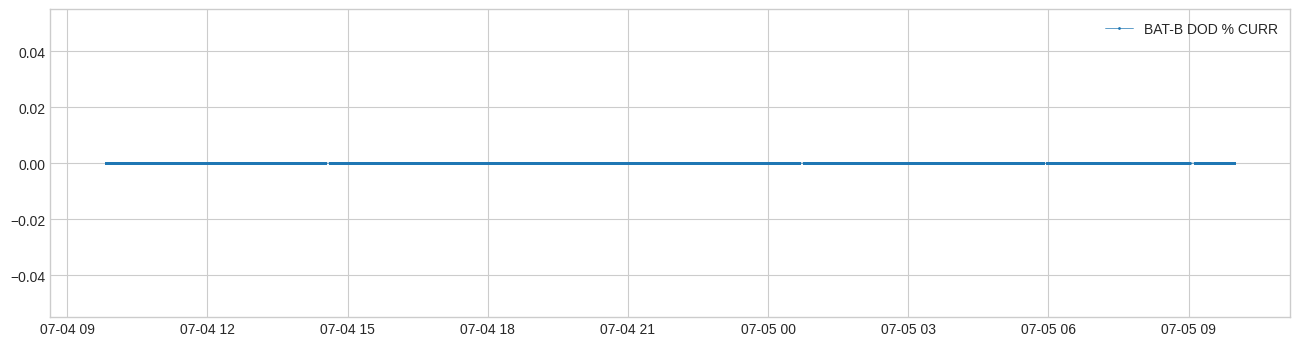

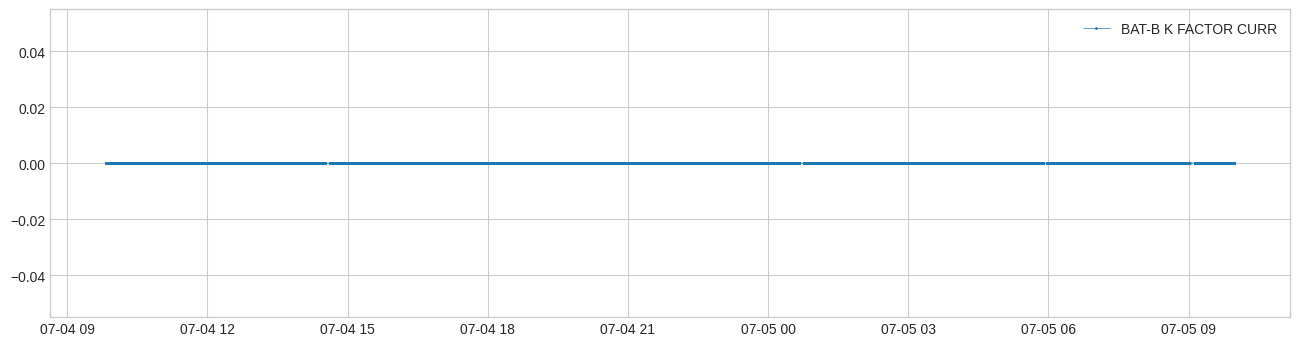

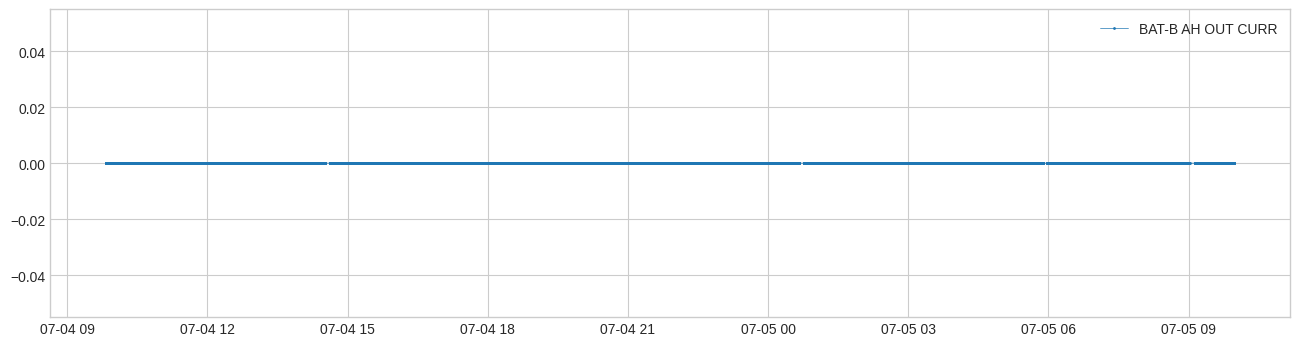

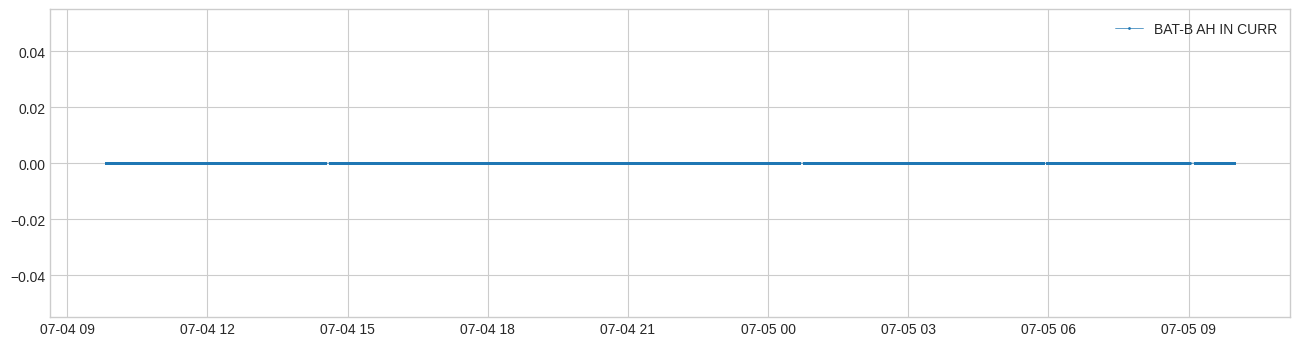

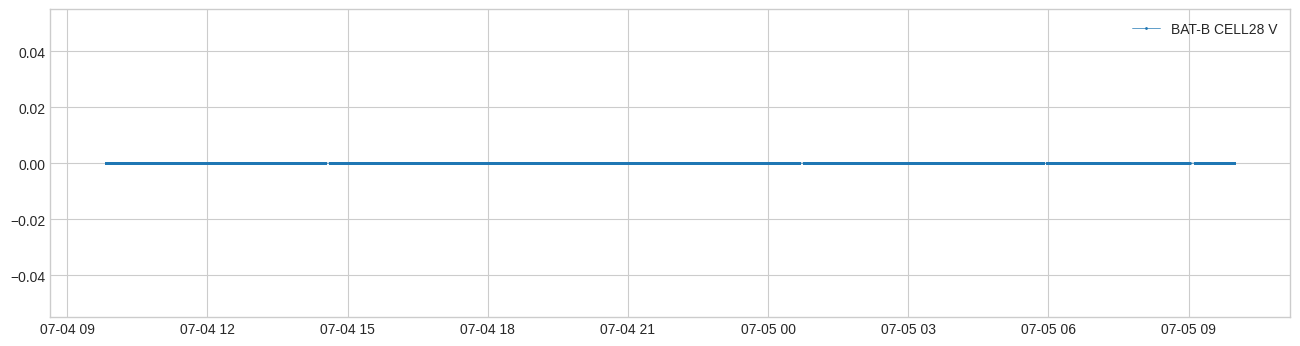

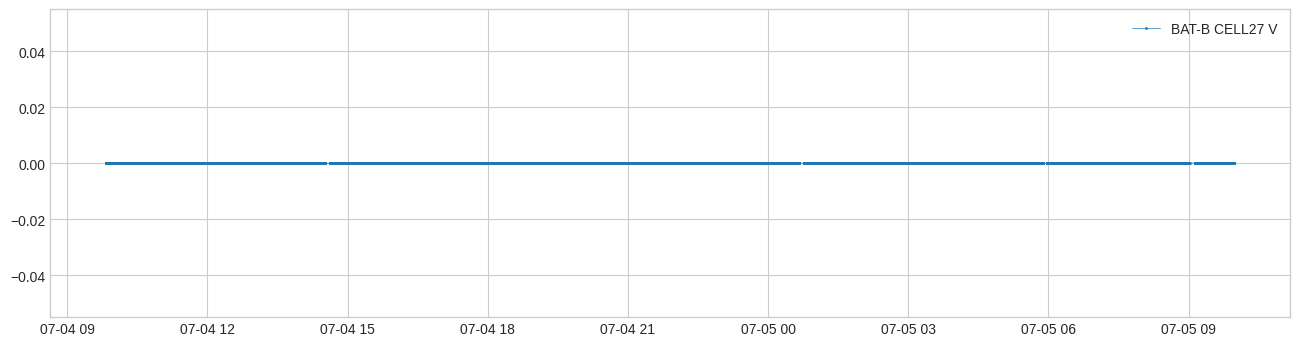

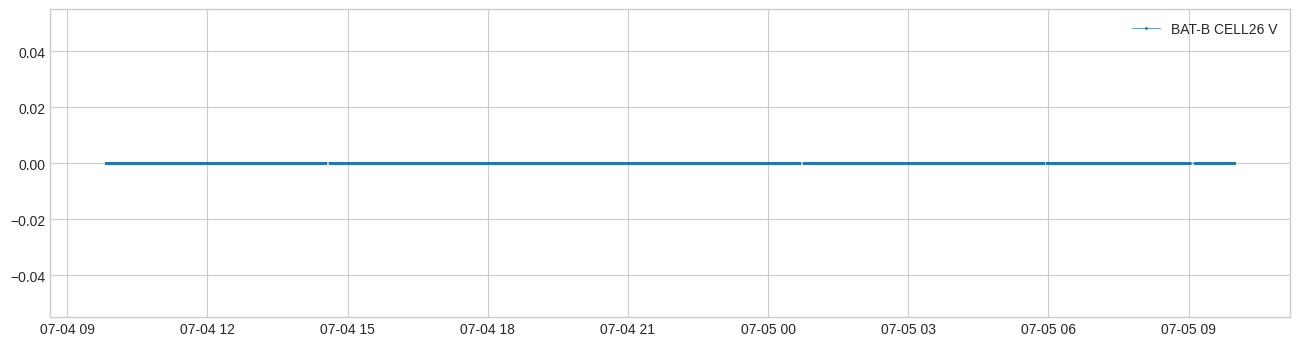

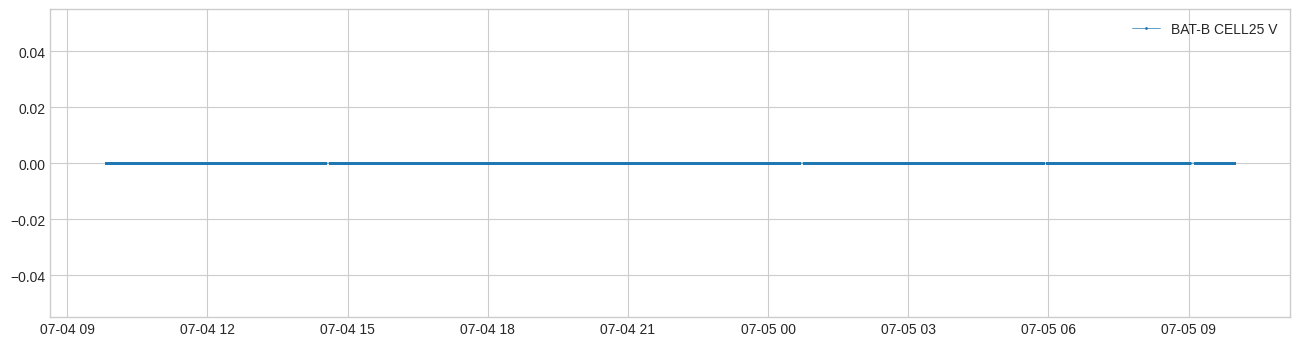

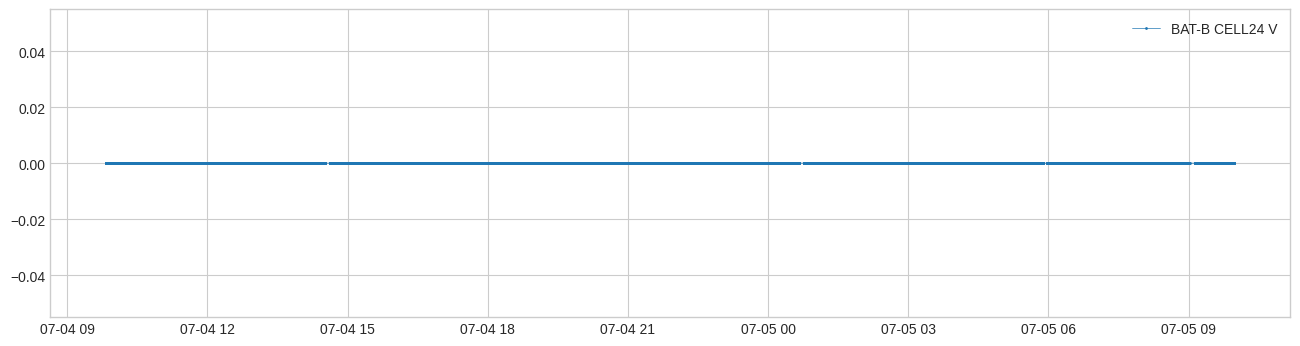

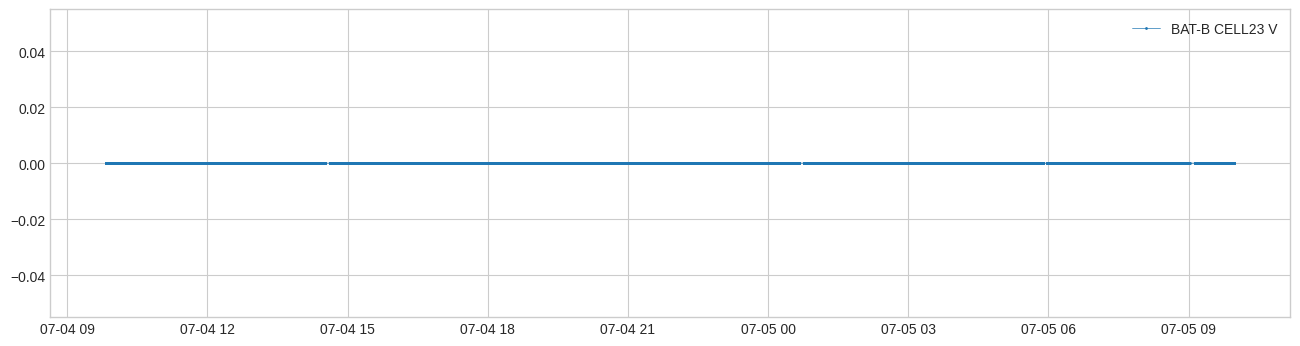

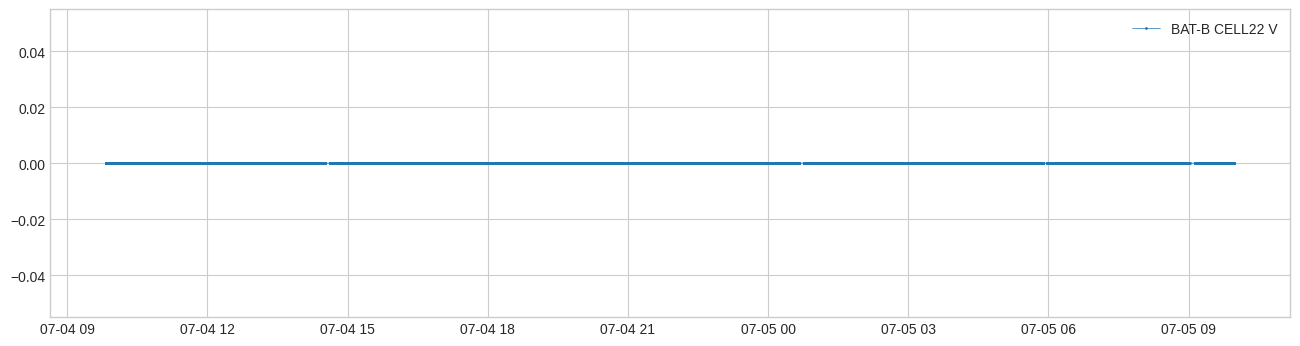

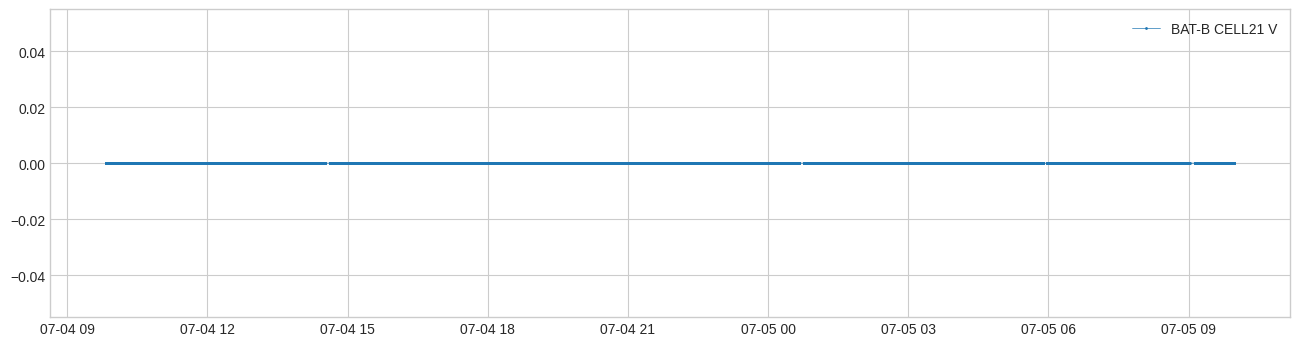

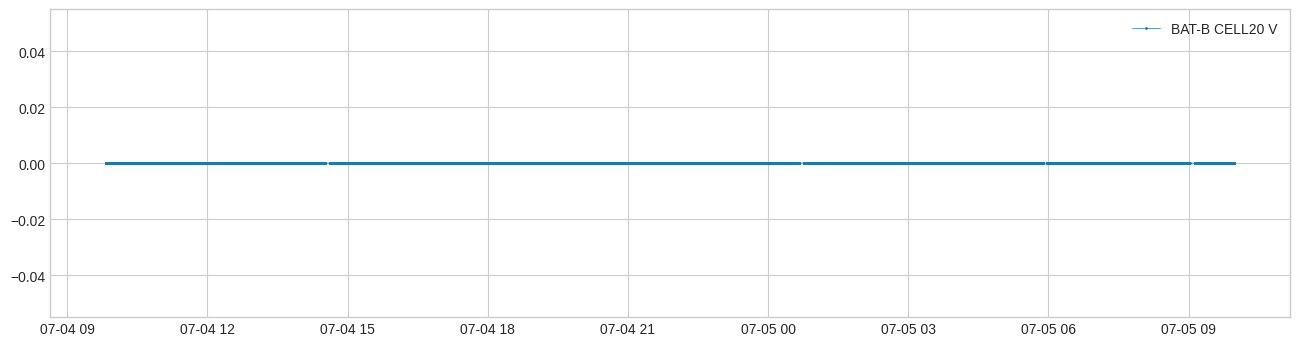

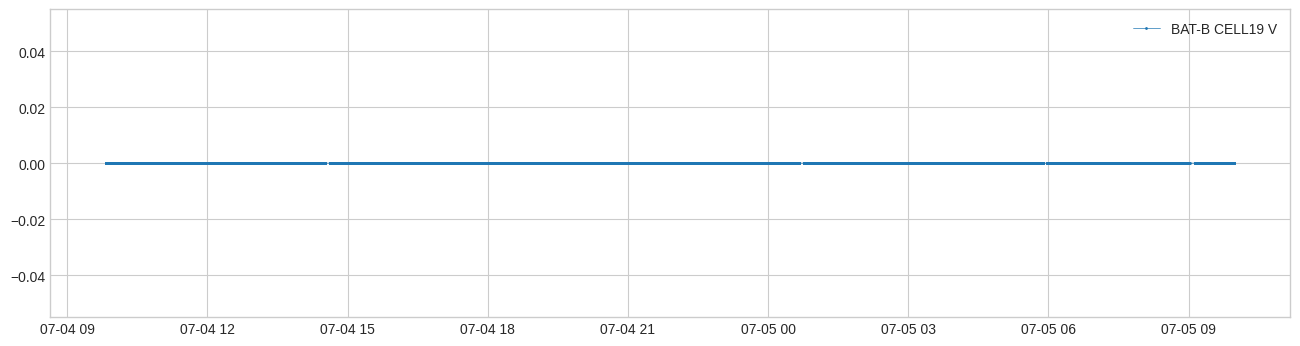

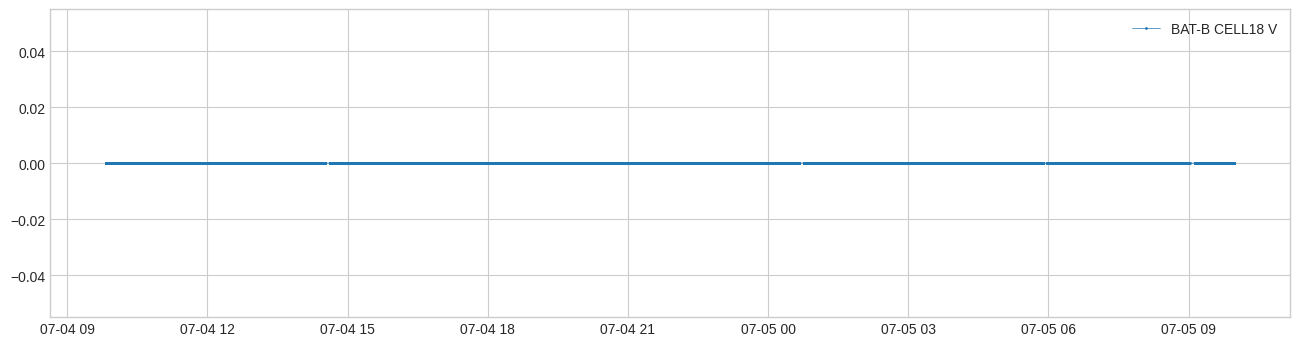

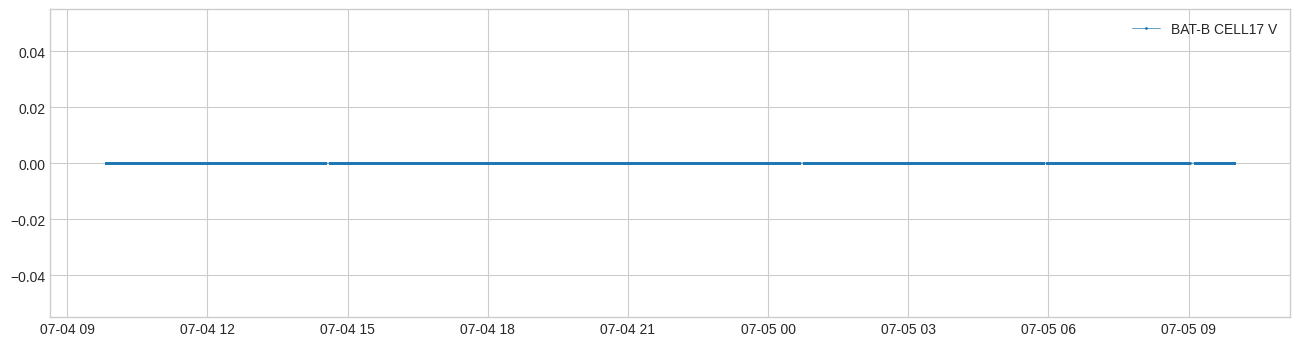

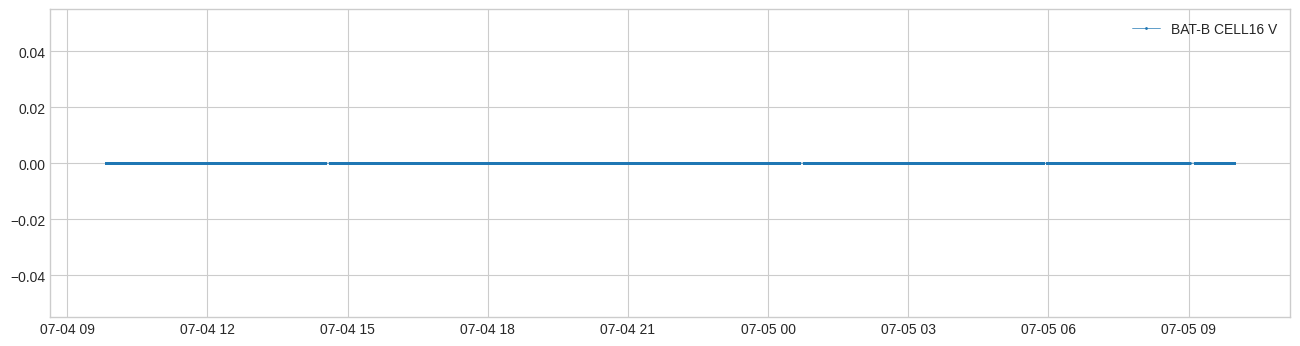

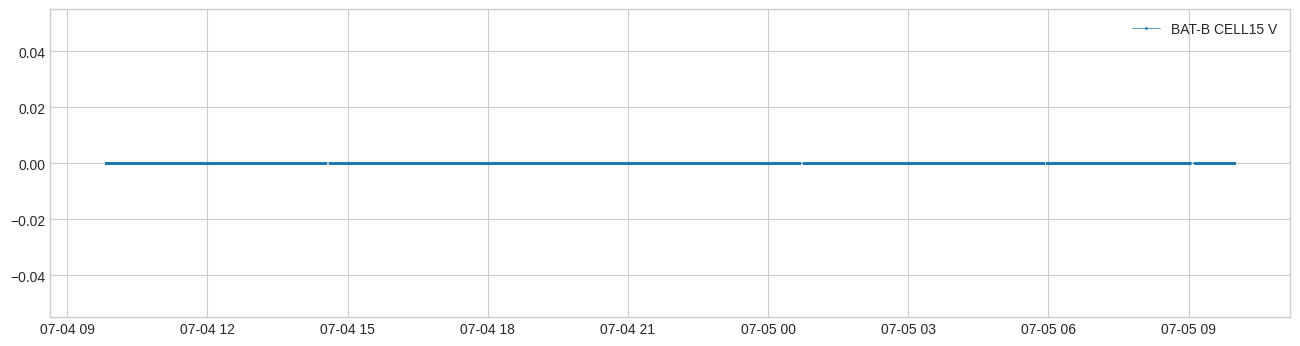

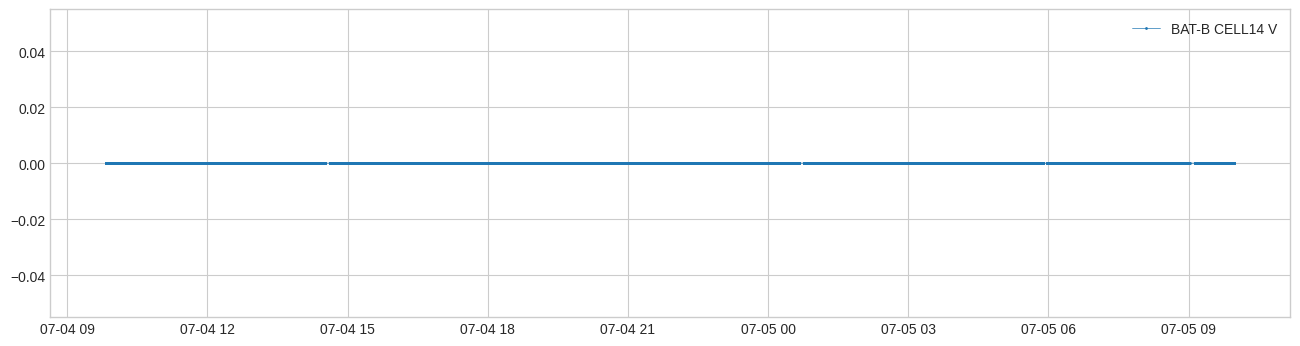

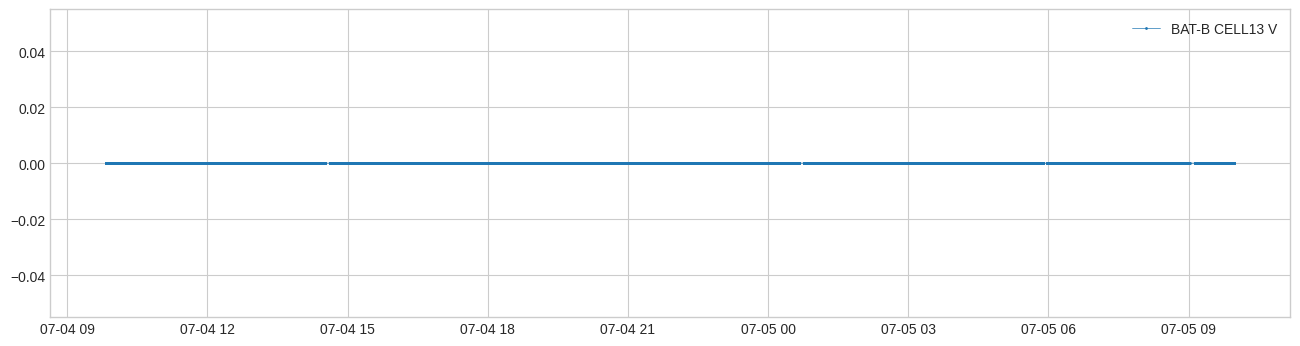

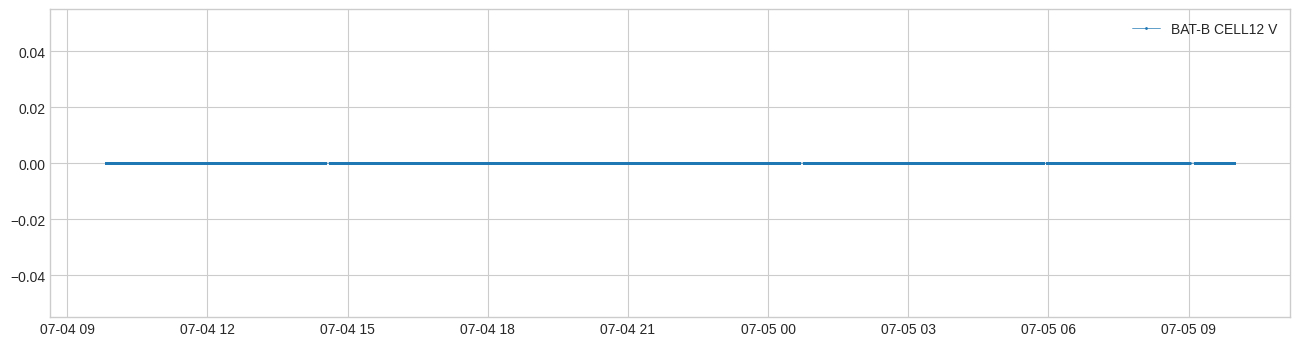

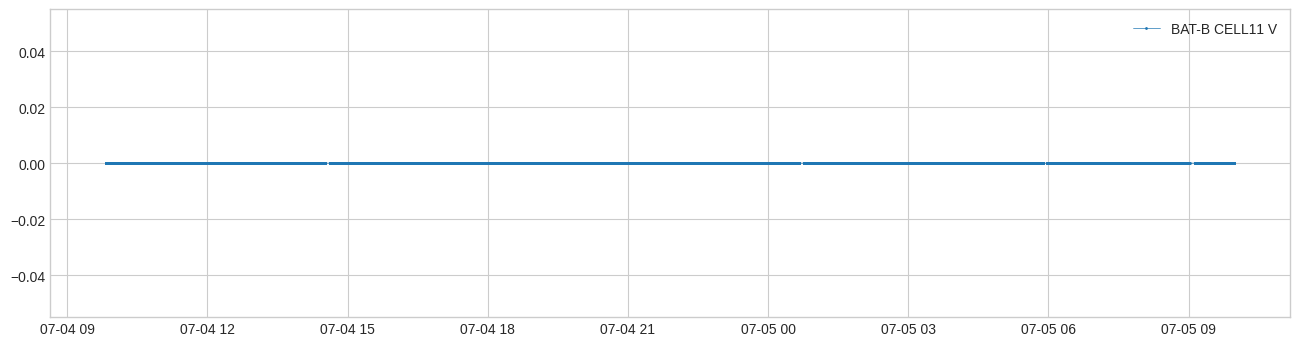

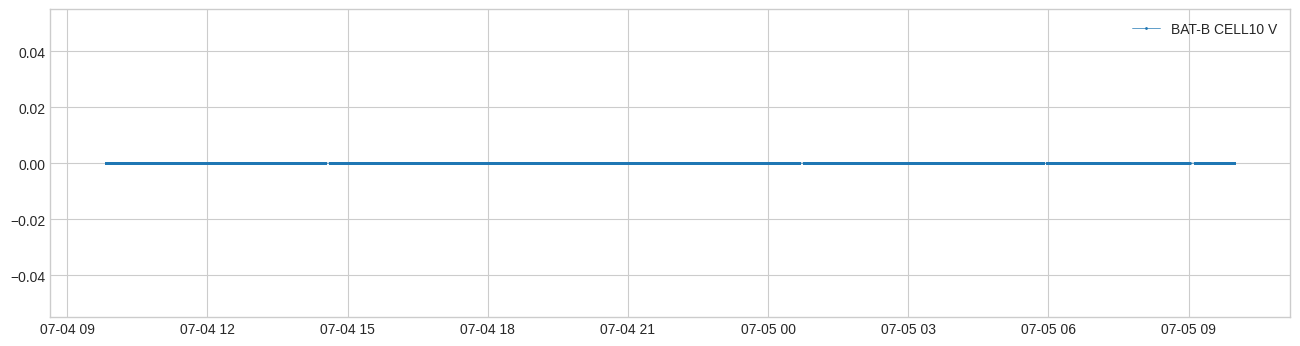

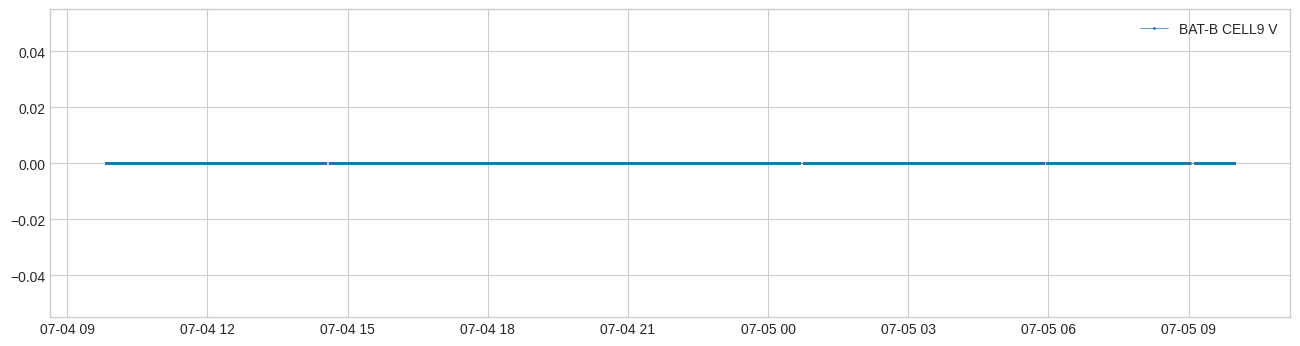

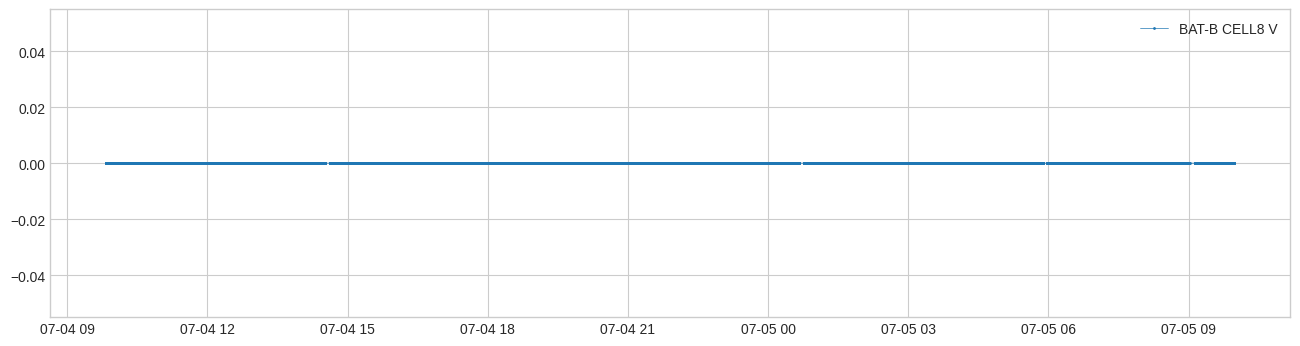

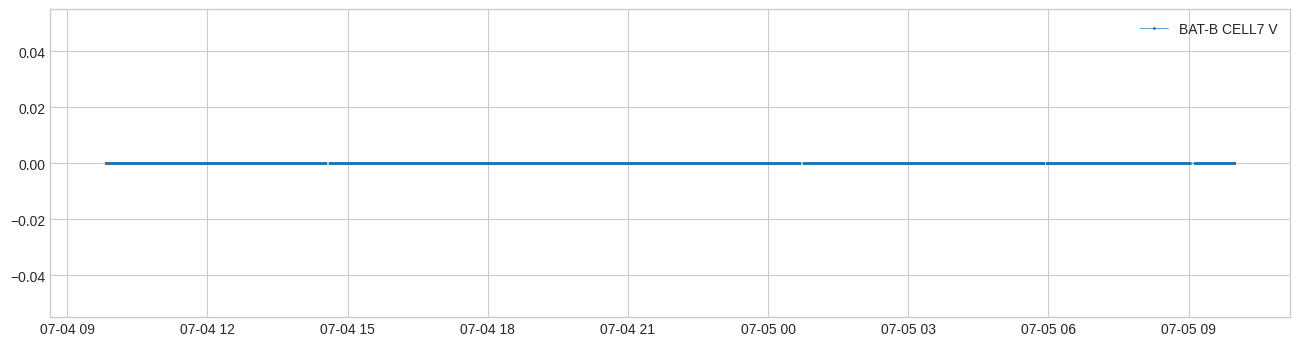

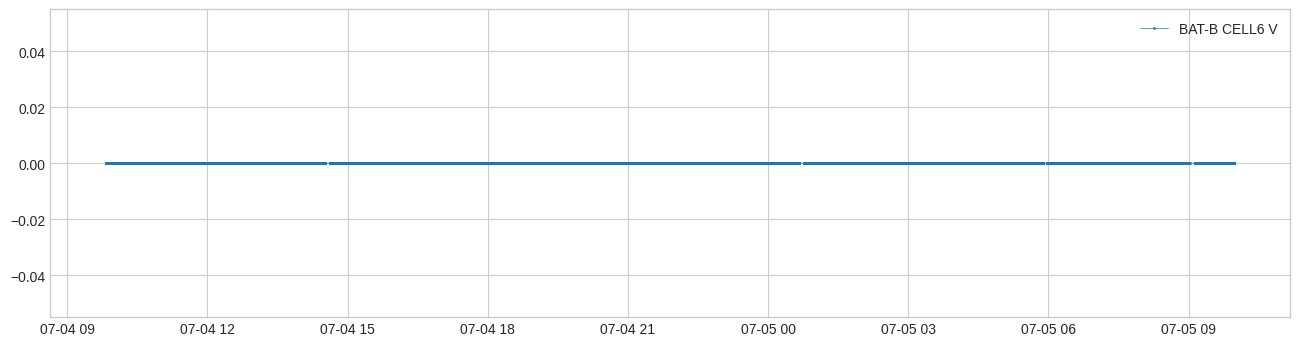

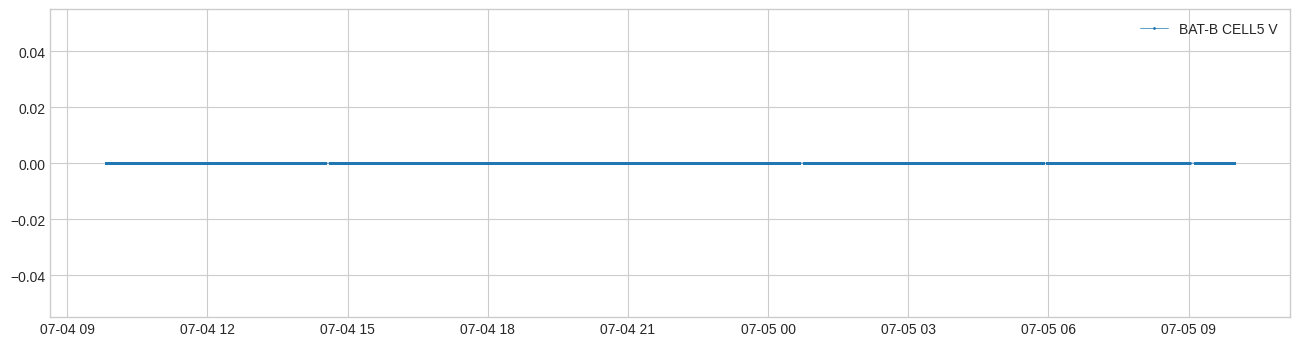

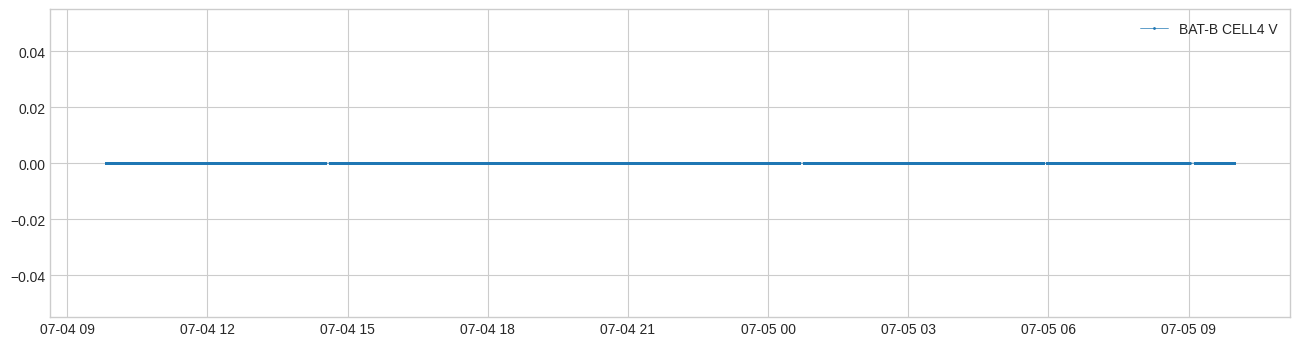

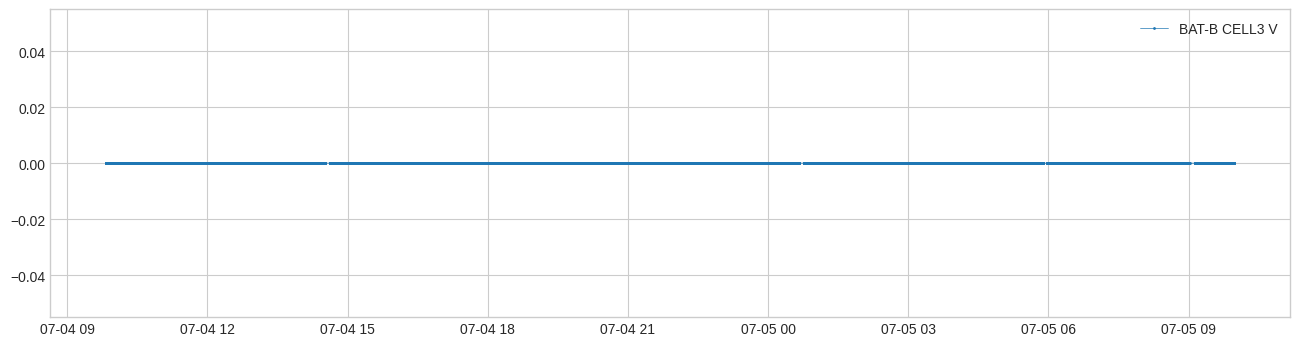

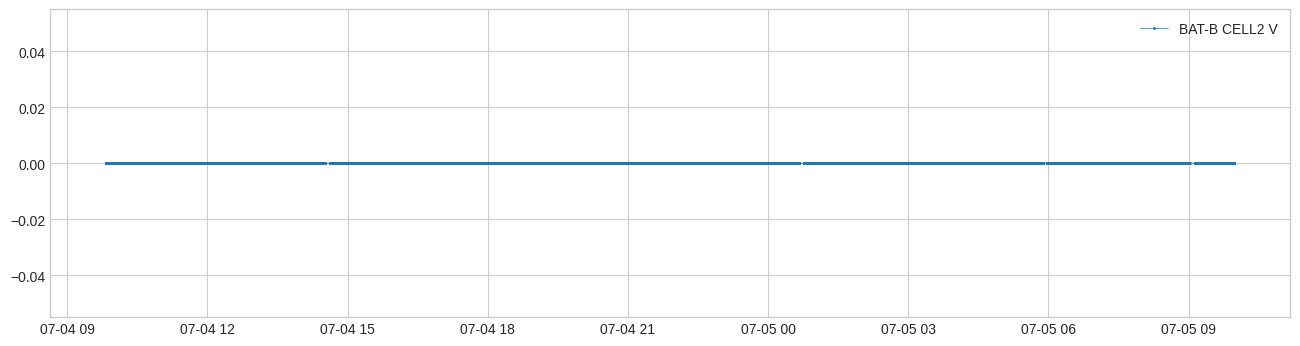

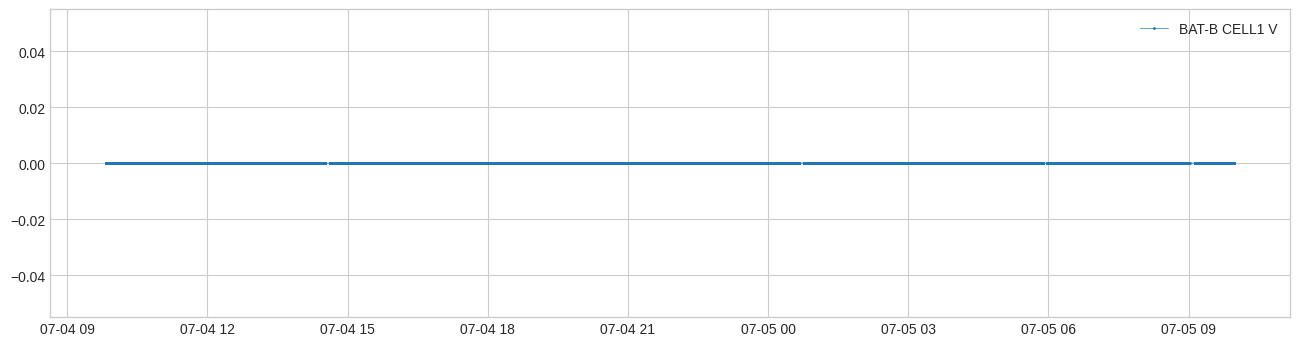

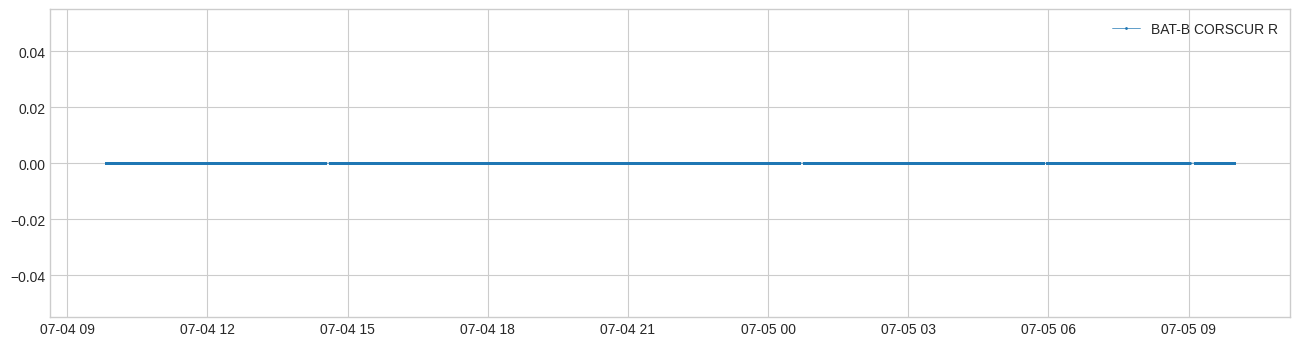

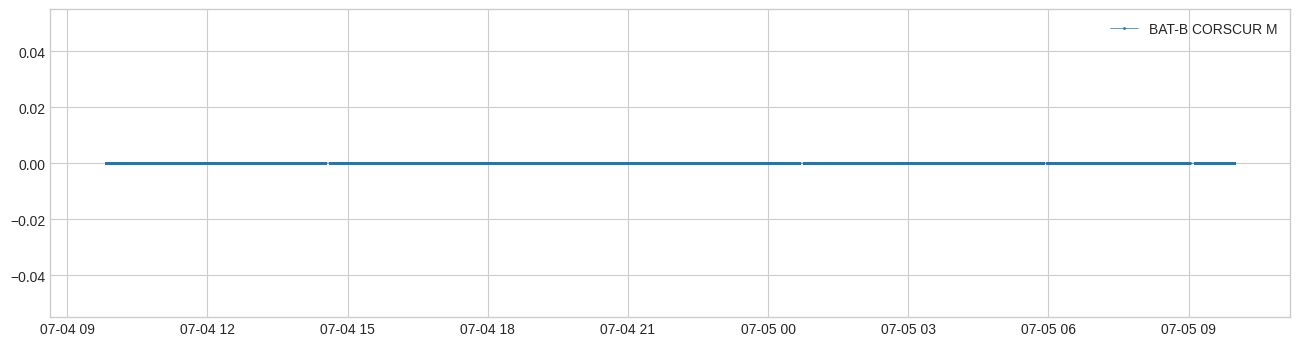

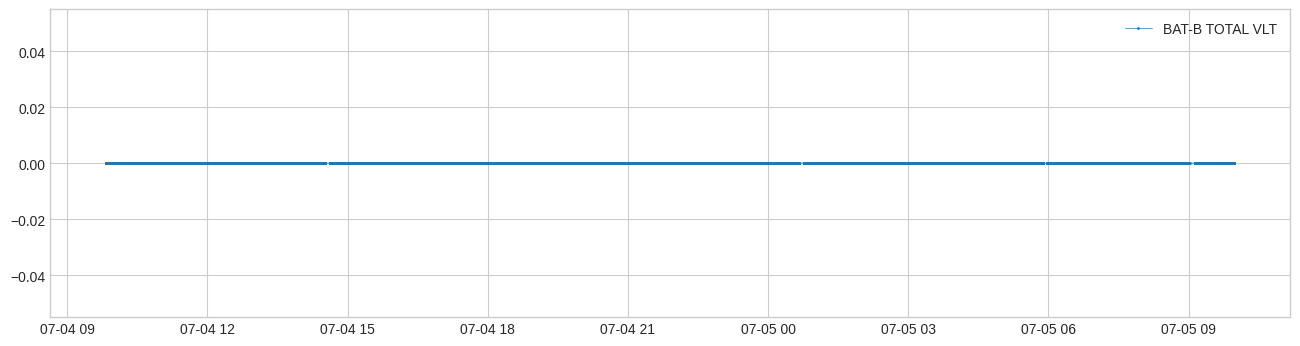

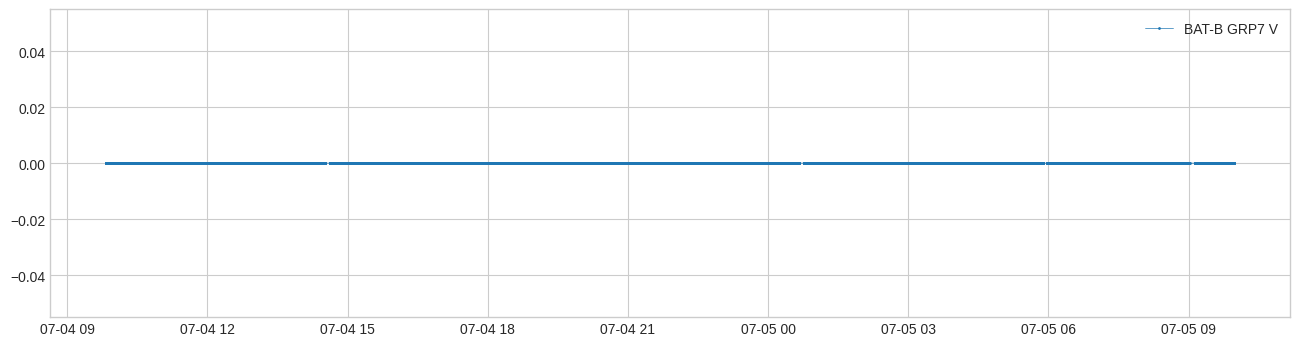

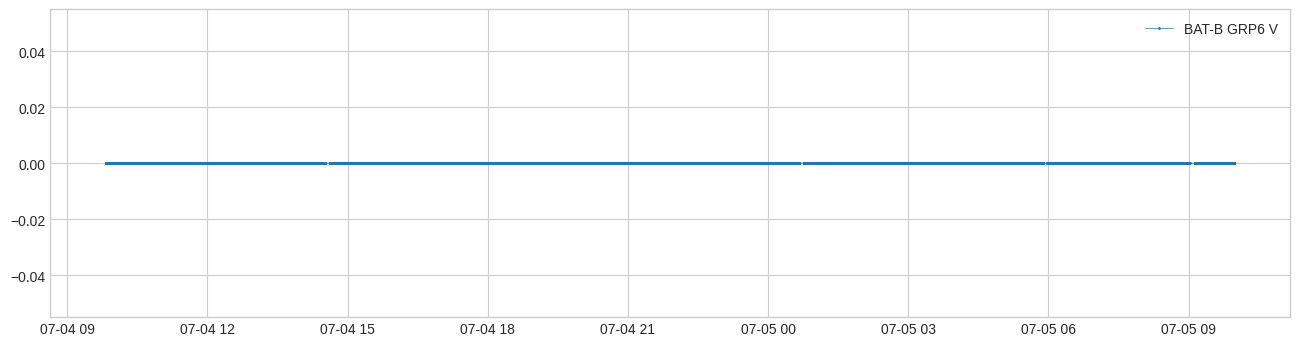

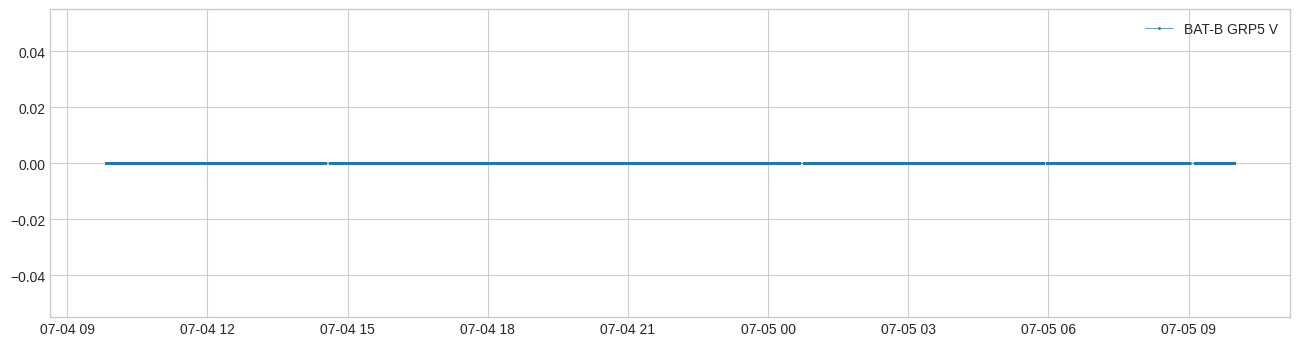

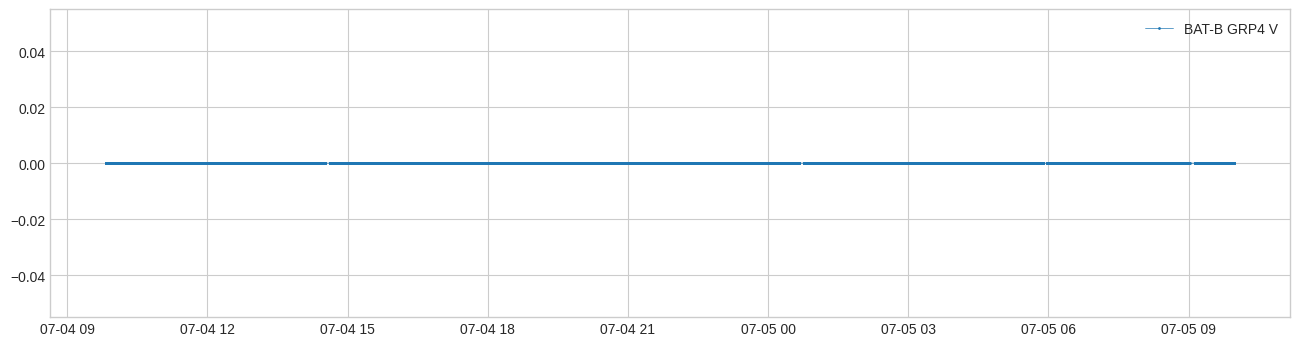

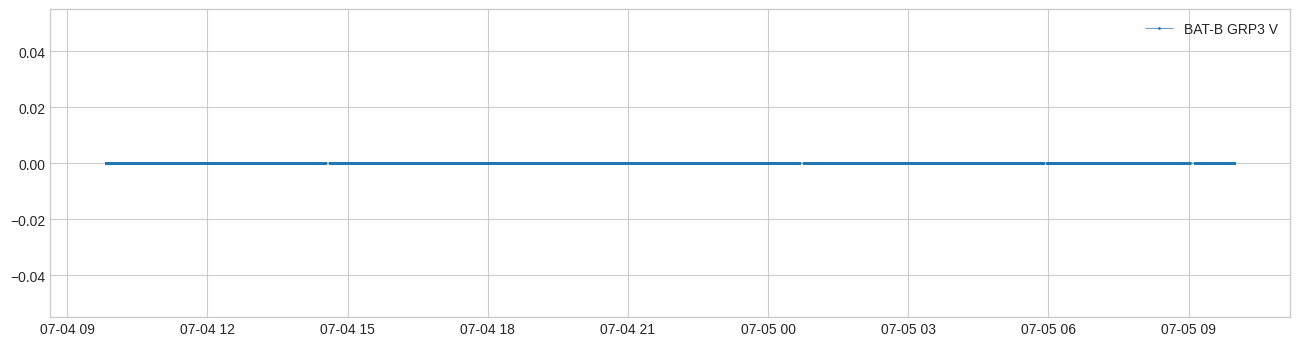

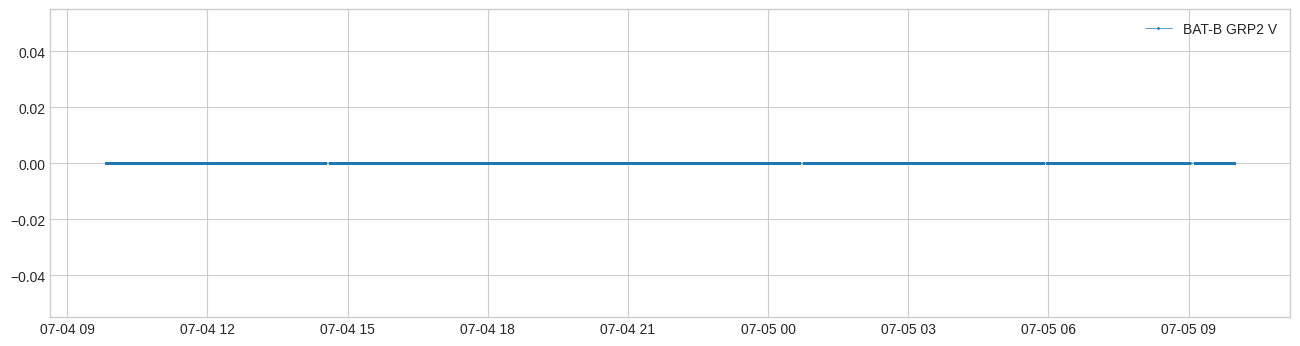

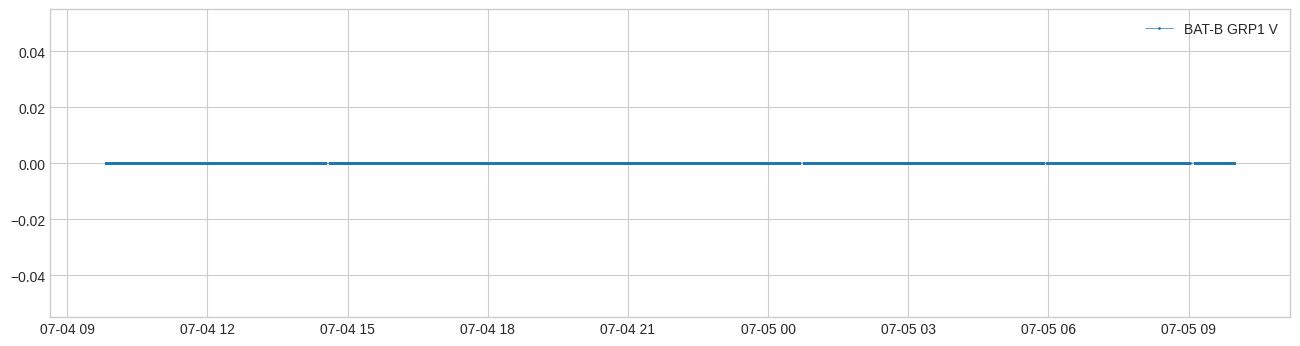

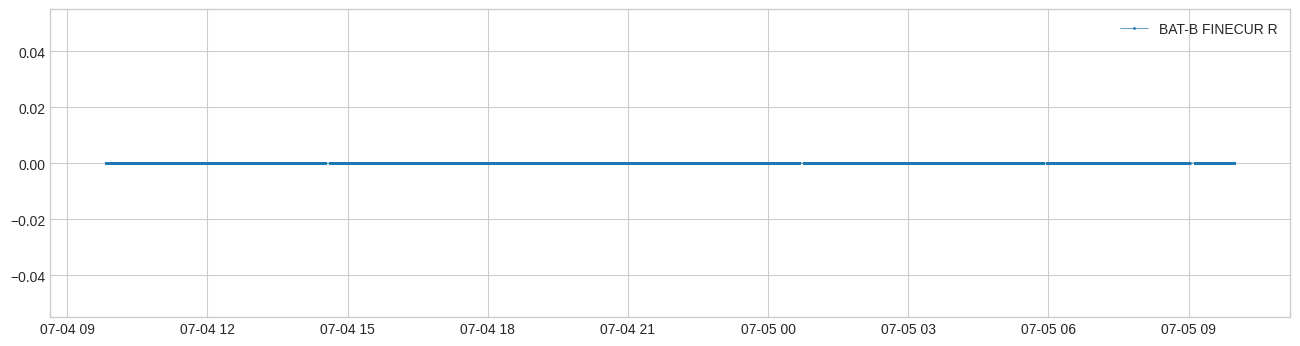

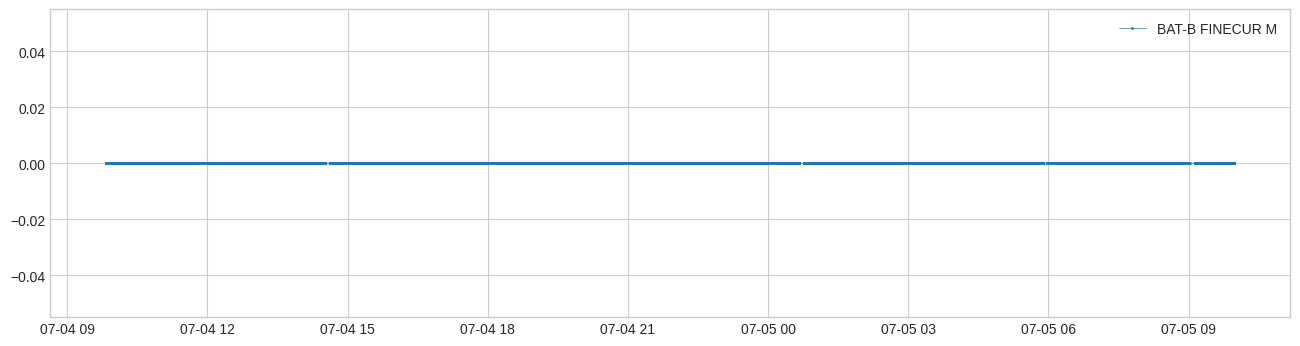

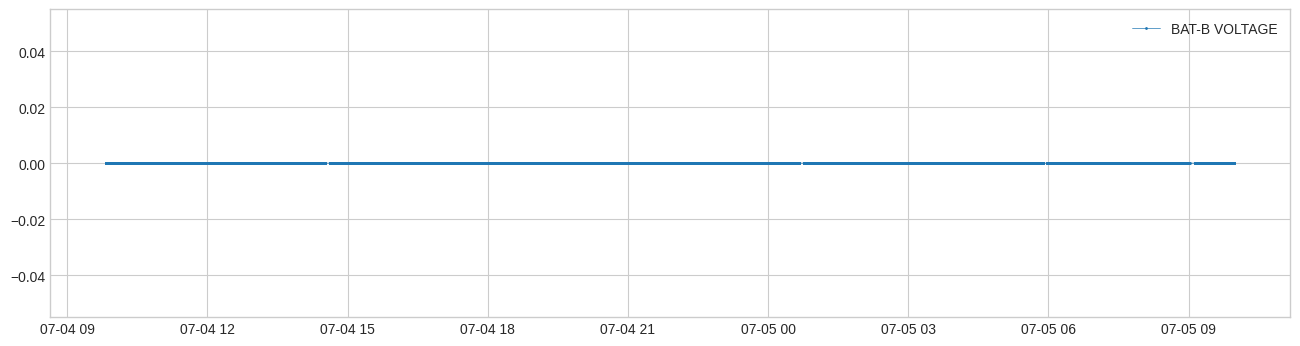

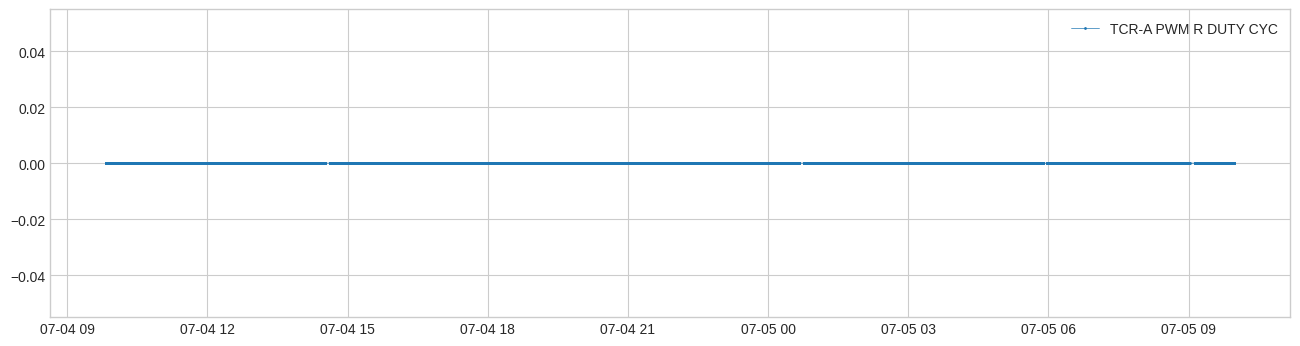

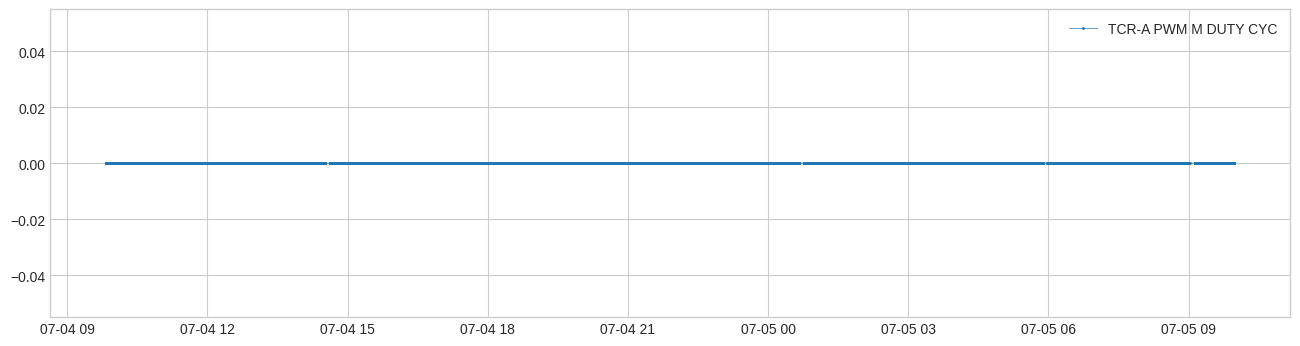

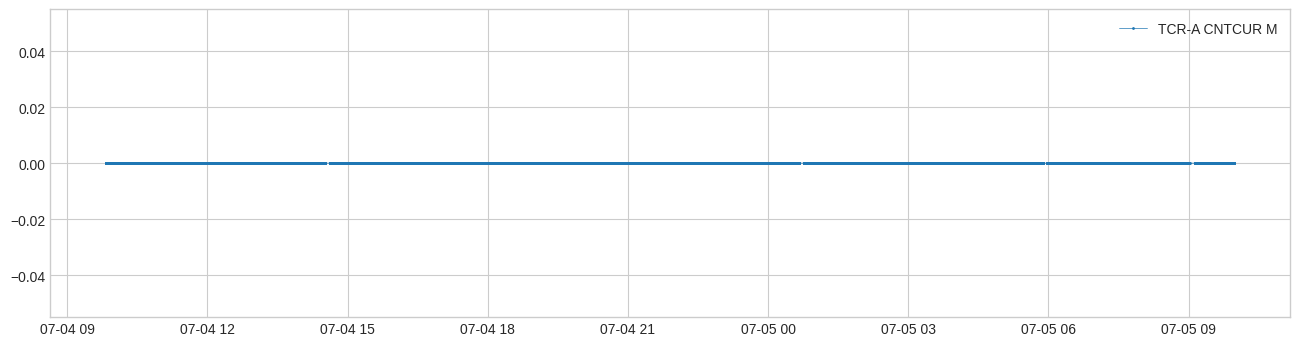

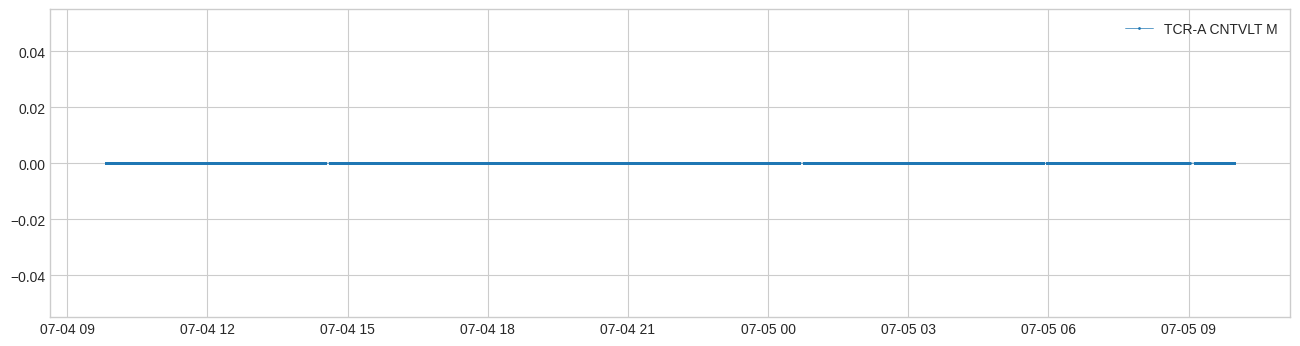

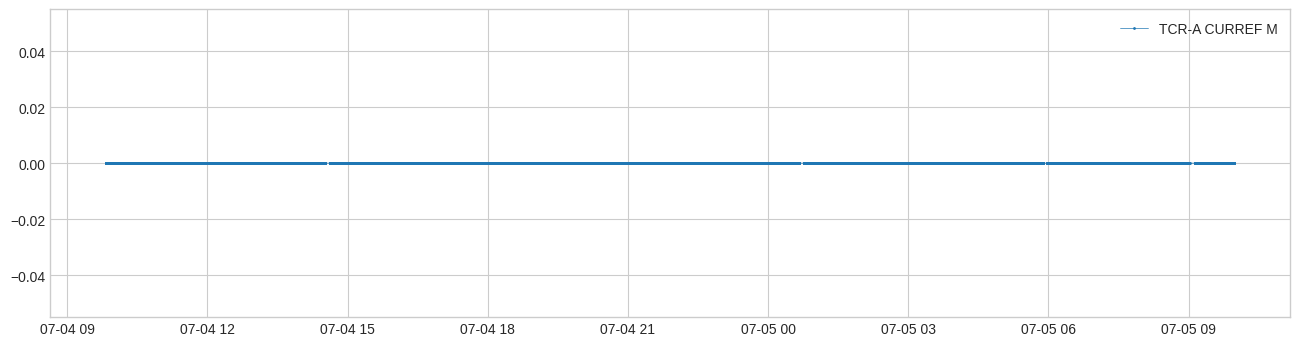

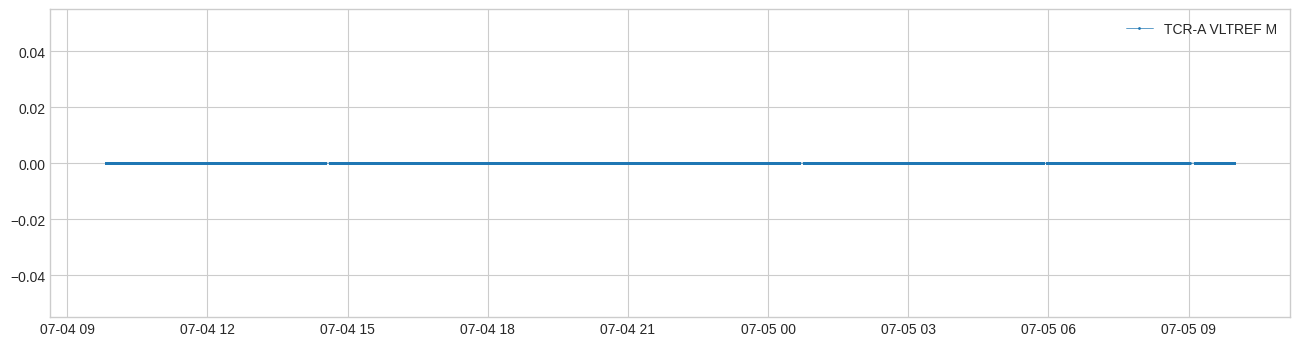

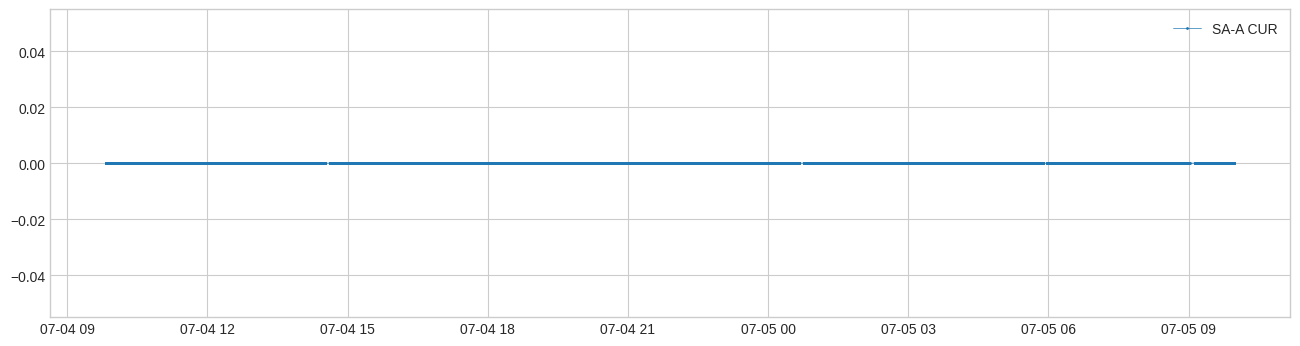

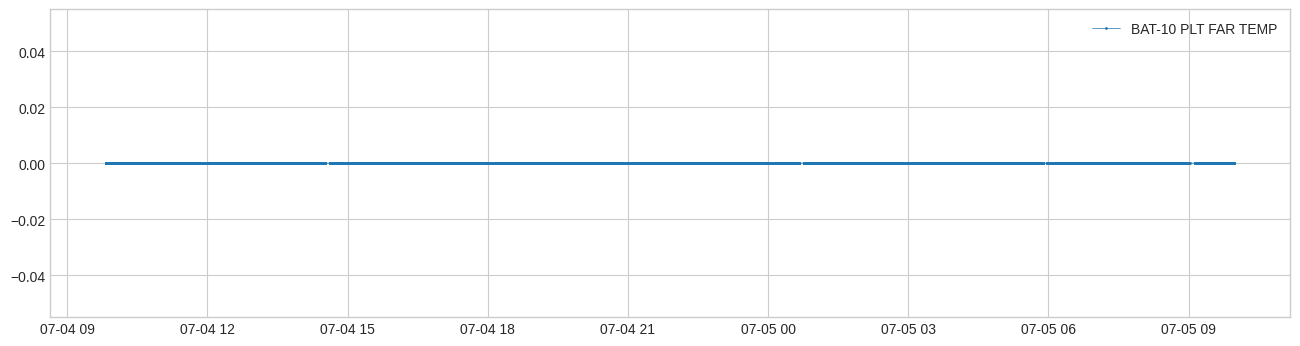

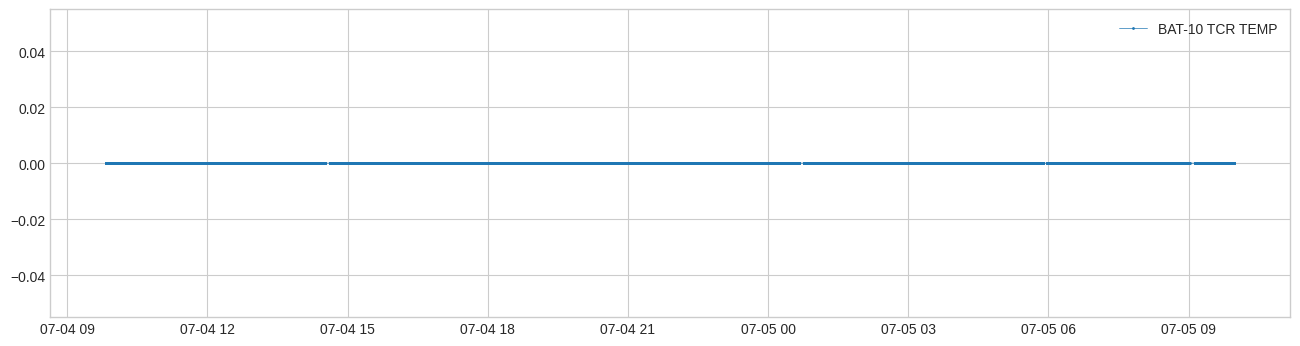

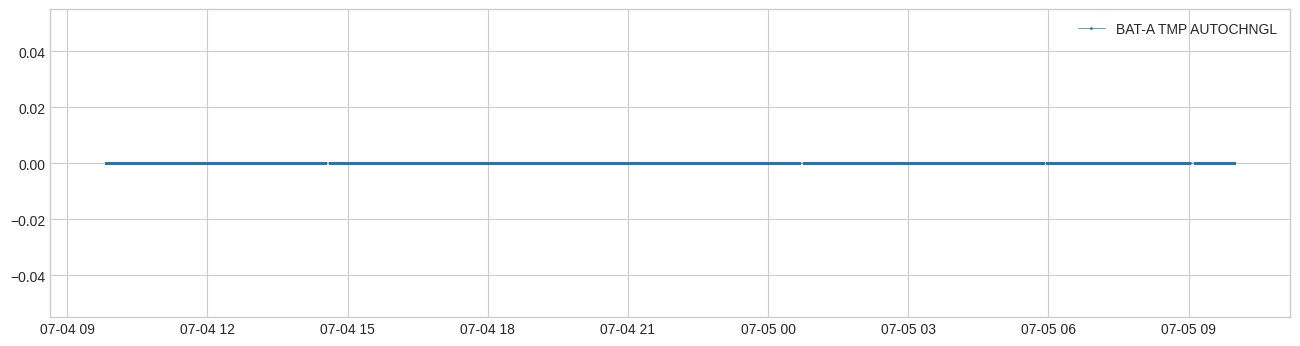

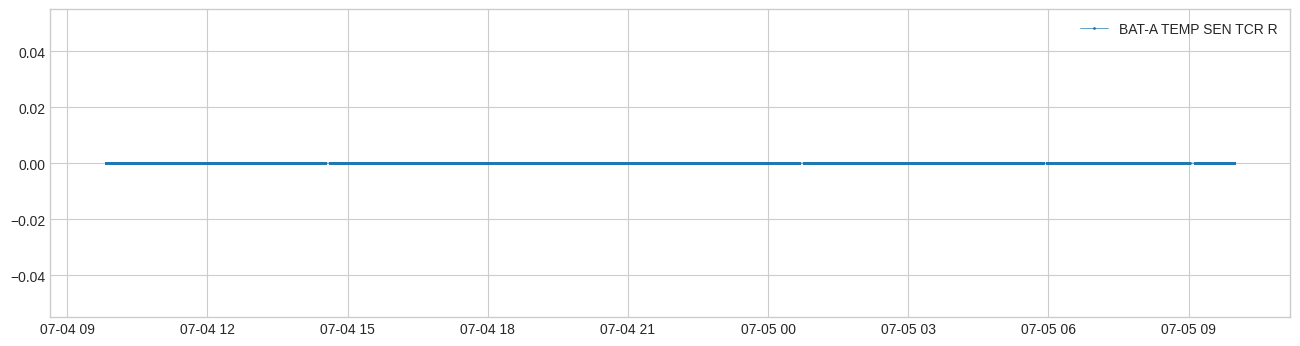

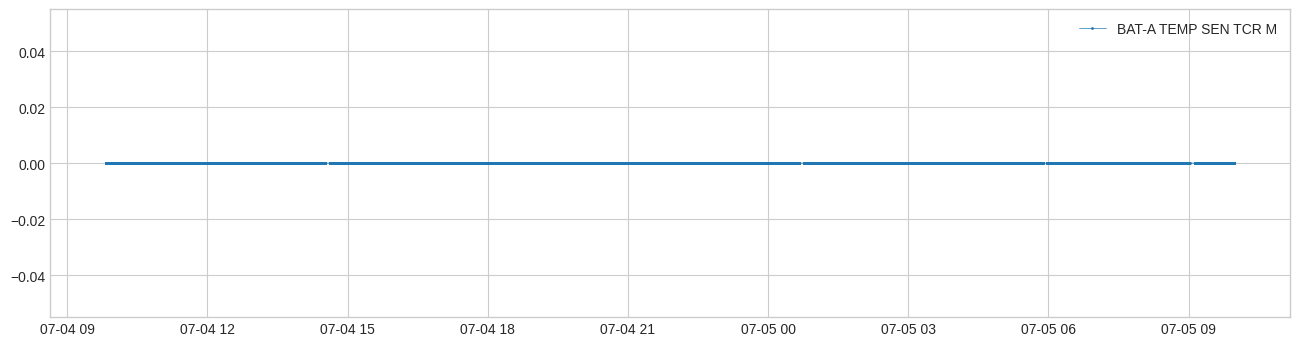

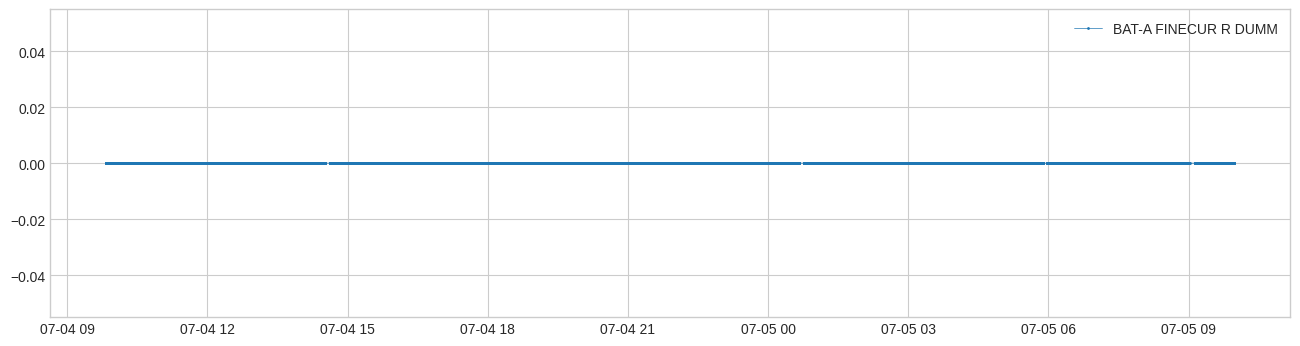

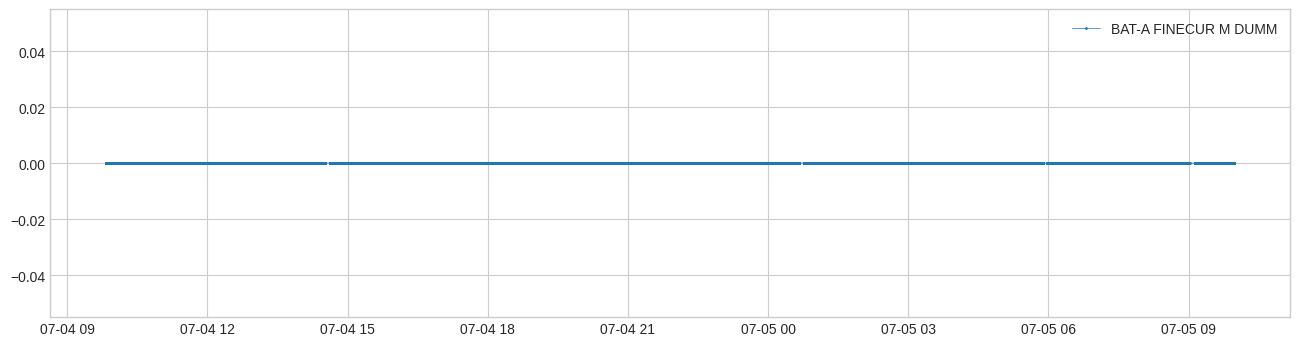

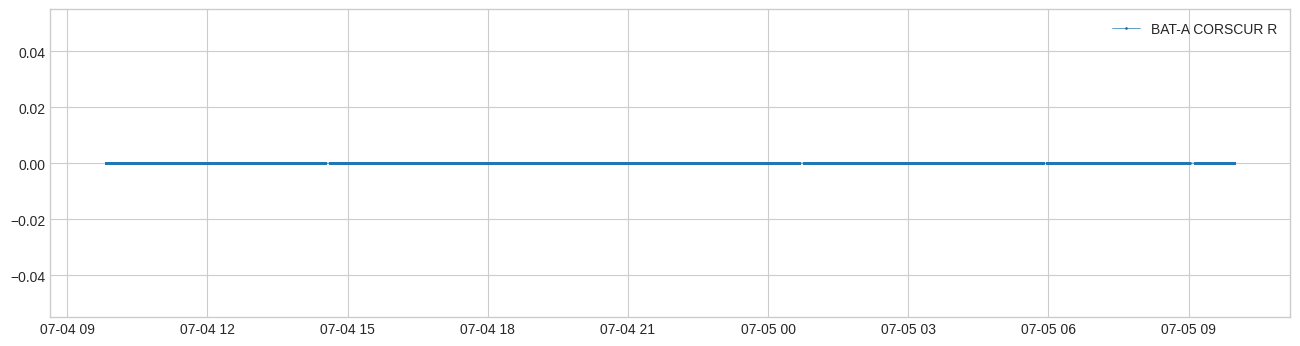

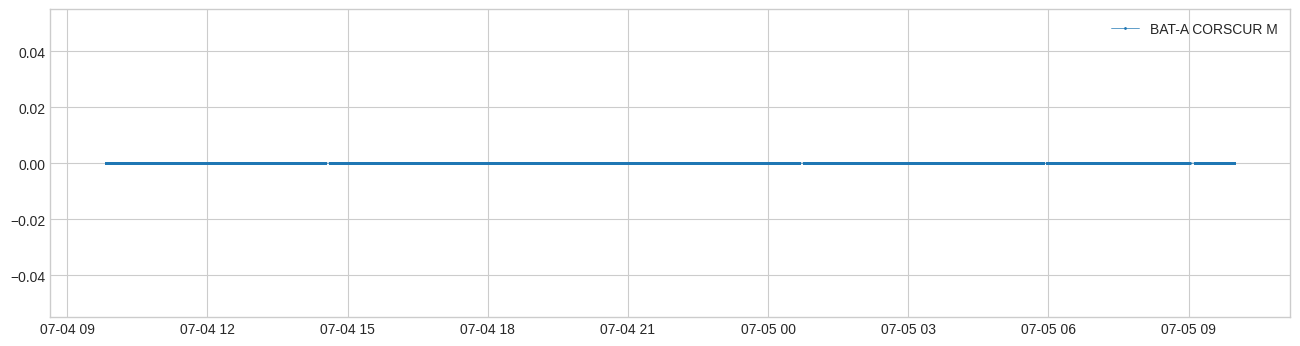

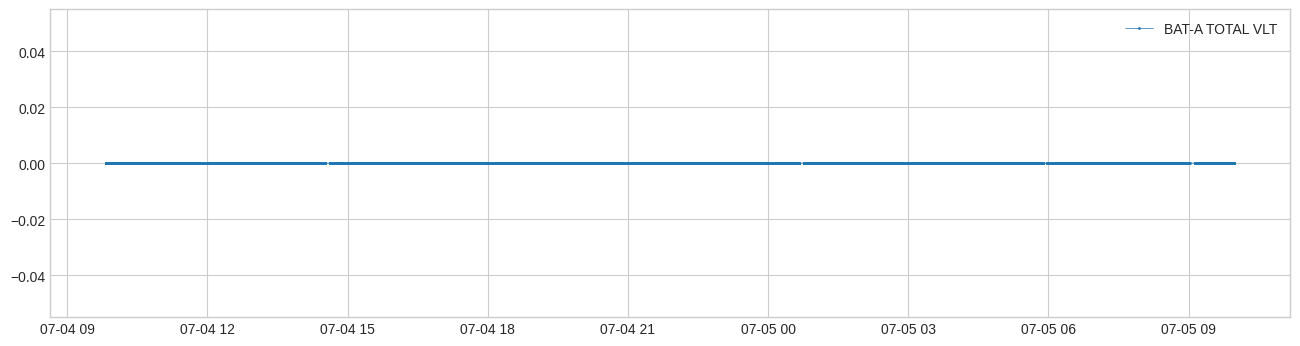

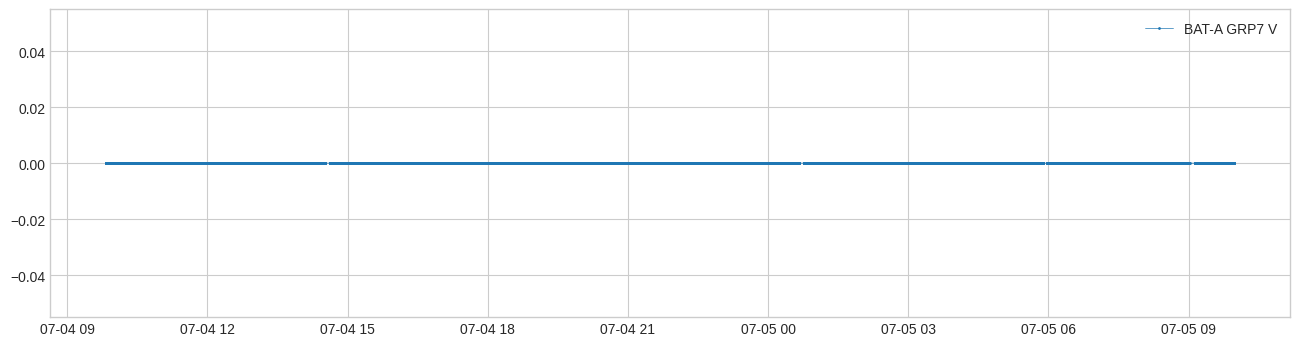

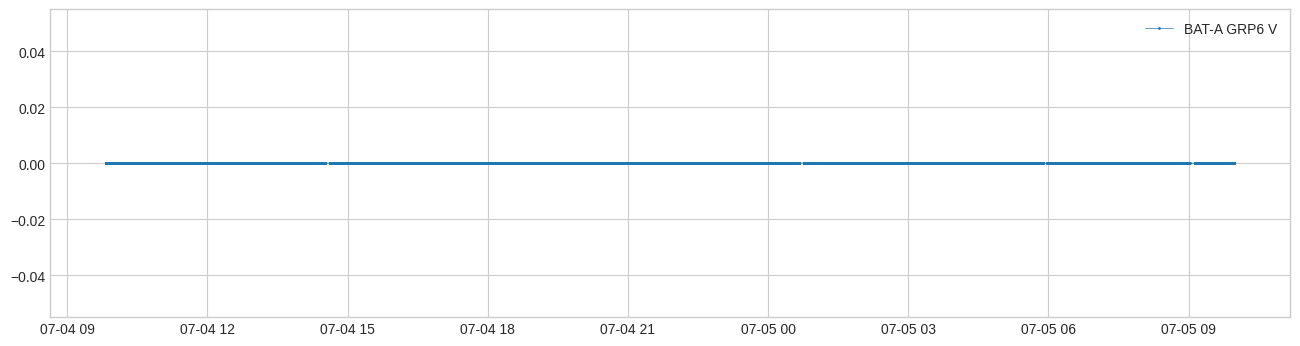

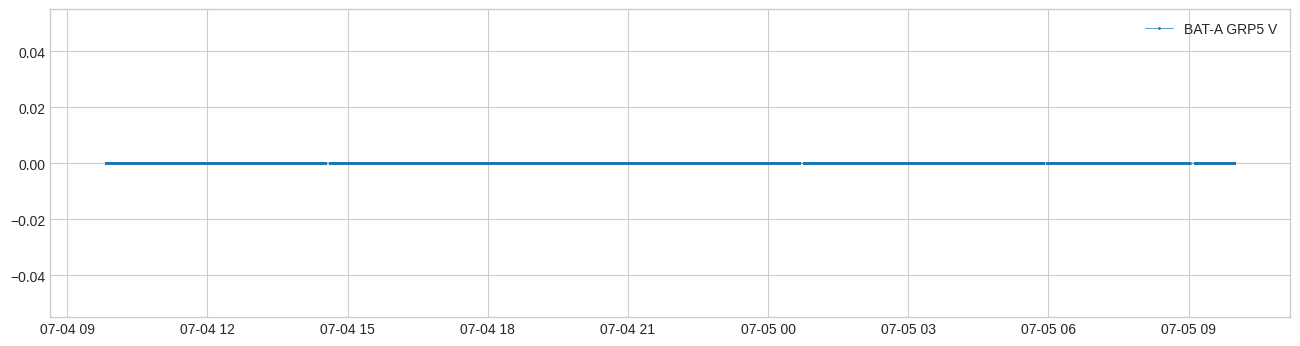

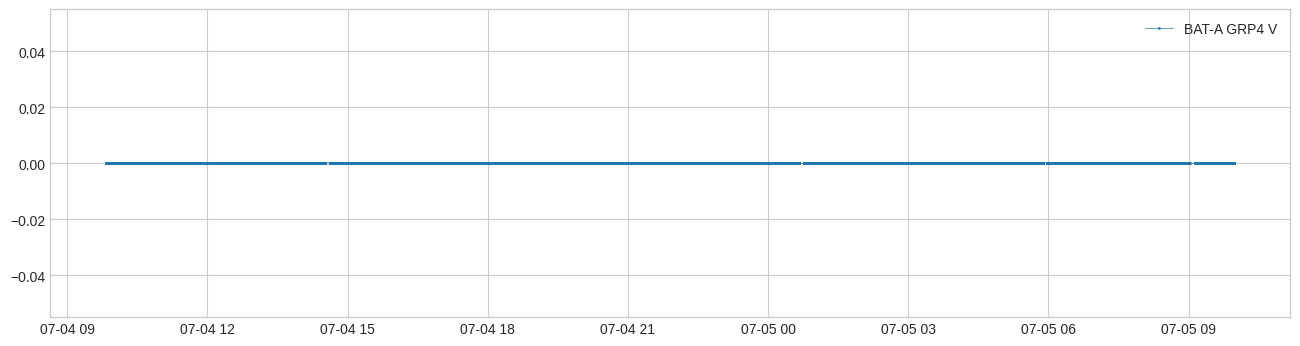

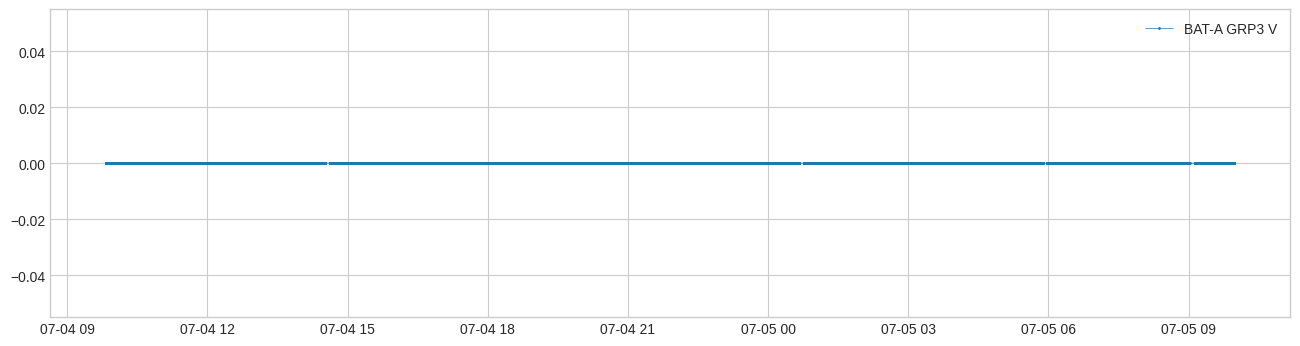

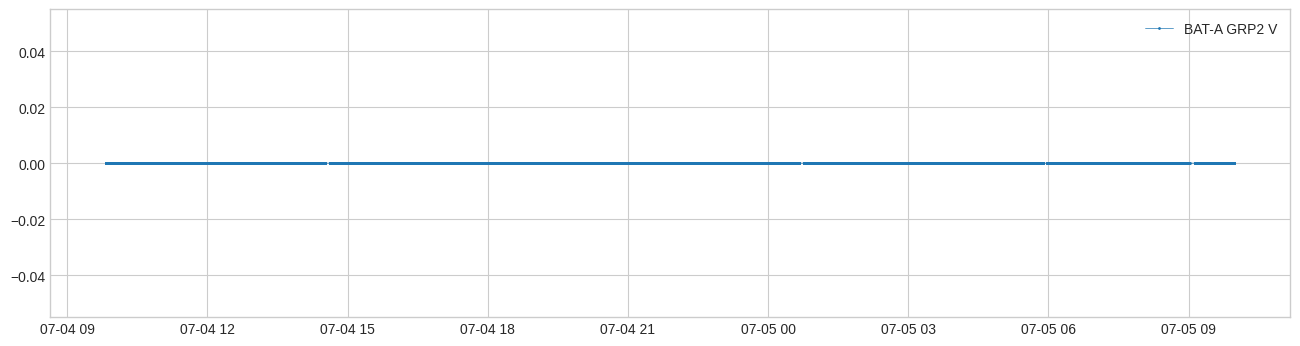

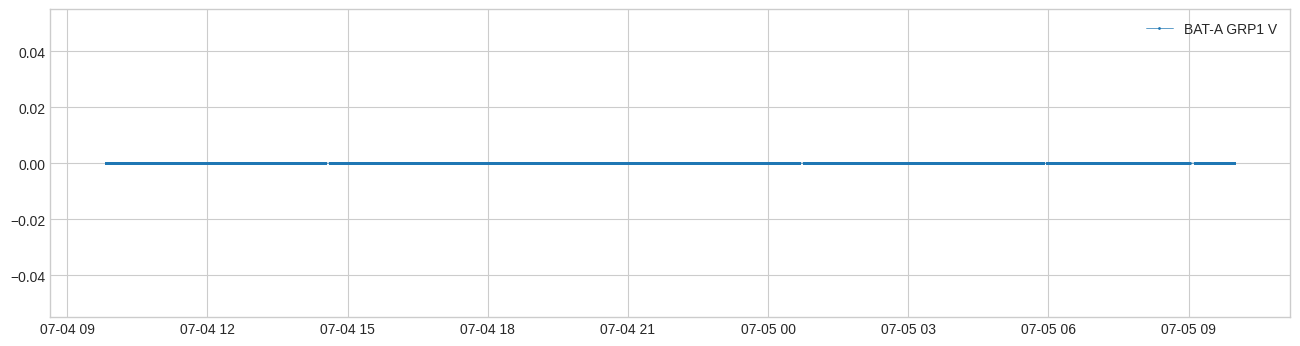

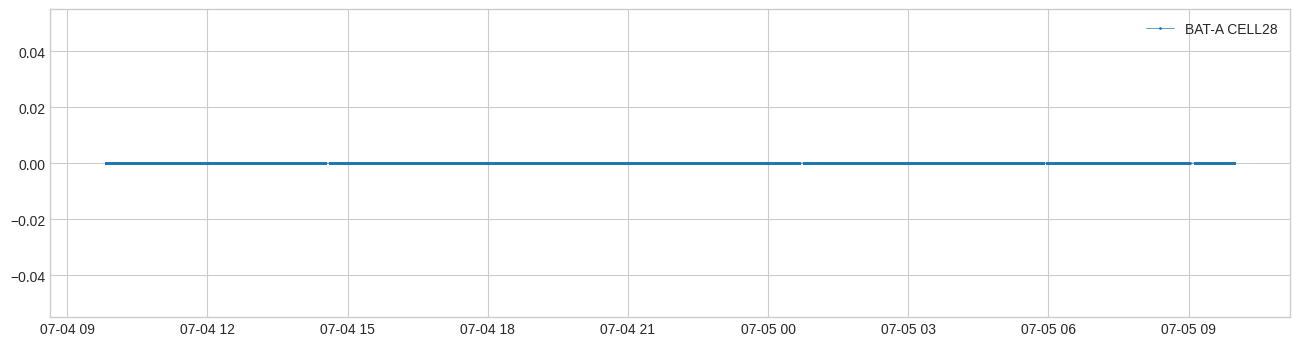

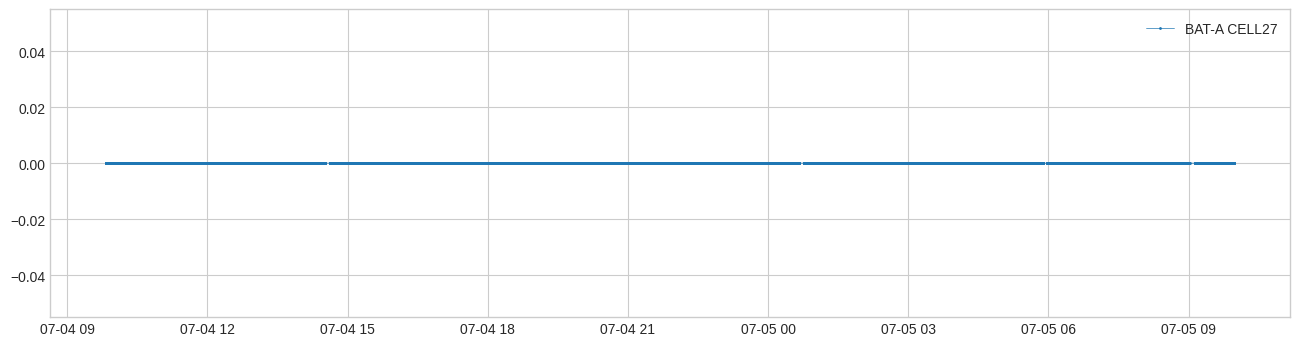

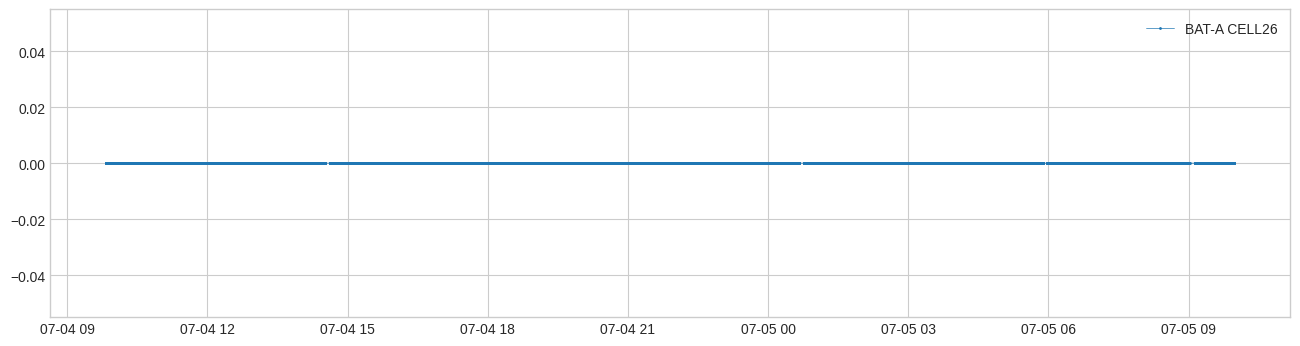

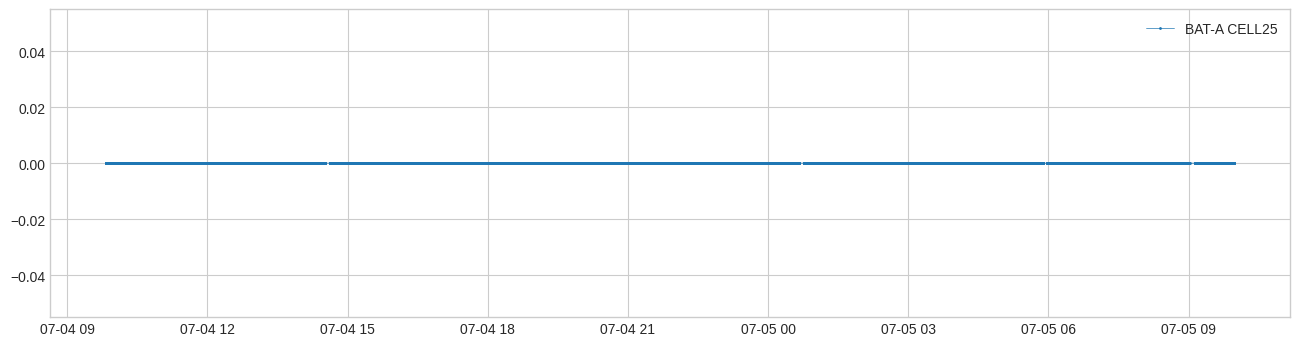

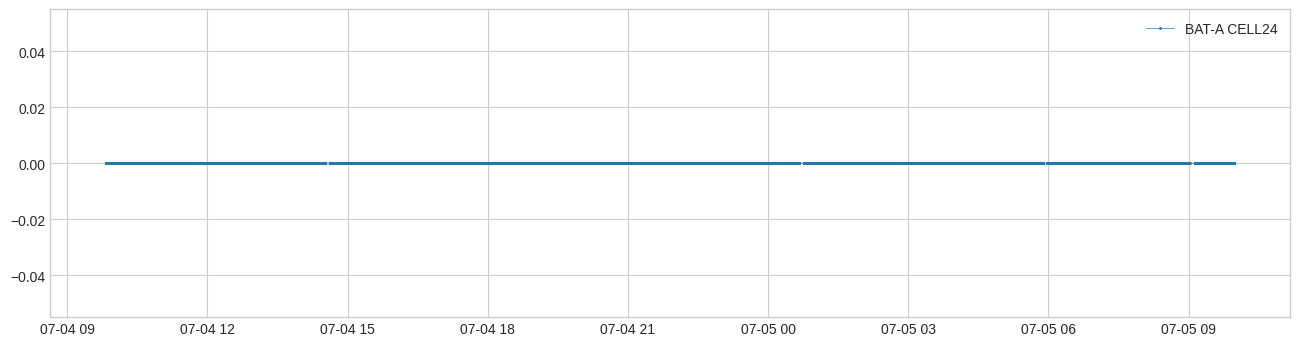

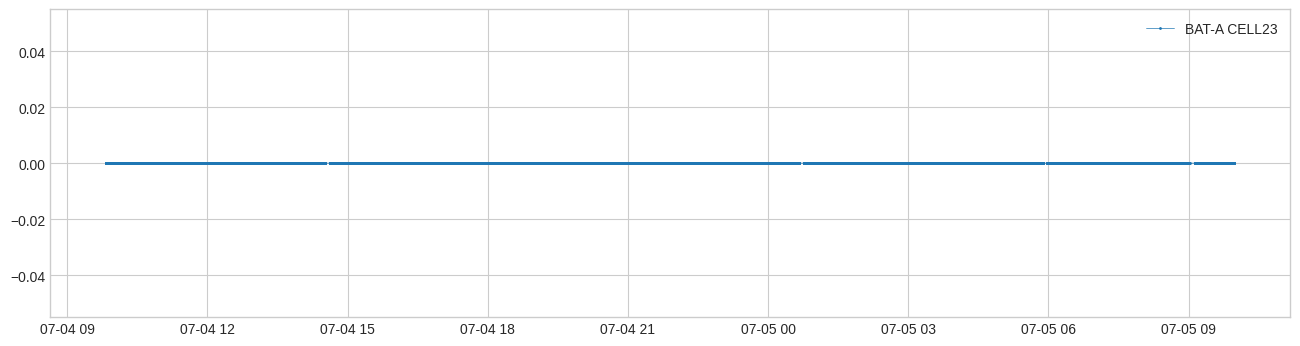

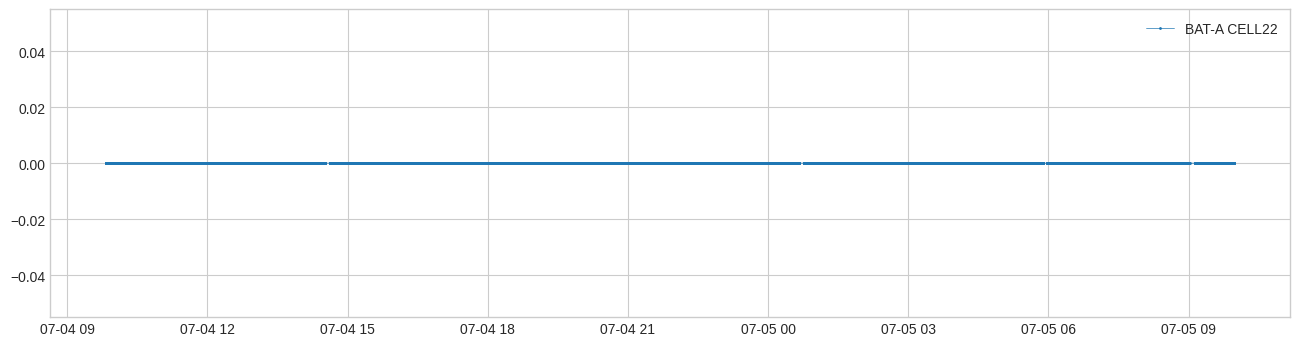

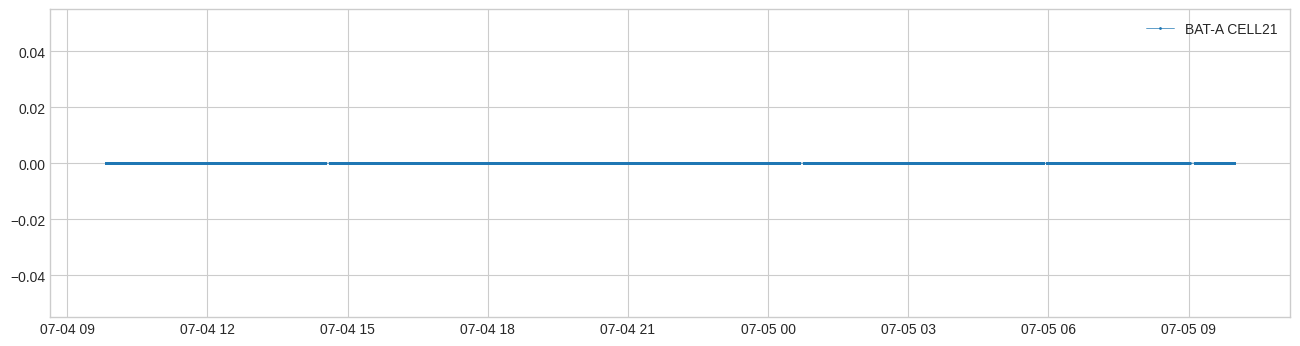

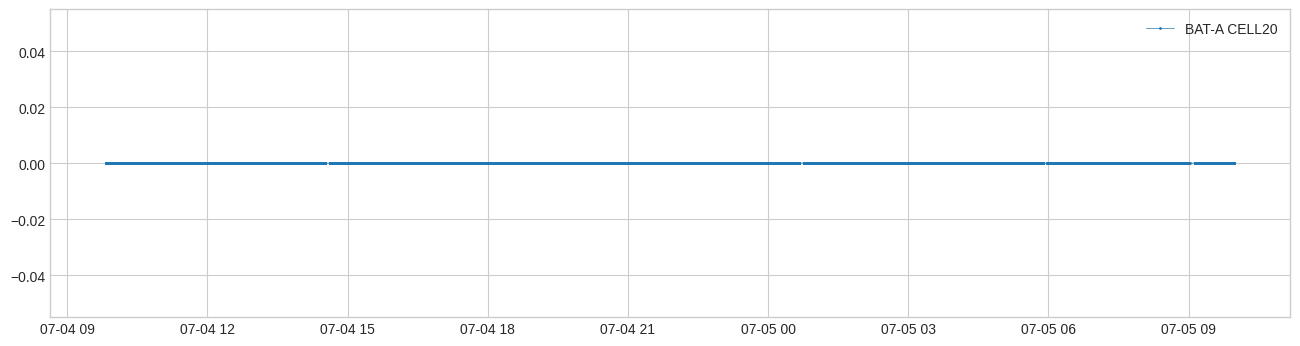

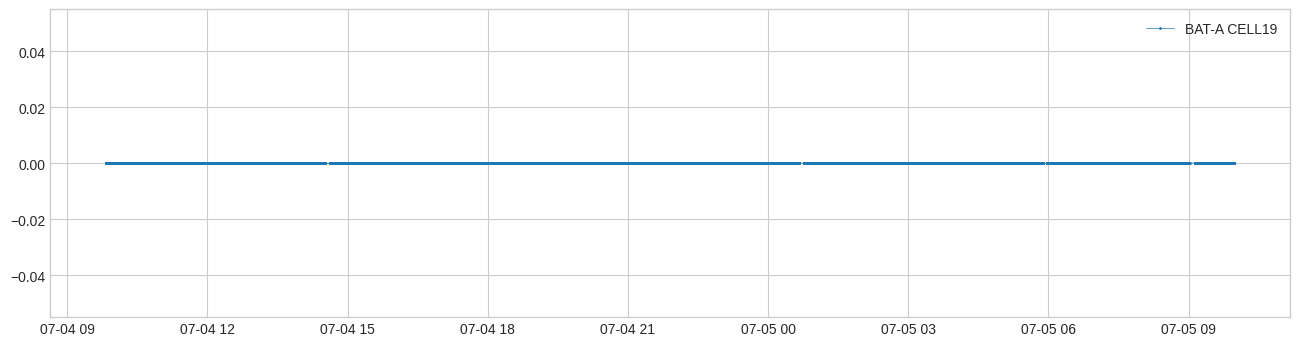

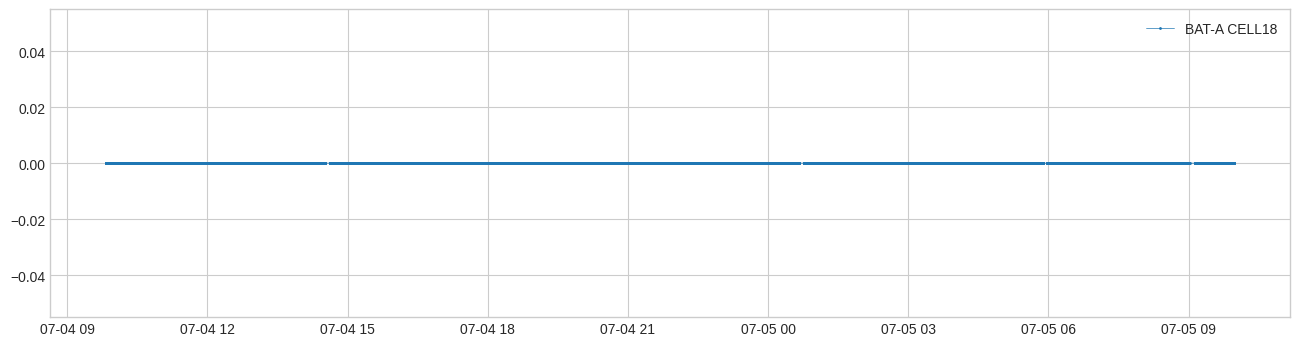

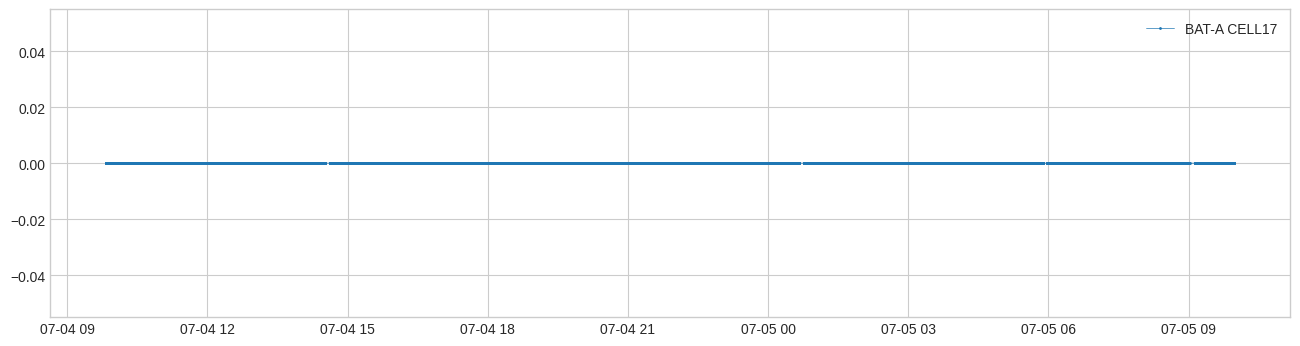

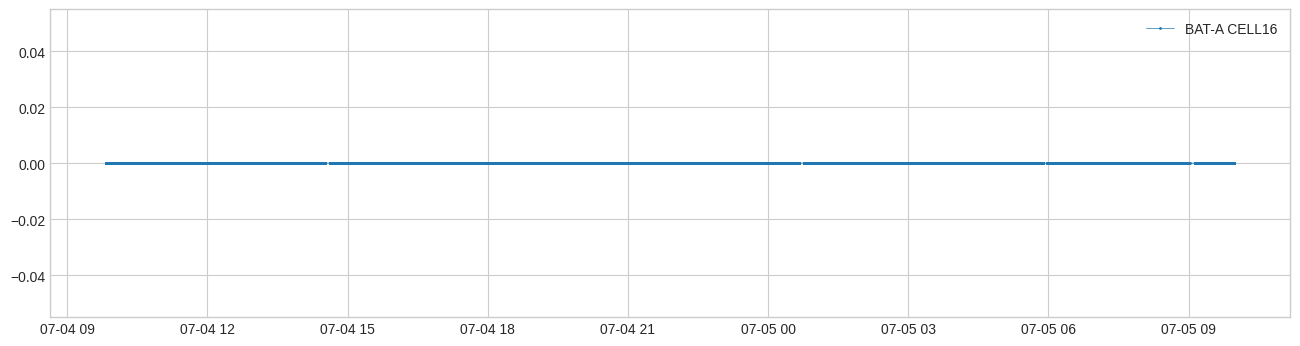

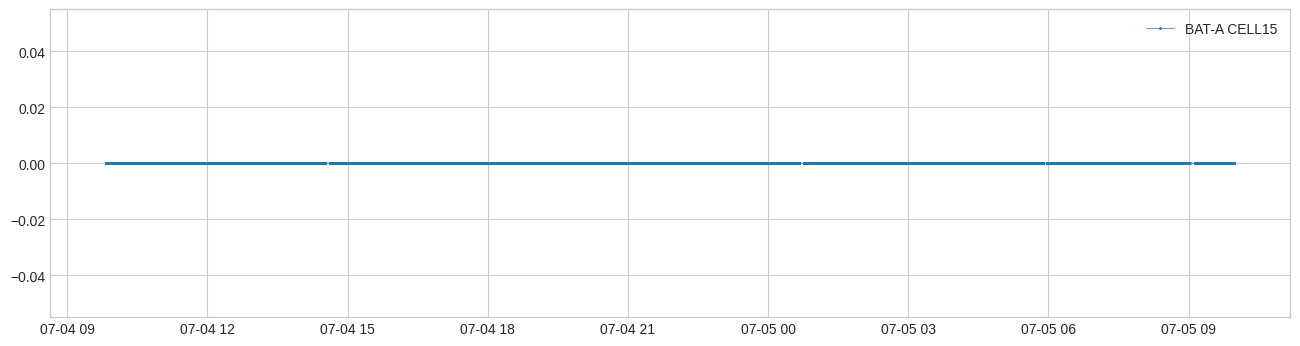

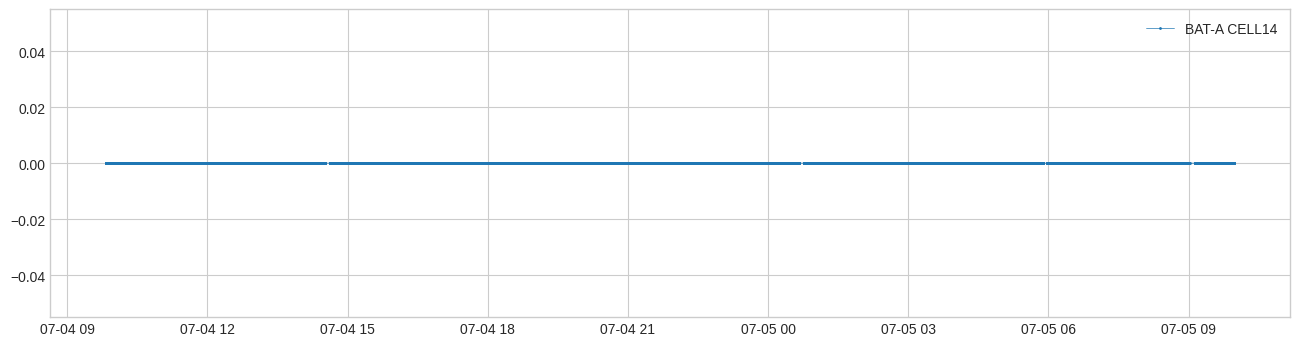

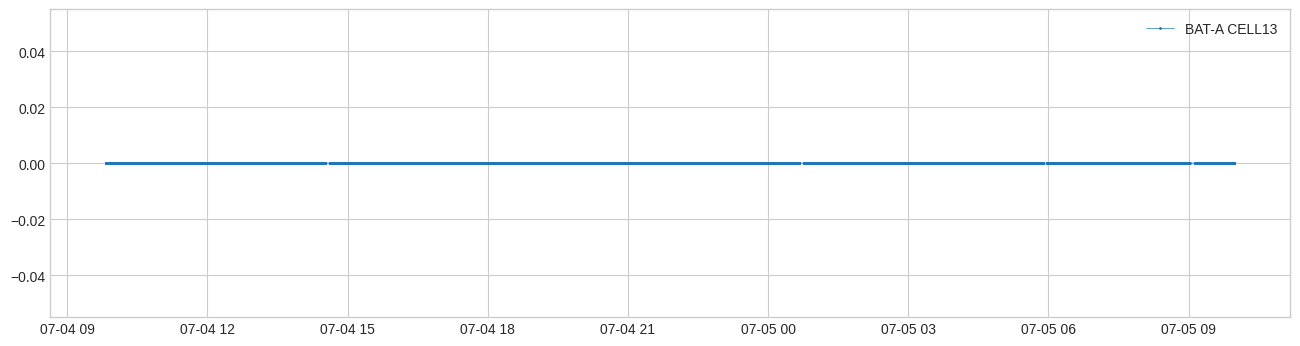

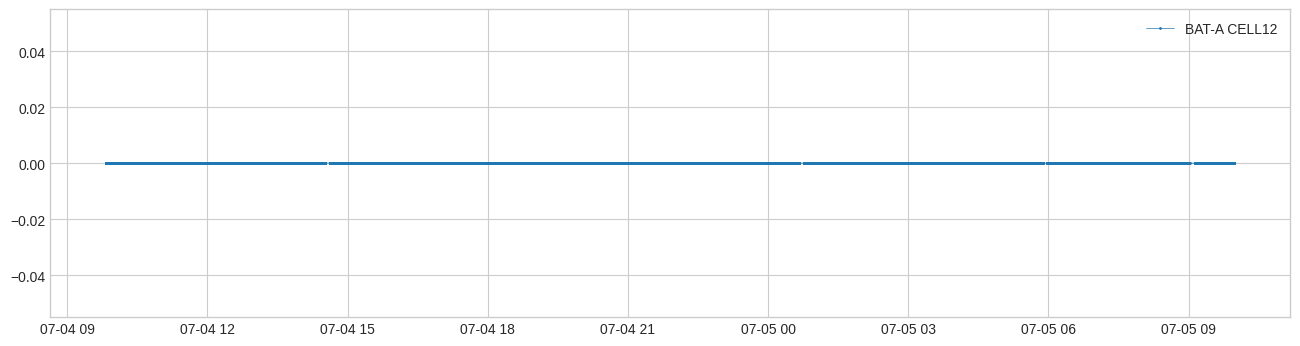

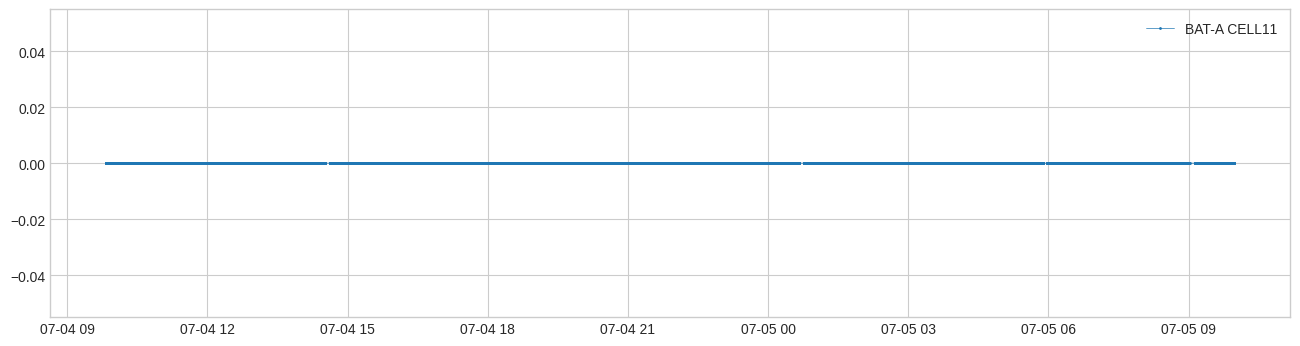

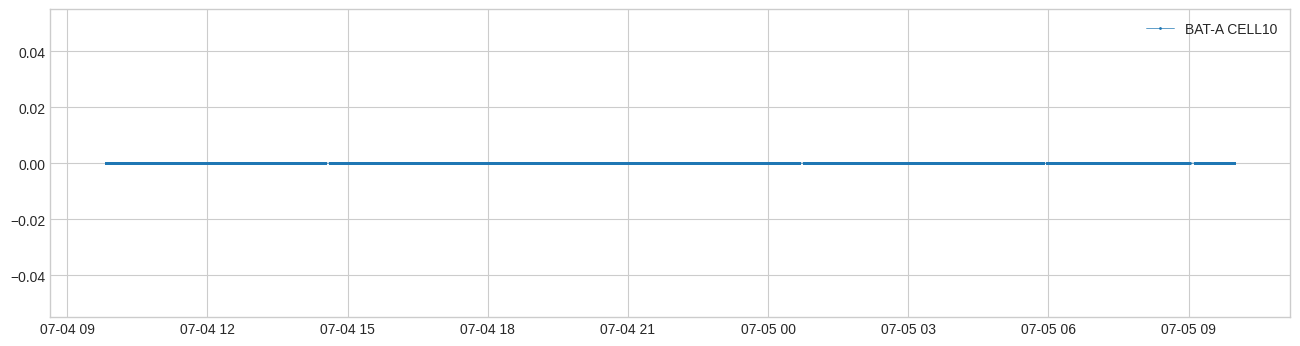

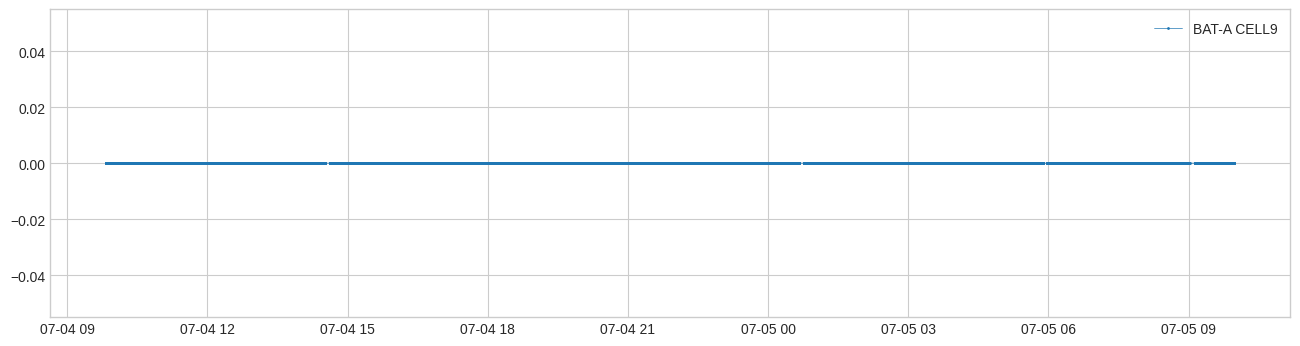

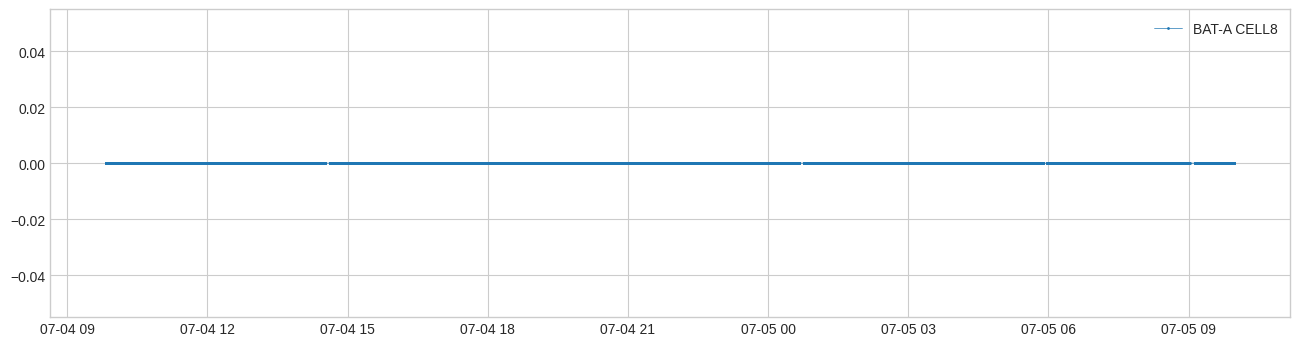

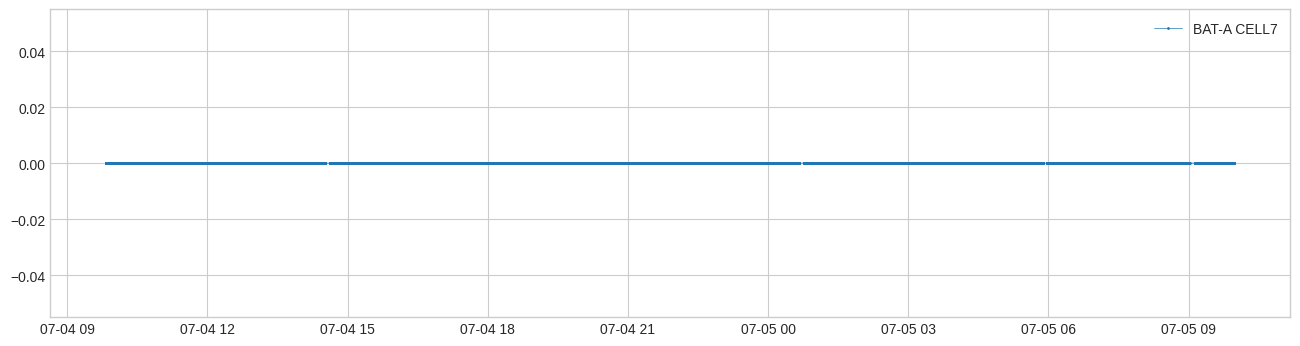

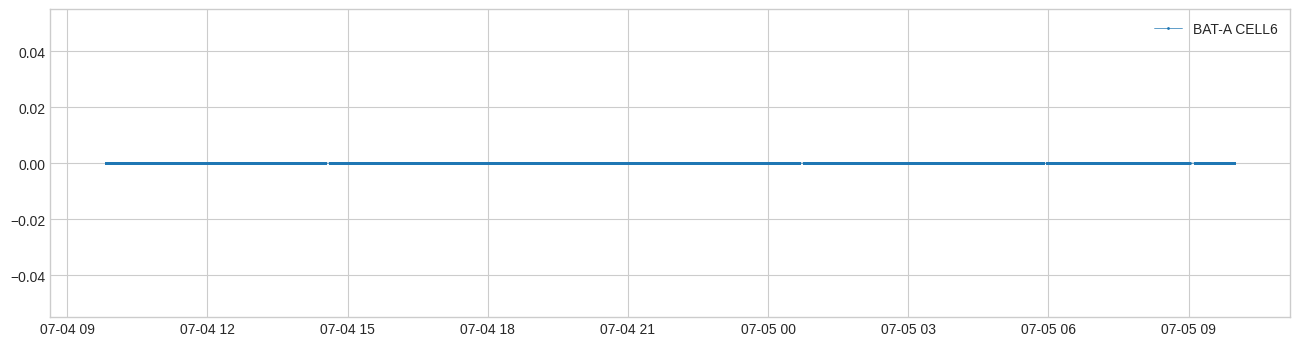

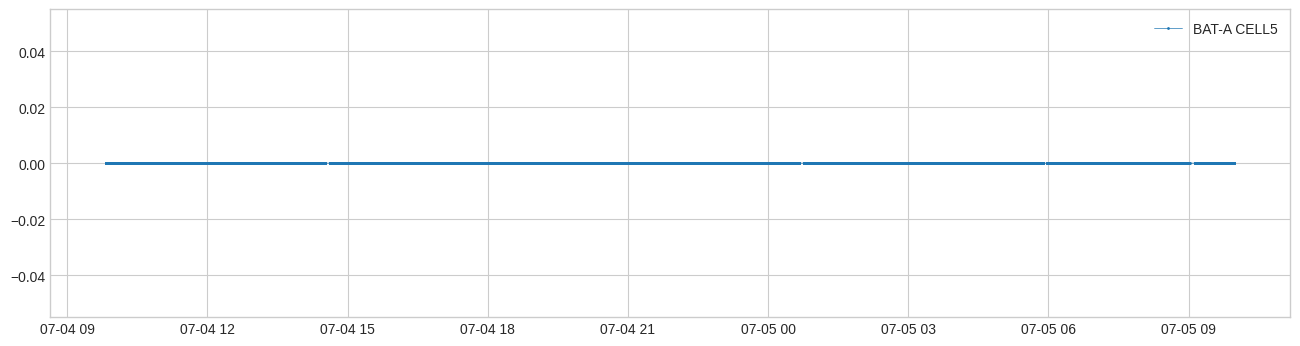

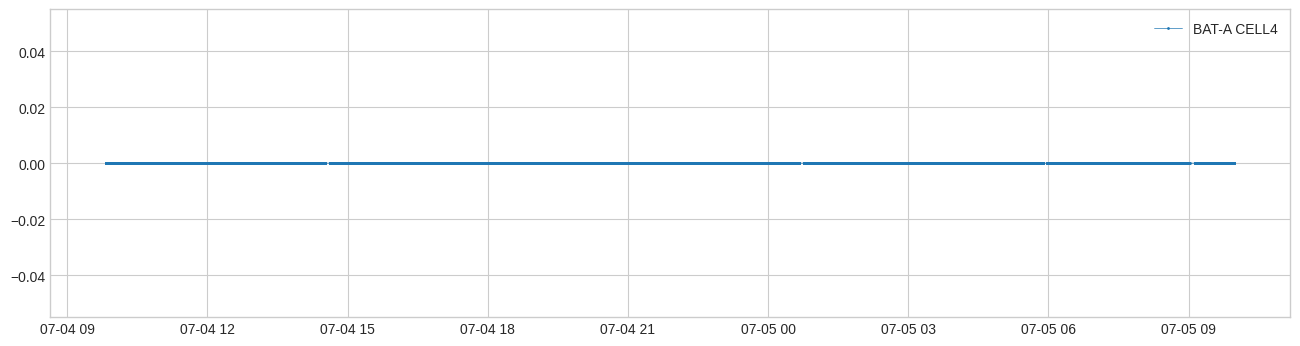

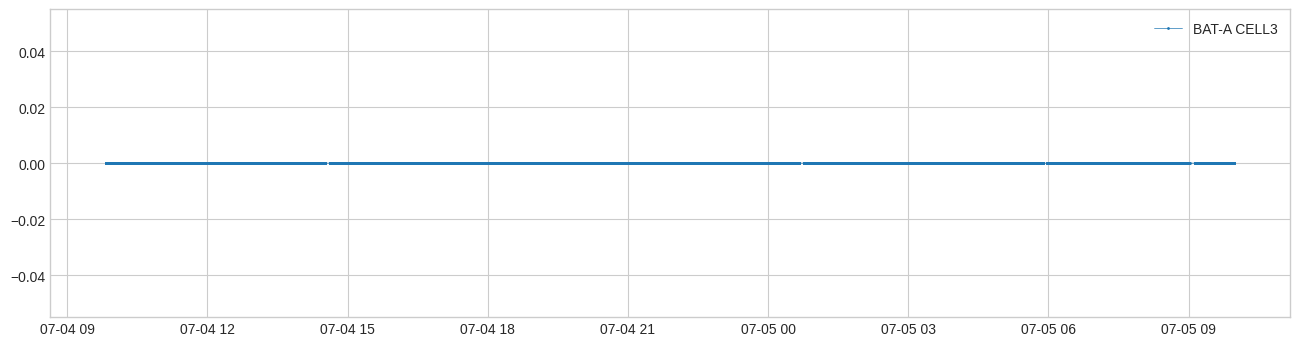

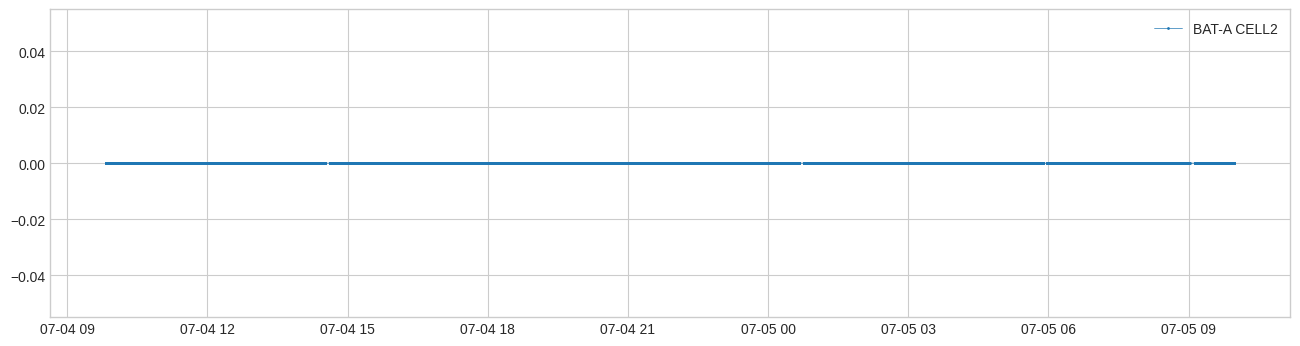

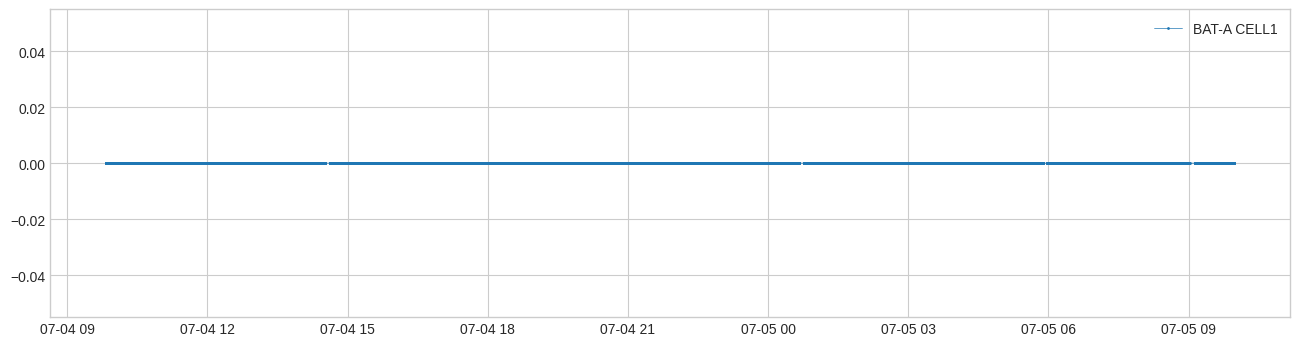

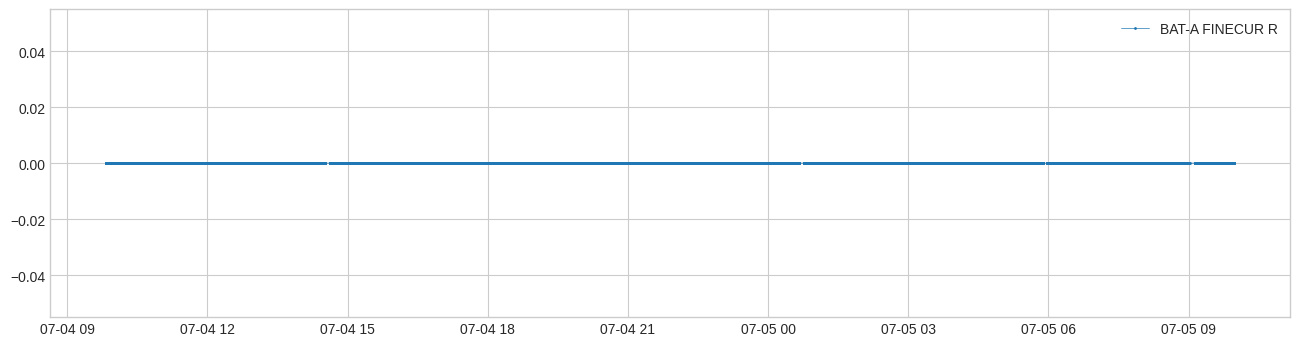

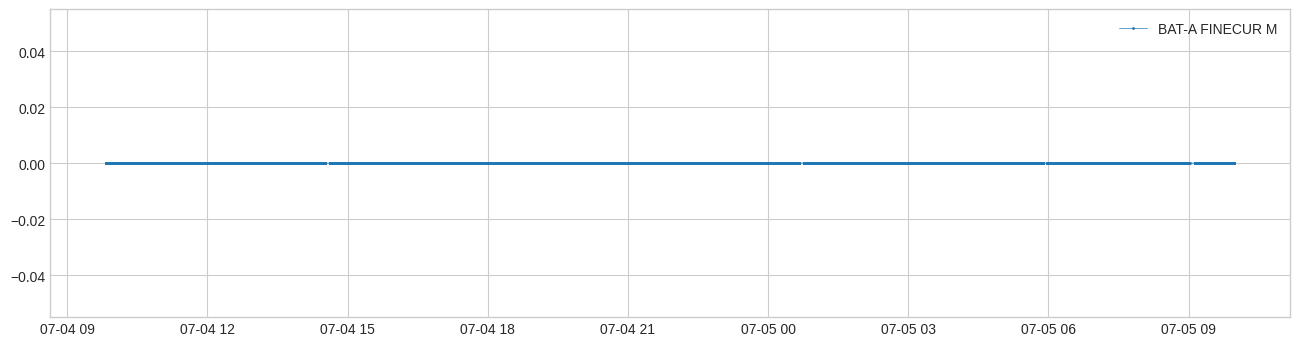

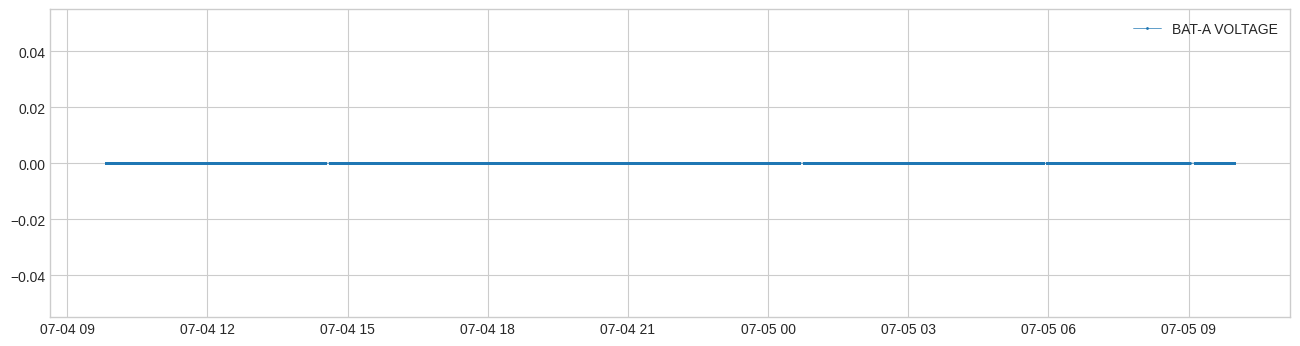

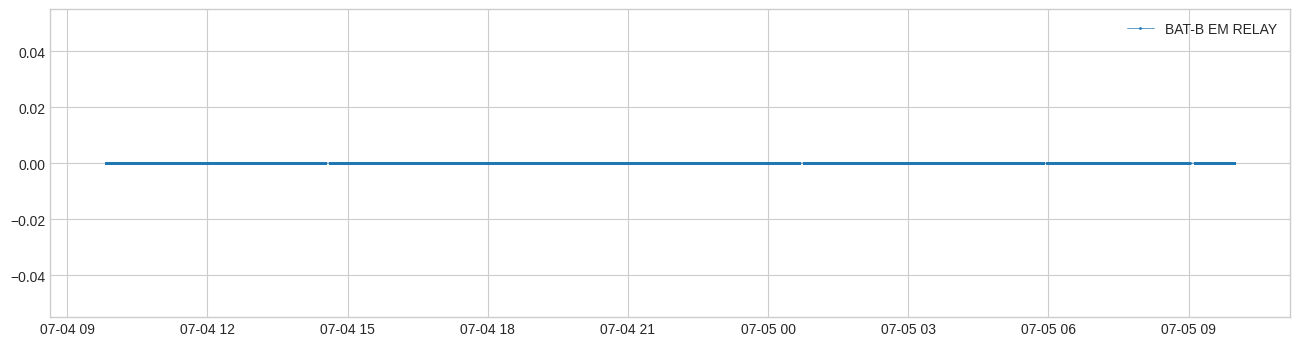

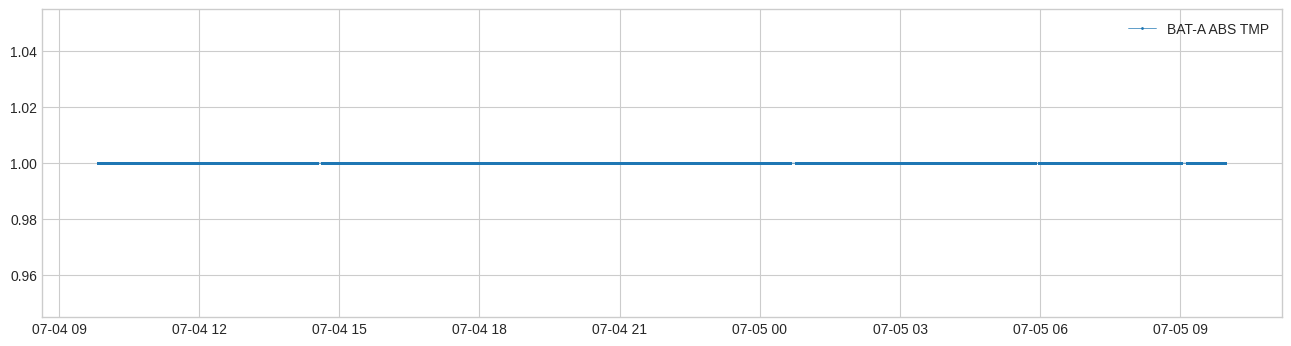

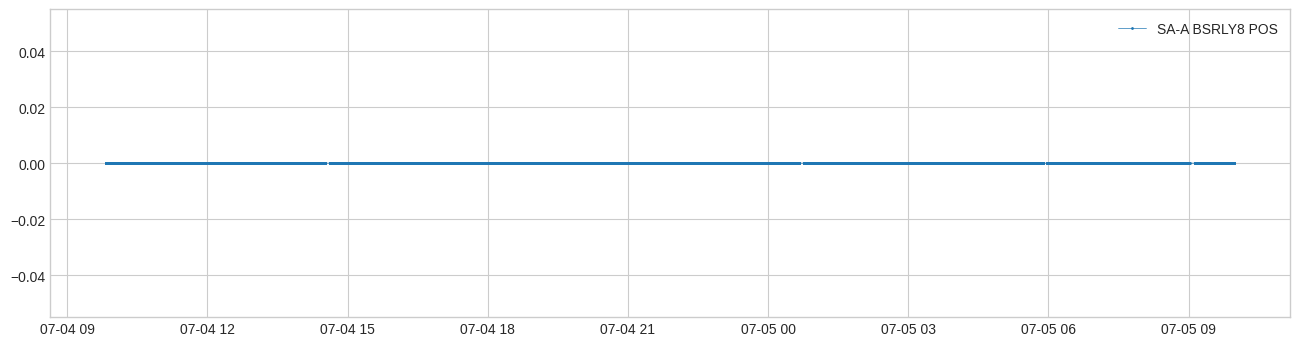

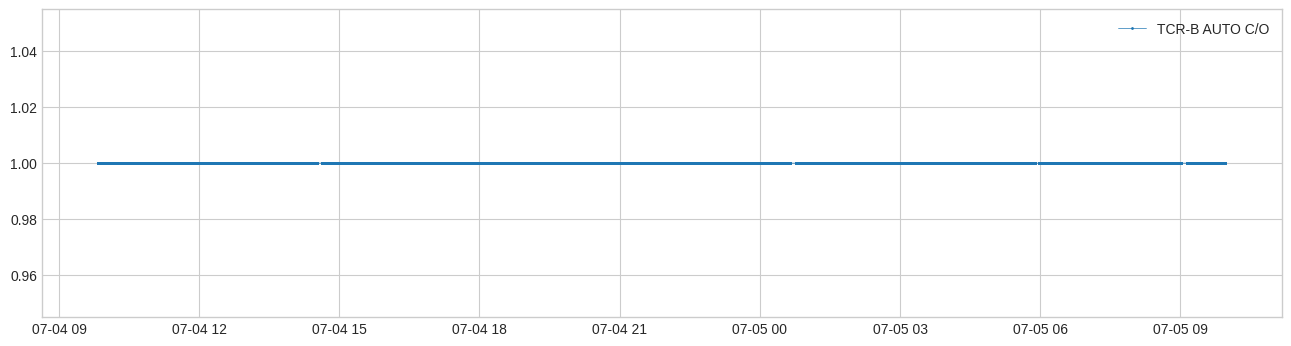

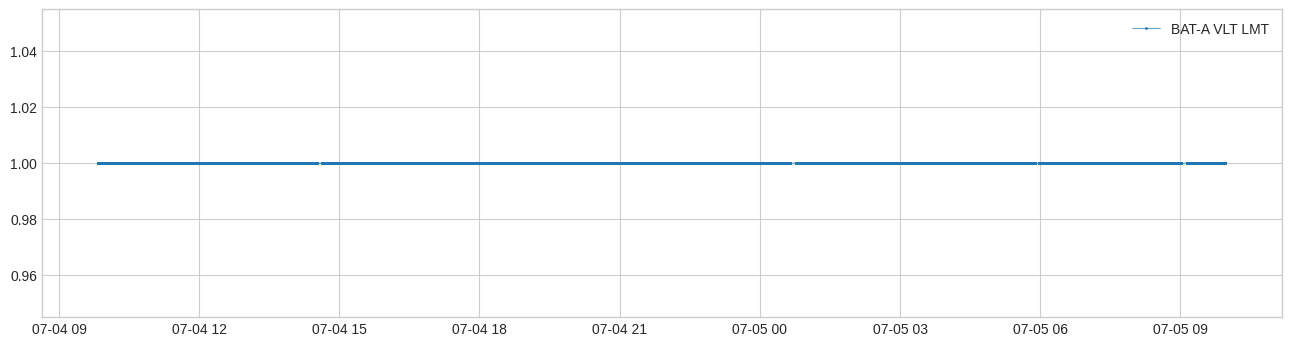

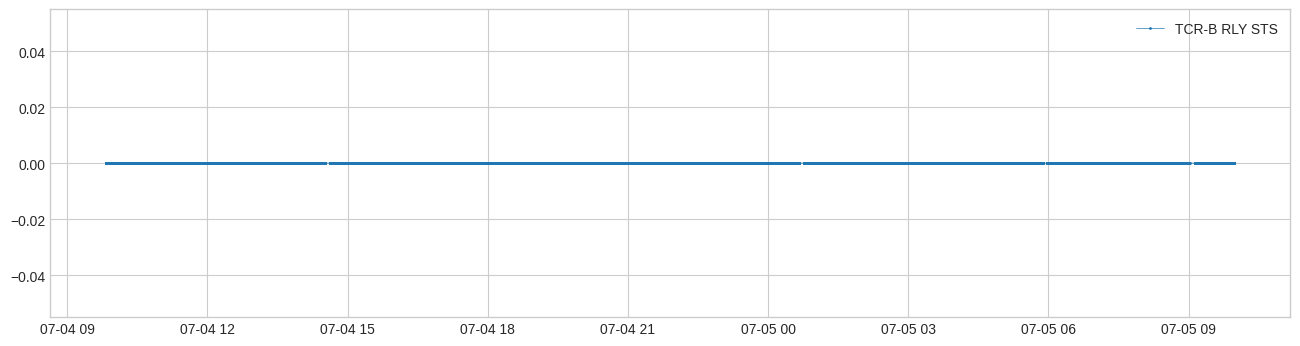

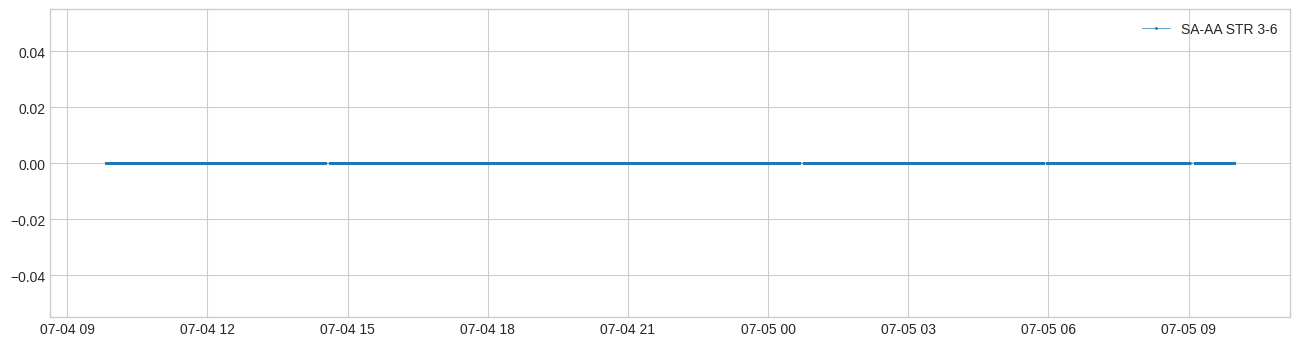

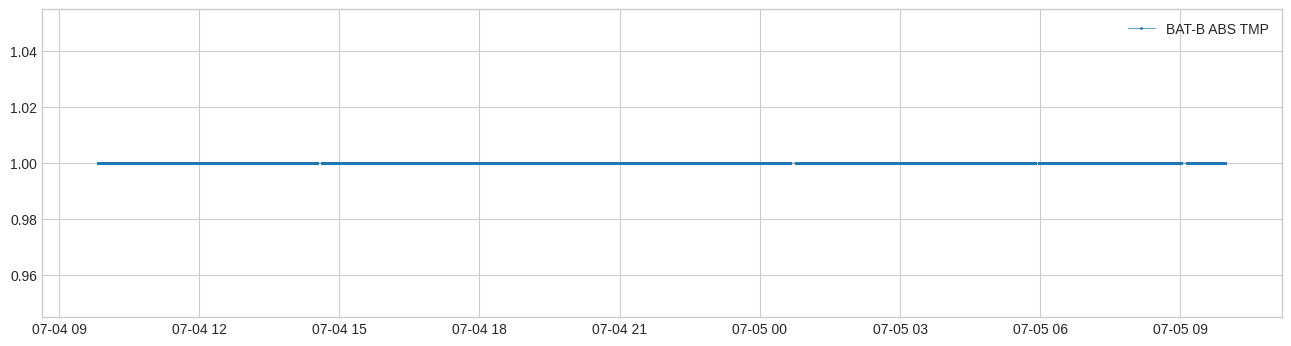

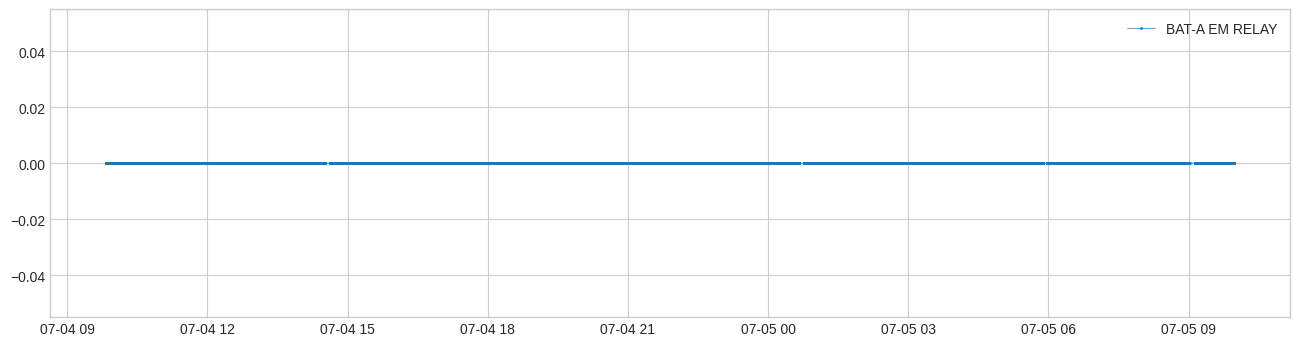

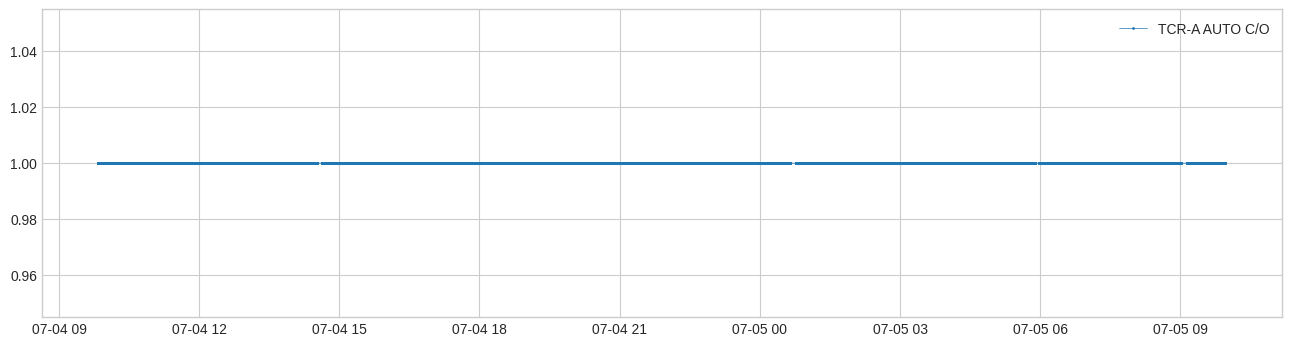

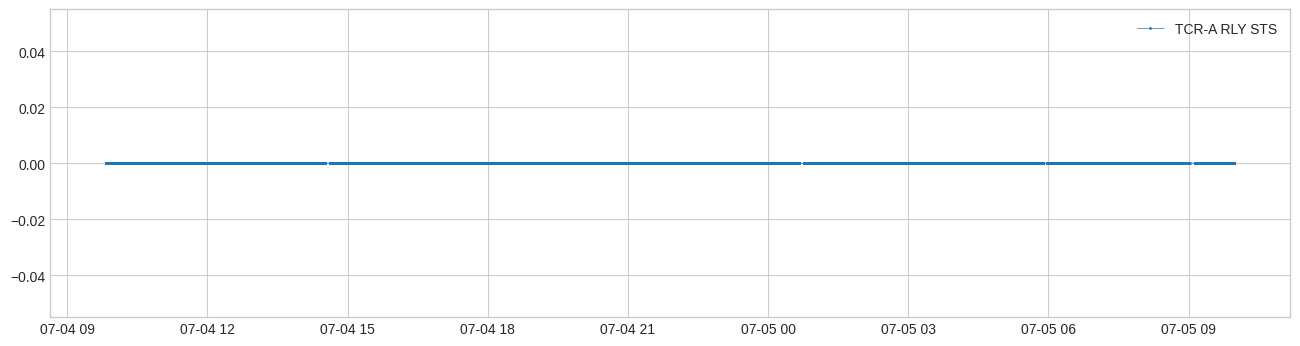

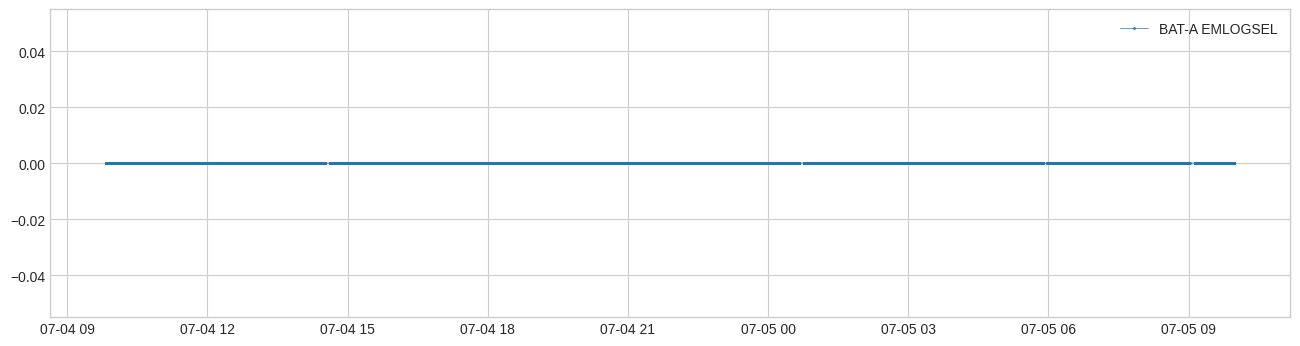

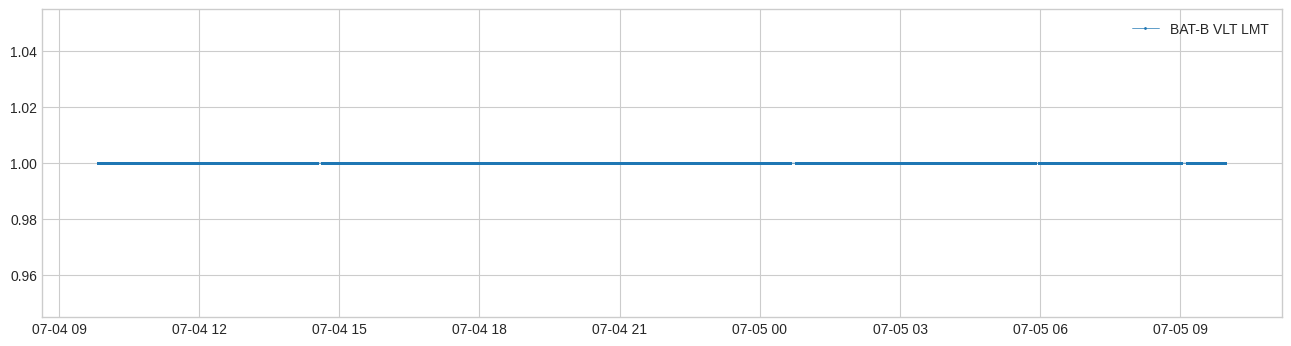

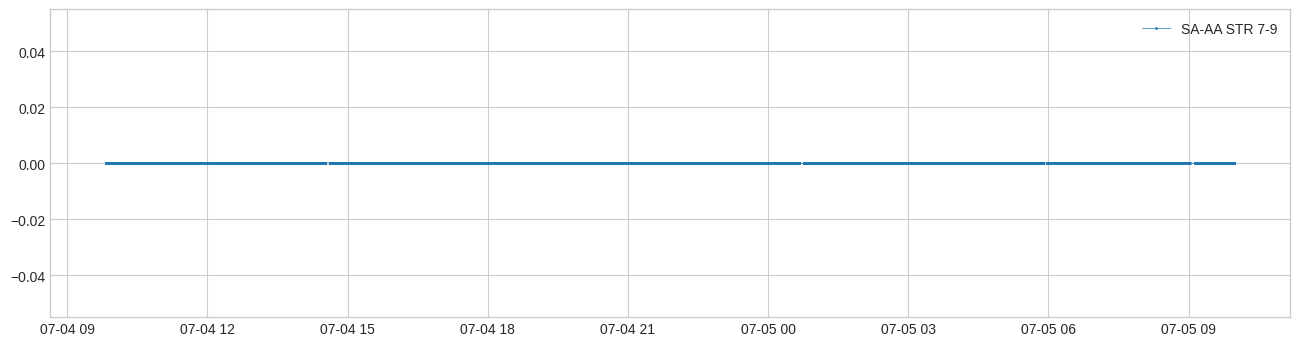

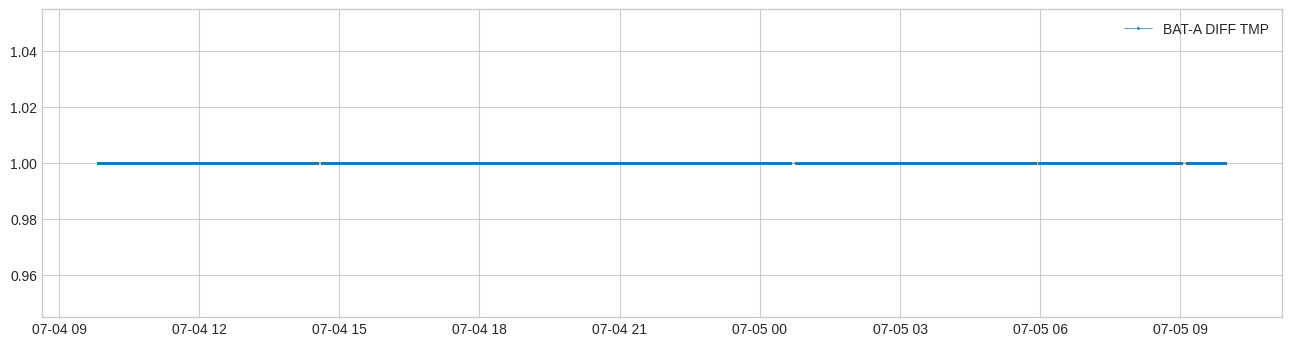

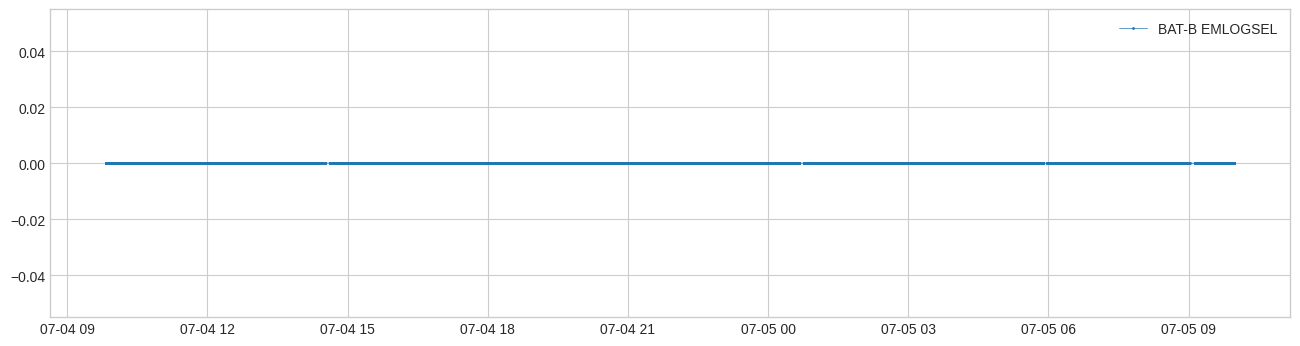

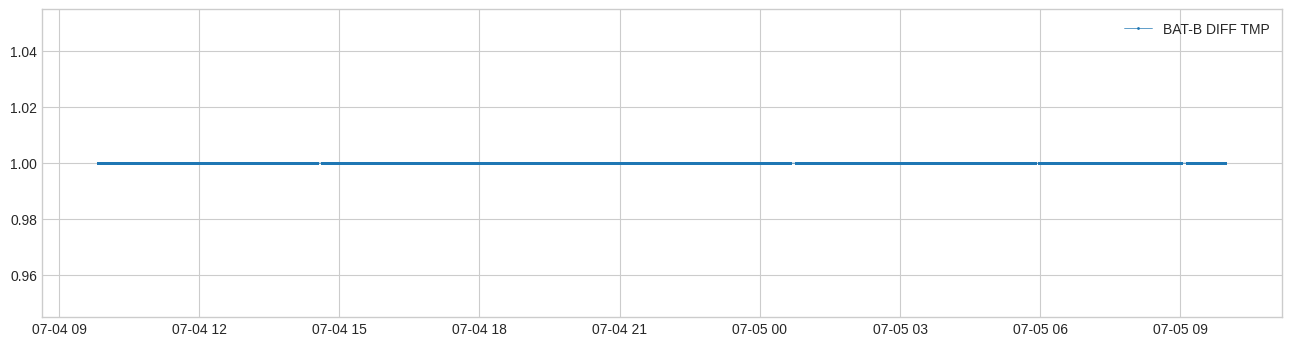

In [22]:
from adtk.visualization import plot
for column in df.columns:
    plot(df[column])